In [2]:
from mouseBehavior import mouseBehaviorData as mbd
import numpy as np
import os, glob
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels

In [3]:
dataframe_dir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\ophys_pipeline\dataframes"
dataframe_files = [f for f in os.listdir(dataframe_dir) if 'behaviorHistory.pkl' in f]

In [4]:
dflist = [pd.read_pickle(os.path.join(dataframe_dir, dpath)) for dpath in dataframe_files]
mouseIDs = [int(dpath[:6]) for dpath in dataframe_files]

In [4]:
len(dflist)

67

In [3]:
# dflist = []
# mouseIDs = []
# for dfpath in dataframe_files:
#     print(dfpath)
#     df = pd.read_pickle(os.path.join(dataframe_dir, dfpath))
#     mouseID = int(dfpath[:6])
#     dflist.append(df)
#     mouseIDs.append(mouseID)
    

431018_dataframe_behaviorHistory.pkl
431023_dataframe_behaviorHistory.pkl
431245_dataframe_behaviorHistory.pkl
431246_dataframe_behaviorHistory.pkl
431249_dataframe_behaviorHistory.pkl
431252_dataframe_behaviorHistory.pkl
432375_dataframe_behaviorHistory.pkl
433245_dataframe_behaviorHistory.pkl
433248_dataframe_behaviorHistory.pkl
435838_dataframe_behaviorHistory.pkl
436662_dataframe_behaviorHistory.pkl
437204_dataframe_behaviorHistory.pkl
440298_dataframe_behaviorHistory.pkl
442709_dataframe_behaviorHistory.pkl
445002_dataframe_behaviorHistory.pkl
445270_dataframe_behaviorHistory.pkl
445271_dataframe_behaviorHistory.pkl
447663_dataframe_behaviorHistory.pkl
448897_dataframe_behaviorHistory.pkl
448900_dataframe_behaviorHistory.pkl
449441_dataframe_behaviorHistory.pkl
450471_dataframe_behaviorHistory.pkl
450705_dataframe_behaviorHistory.pkl
450710_dataframe_behaviorHistory.pkl
451787_dataframe_behaviorHistory.pkl
451790_dataframe_behaviorHistory.pkl
453909_dataframe_behaviorHistory.pkl
4

In [5]:
popdf = pd.concat(dflist, keys=mouseIDs)

In [6]:
popdf['WE_ml'].replace(r'', np.nan, inplace=True)
popdf['WS_ml'].replace(r'', np.nan, inplace=True)
popdf['Wt_g'].replace(r'', np.nan, inplace=True)

In [7]:
popdf['WE_ml'] = popdf['WE_ml'].astype('float')
popdf['WS_ml'] = popdf['WS_ml'].astype('float')
popdf['Wt_g'] = popdf['Wt_g'].astype('float')

In [8]:
popdf.groupby(['stage']).mean()['earned_rewards']

stage
OPHYS_0_images_A_habituation              97.198718
OPHYS_0_images_B_habituation              90.927273
OPHYS_0_images_E_habituation              35.400000
OPHYS_0_images_G_habituation             121.500000
OPHYS_1_images_A                          85.626087
OPHYS_1_images_B                          63.176471
OPHYS_1_images_E                          61.000000
OPHYS_1_images_G                         110.888889
OPHYS_2_images_A_passive                   2.388889
OPHYS_2_images_B_passive                   0.000000
OPHYS_2_images_G_passive                  18.000000
OPHYS_3_images_A                          78.484375
OPHYS_3_images_B                          57.976744
OPHYS_3_images_E                          57.750000
OPHYS_3_images_G                          91.333333
OPHYS_4_images_A                          67.850000
OPHYS_4_images_B                          75.954545
OPHYS_4_images_H                         125.428571
OPHYS_5_images_A_passive                   0.000000
OPHYS_

In [53]:
bdays = popdf['stage']=="TRAINING_5_images_B_handoff_ready"
adays = popdf['stage']=="TRAINING_5_images_A_handoff_ready"
gdays = popdf['stage']=="TRAINING_5_images_G_handoff_ready"

In [57]:
popdf[['earned_rewards', 'rig', 'session_datetime_local', 'stage']].loc[bdays]

earned_rewards rig            session_datetime_local  \
460746 12             138  F4  2019-06-26 13:14:15.216000-07:00   
       13             147  F4  2019-06-25 13:16:27.702000-07:00   
       14             129  F4  2019-06-24 13:04:01.651000-07:00   
       15             162  F4  2019-06-21 13:01:36.306000-07:00   
       16             154  F4  2019-06-20 13:09:29.243000-07:00   
       17             151  F4  2019-06-19 13:39:05.252000-07:00   
       18             157  F4  2019-06-18 13:11:46.937000-07:00   
       19             145  F4  2019-06-17 13:31:42.867000-07:00   
461946 12             151  F1  2019-06-26 13:11:35.695000-07:00   
       13             170  F1  2019-06-25 13:13:32.319000-07:00   
       14             171  F1  2019-06-24 13:01:14.180000-07:00   
462544 15             107  G2  2019-07-15 12:18:05.424000-07:00   
       16             124  G2  2019-07-12 13:33:13.551000-07:00   
       17             110  G2  2019-07-10 12:26:18.687000-07:00   
       18             128  G2  2019-07-09 13:00:15.354000-07:00   
462885 10             126  F1  2019-06-28 09:05:46.795000-07:00   
       11             129  B2  2019-06-27 12:22:59.784000-07:00   
       12             121  F1  2019-06-25 09:41:10.930000-07:00   
462887 10              99  F2  2019-07-11 15:15:09.239000-07:00   
       11             137  F2  2019-07-10 15:01:20.862000-07:00   
       12             119  F2  2019-07-09 14:39:21.153000-07:00   
       13             100  F2  2019-07-08 14:55:16.631000-07:00   
       14             117  F2  2019-07-03 14:41:16.698000-07:00   
       15             124  F2  2019-07-02 14:18:21.868000-07:00   
       16             126  F2  2019-07-01 14:29:26.661000-07:00   
464204 19              89  F2  2019-07-22 09:11:57.778000-07:00   
       20              55  F2  2019-07-19 08:44:19.276000-07:00   
       21              70  F2  2019-07-18 09:15:54.090000-07:00   
       22              93  F2  2019-07-17 10:16:03.086000-07:00   
464206 20             142  F1  2019-07-31 13:40:46.979000-07:00   
...                   ...  ..                               ...   
       26             114  F1  2019-07-23 13:17:44.138000-07:00   
       27             140  F1  2019-07-18 13:03:20.040000-07:00   
464207 14             104  G3  2019-08-01 08:28:10.499000-07:00   
       15             114  G3  2019-07-31 08:46:28.020000-07:00   
       16             114  G3  2019-07-30 09:09:15.156000-07:00   
       17              87  G3  2019-07-29 08:53:57.534000-07:00   
       18              82  G3  2019-07-26 09:10:21.493000-07:00   
       19              71  G5  2019-07-25 10:04:27.603000-07:00   
       20              90  G5  2019-07-24 09:25:14.545000-07:00   
       21              74  G5  2019-07-23 08:42:22.325000-07:00   
       22              95  G5  2019-07-22 08:34:08.533000-07:00   
       23             103  G5  2019-07-19 08:35:12.424000-07:00   
       24             105  G5  2019-07-18 08:18:13.857000-07:00   
467190 28             110  G2  2019-07-19 08:31:32.717000-07:00   
       29              82  G2  2019-07-18 08:15:17.308000-07:00   
       30              82  G2  2019-07-17 08:55:32.305000-07:00   
       31             105  G2  2019-07-16 08:54:35.810000-07:00   
476067 15             137  F4  2019-09-16 13:21:16.372000-07:00   
       16             127  F4  2019-09-13 15:16:21.107000-07:00   
476631 13             121  F6  2019-09-27 09:26:24.282000-07:00   
       14             111  F6  2019-09-26 09:21:48.558000-07:00   
479458 12               0  D6  2019-09-27 09:05:59.255000-07:00   
479461 14              85  F1  2019-10-11 13:09:00.038000-07:00   
       18              63  B1  2019-10-07 12:54:34.378000-07:00   
479835 20              94  D2  2019-10-15 08:41:26.044000-07:00   
       21             124  D2  2019-10-14 08:36:50.768000-07:00   
       22             130  D2  2019-10-11 08:35:23.844000-07:00   
491060 14             160  B3  2019-11-27 08:20:44.096000-

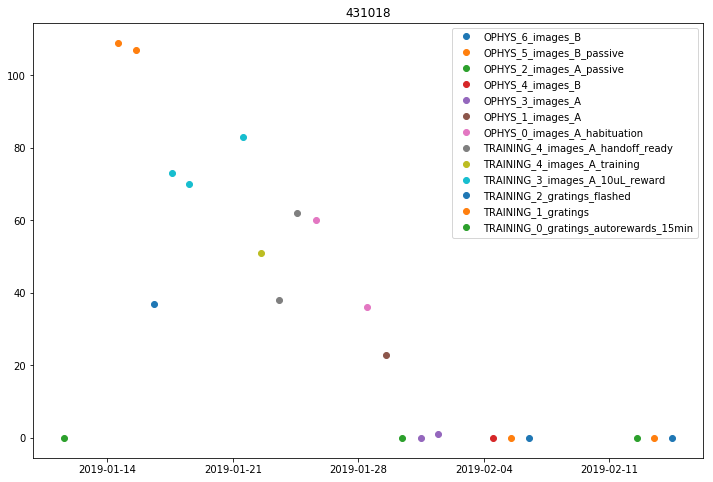

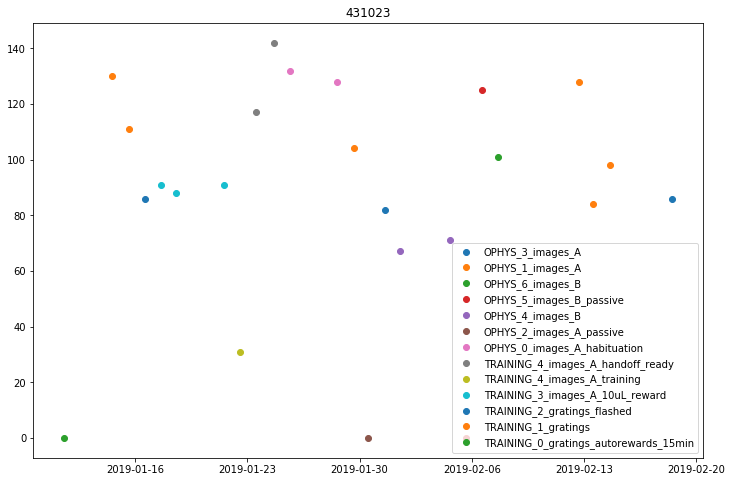

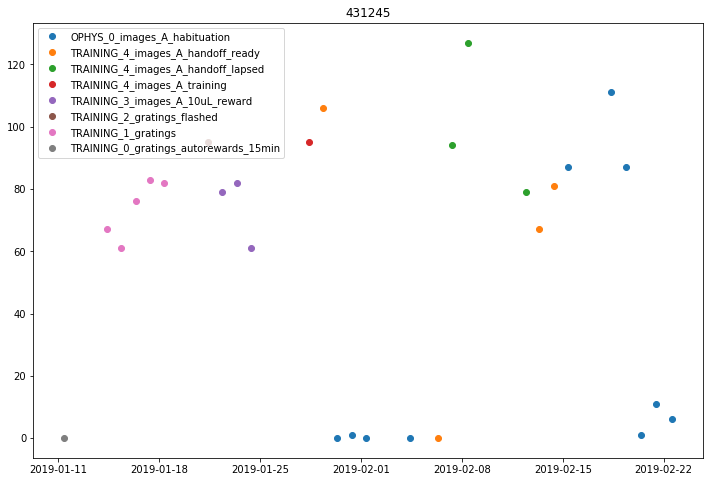

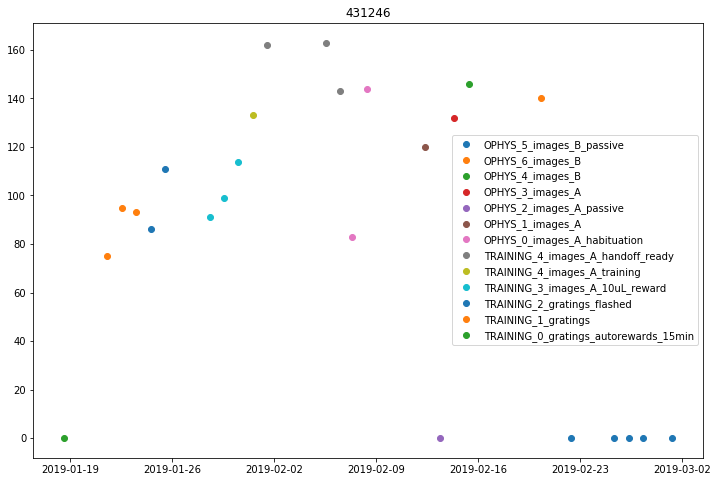

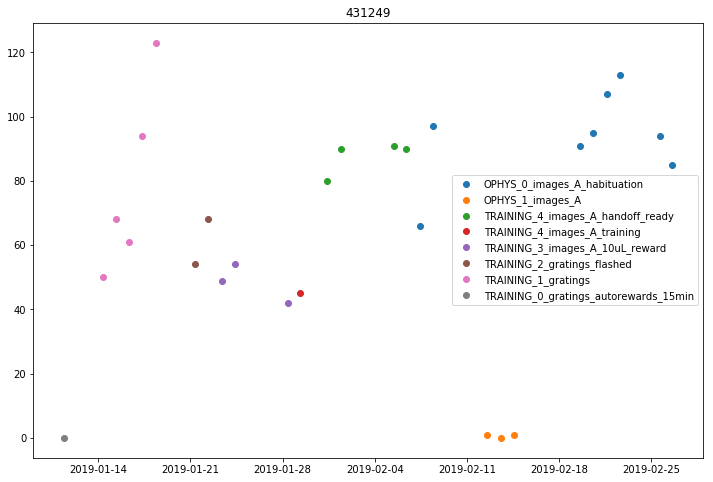

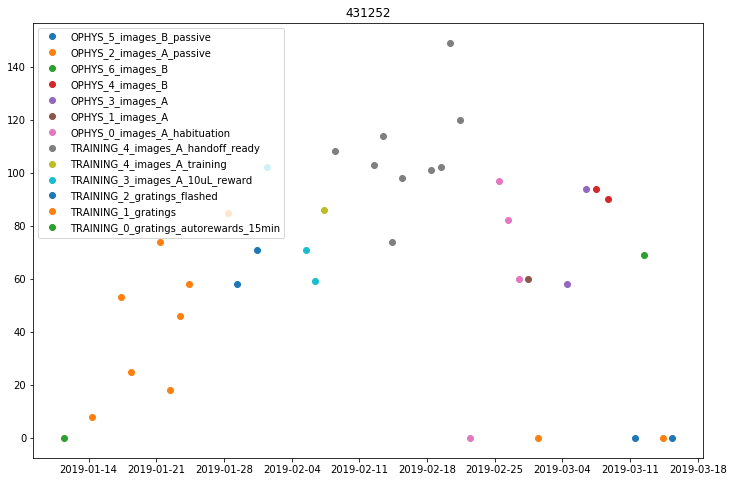

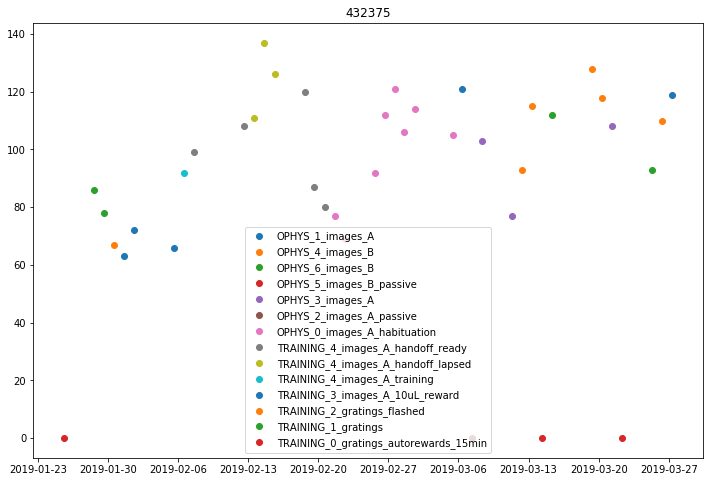

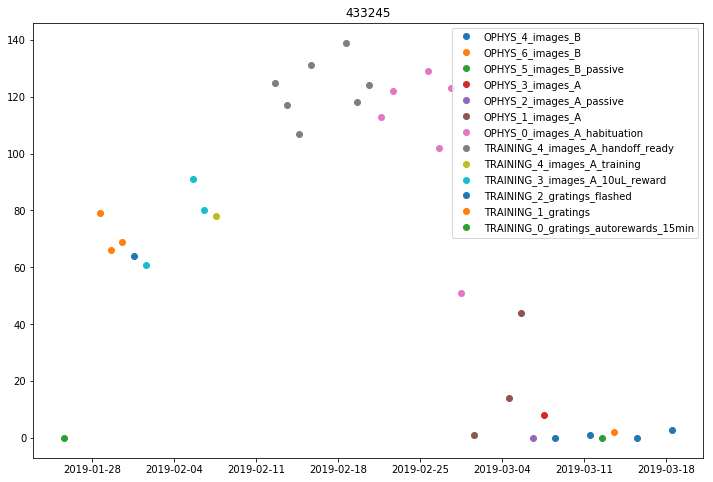

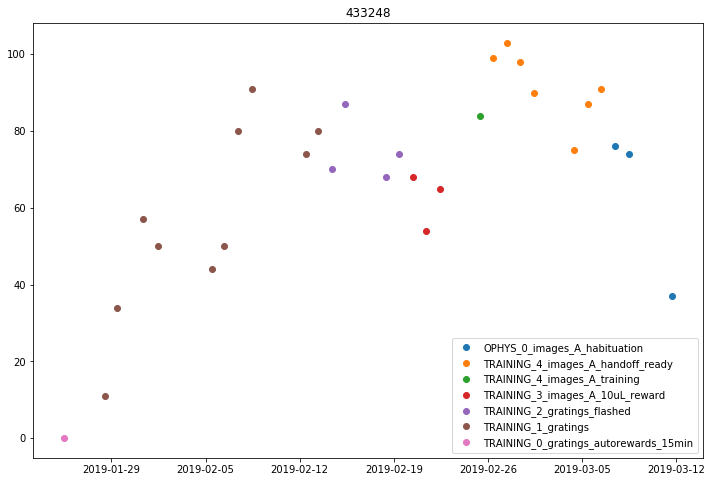

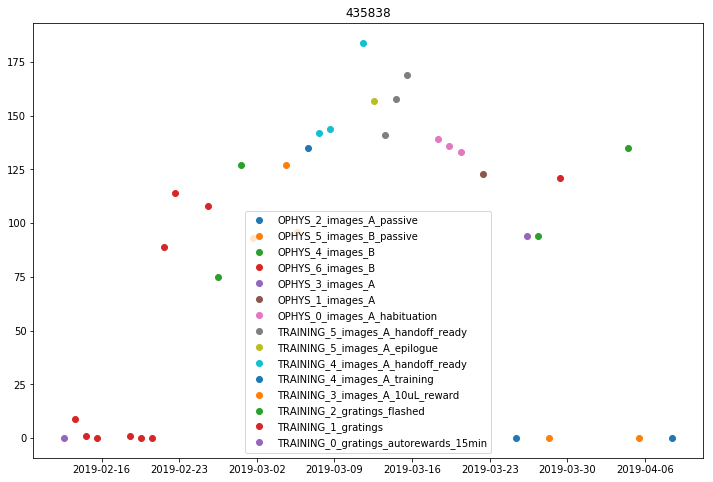

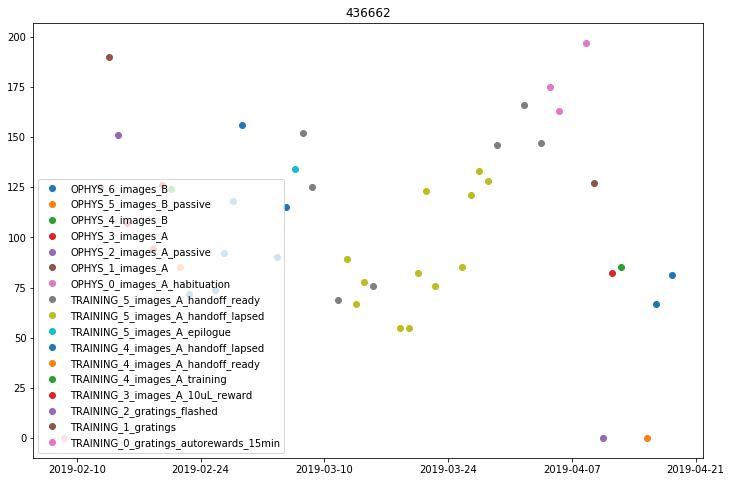

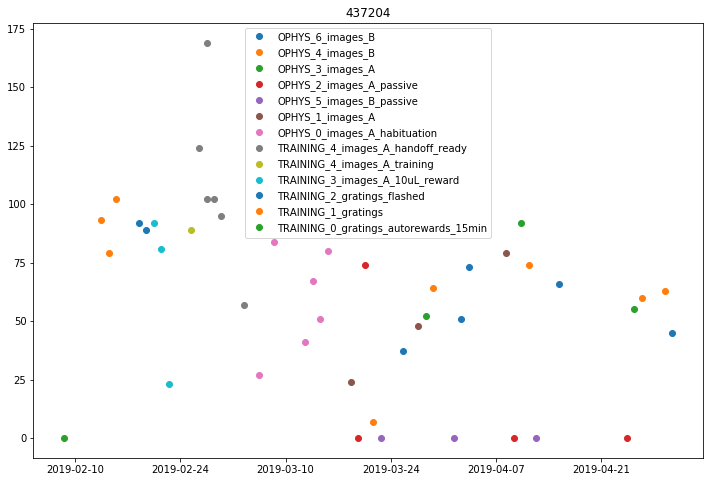

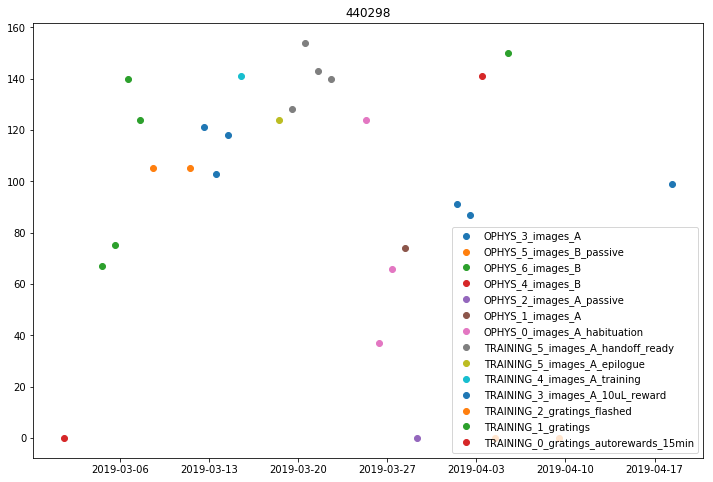

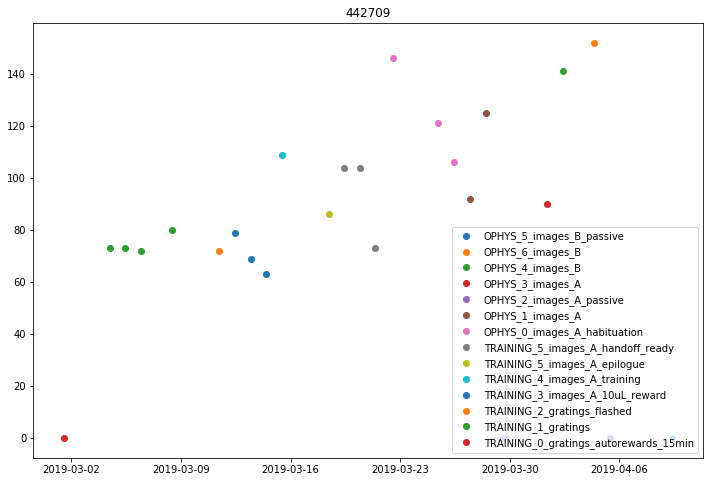

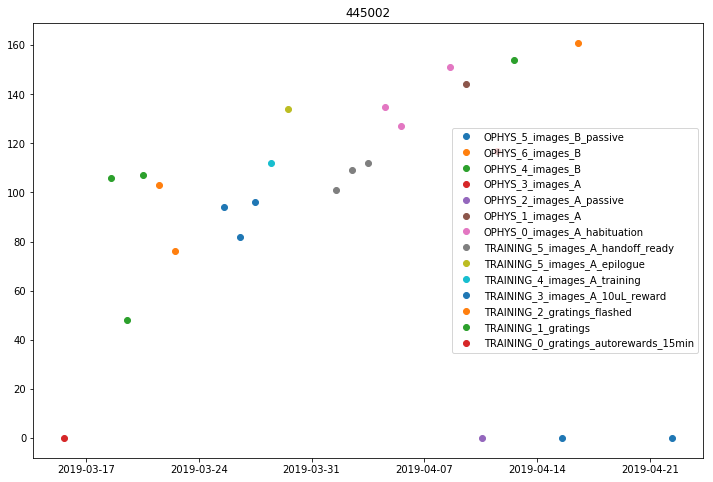

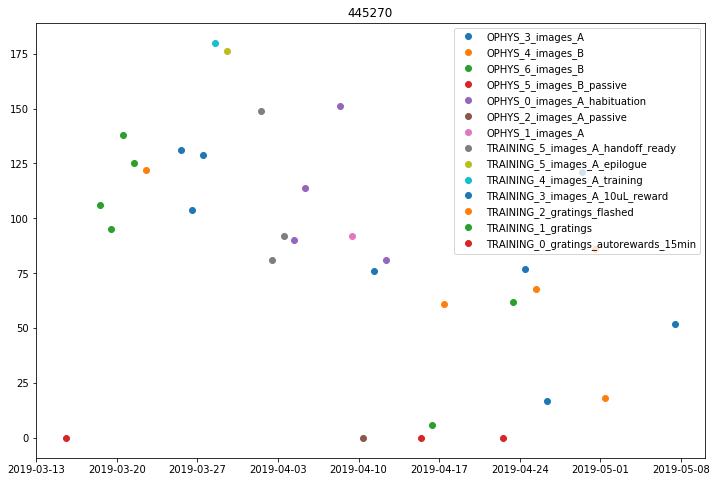

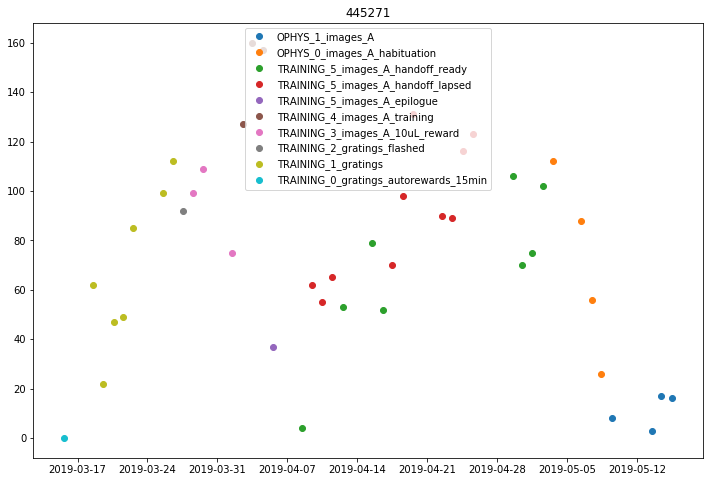

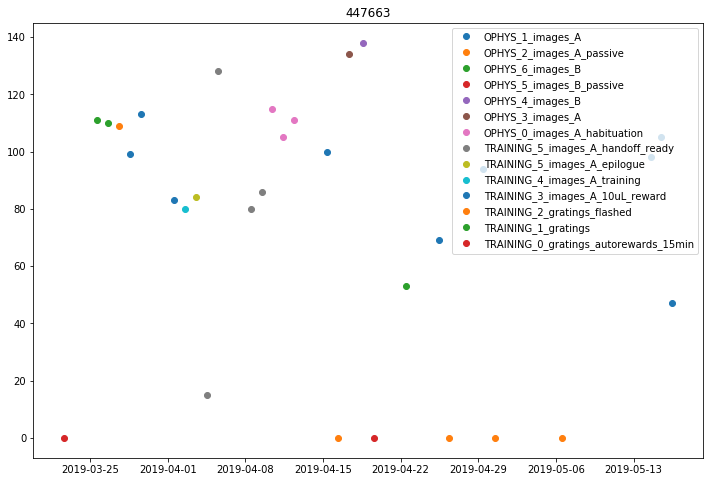

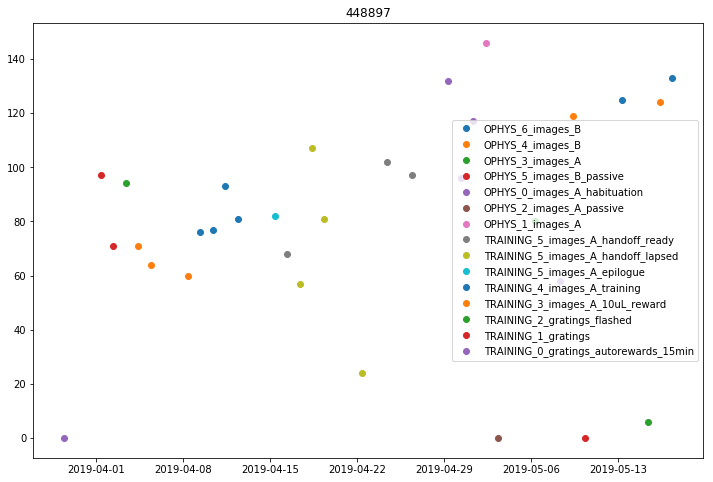

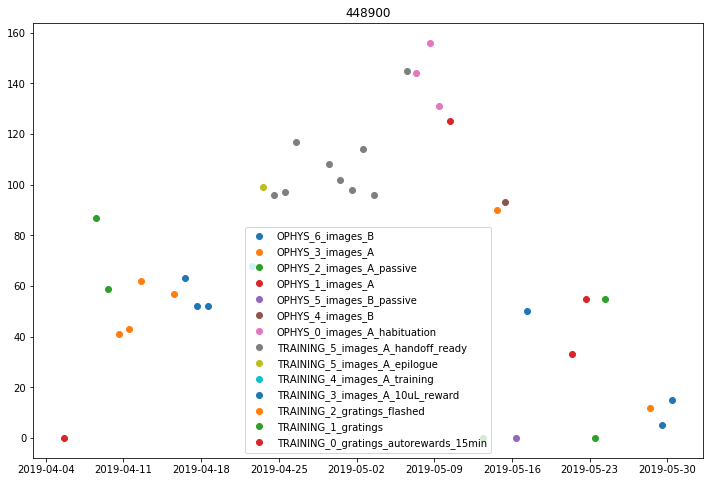

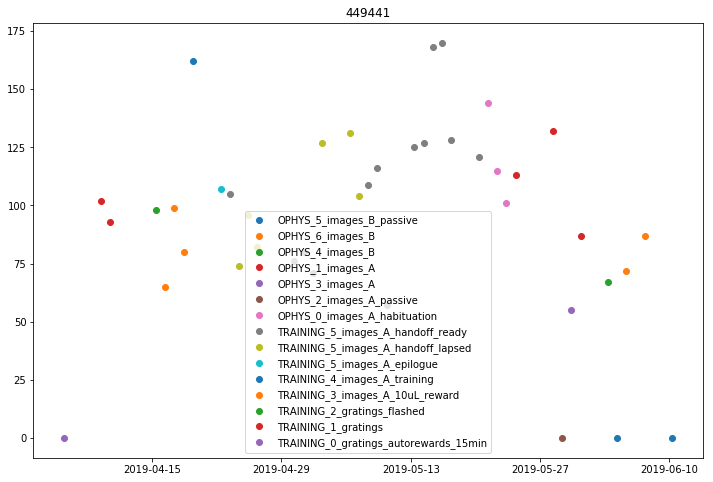

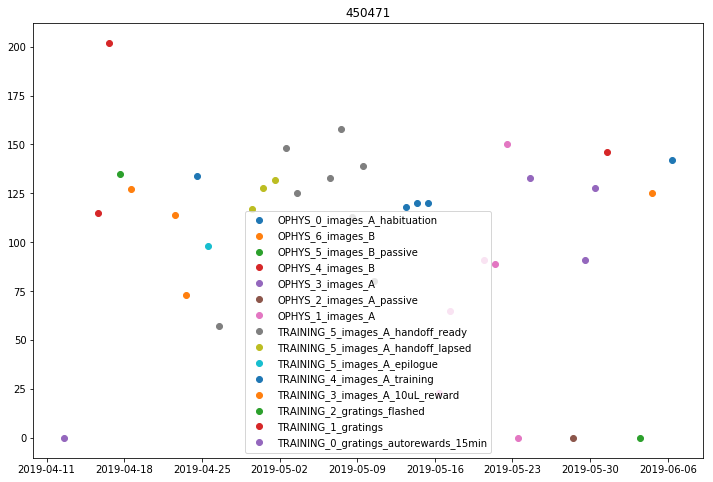

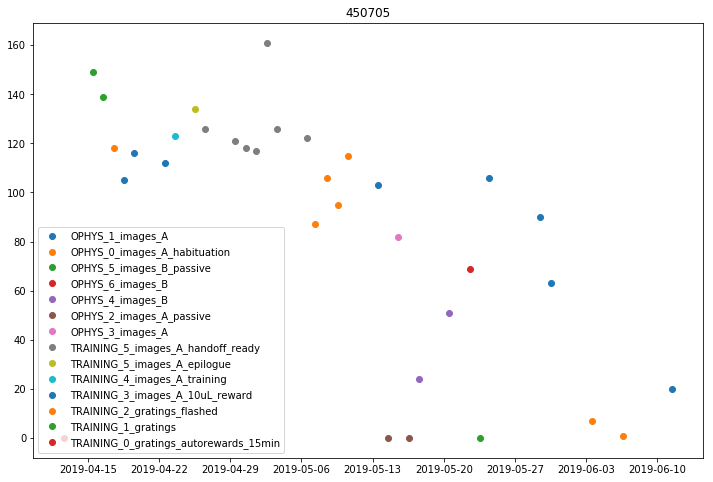

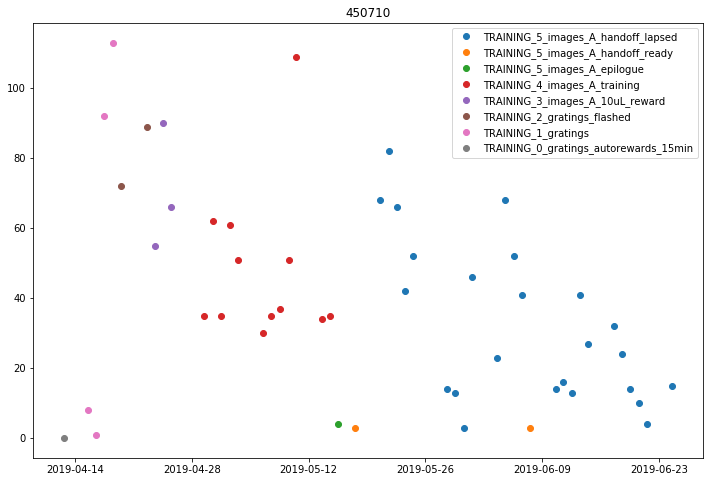

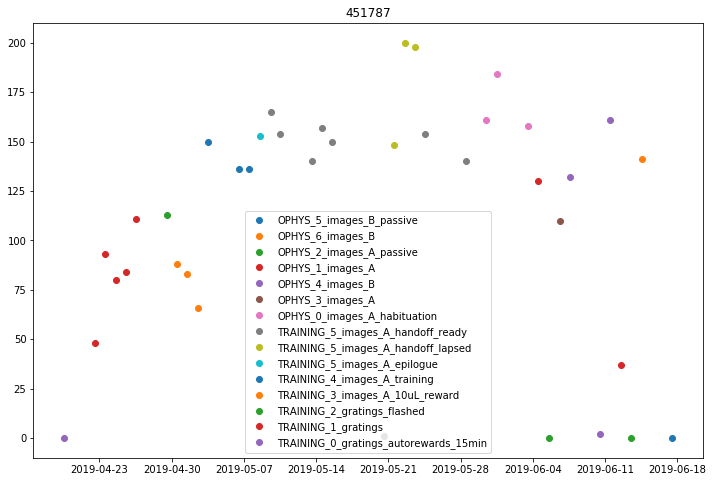

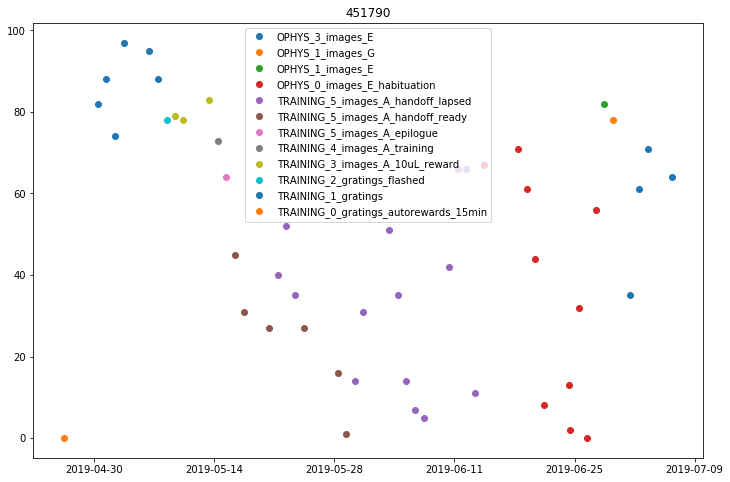

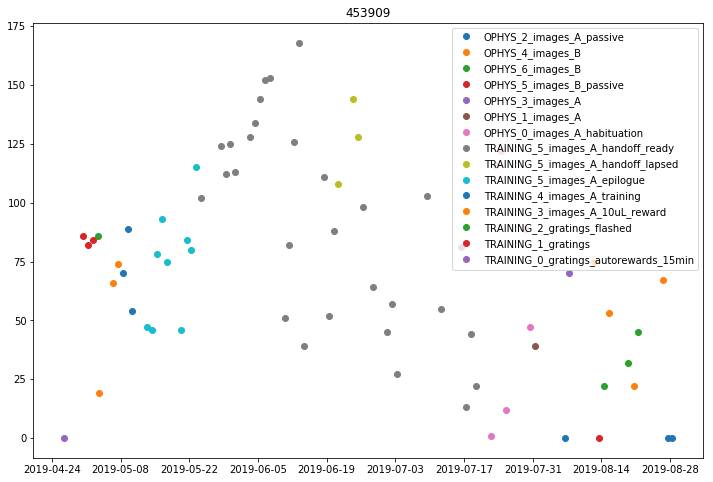

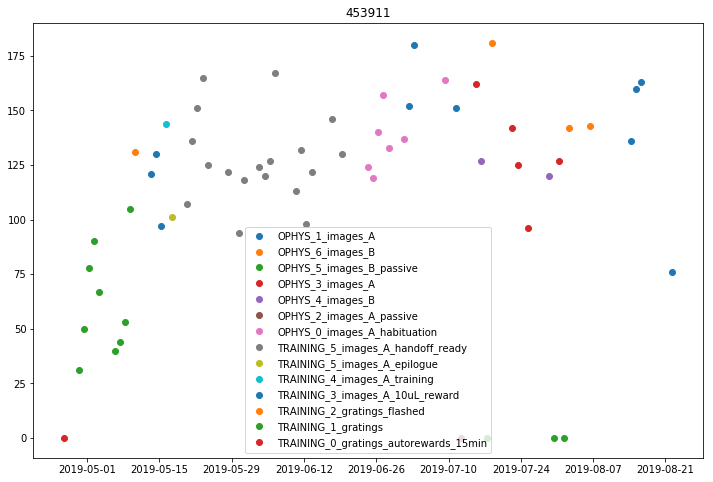

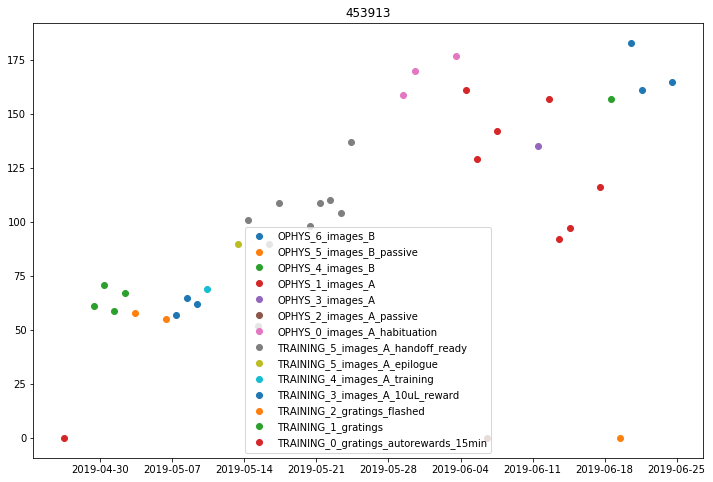

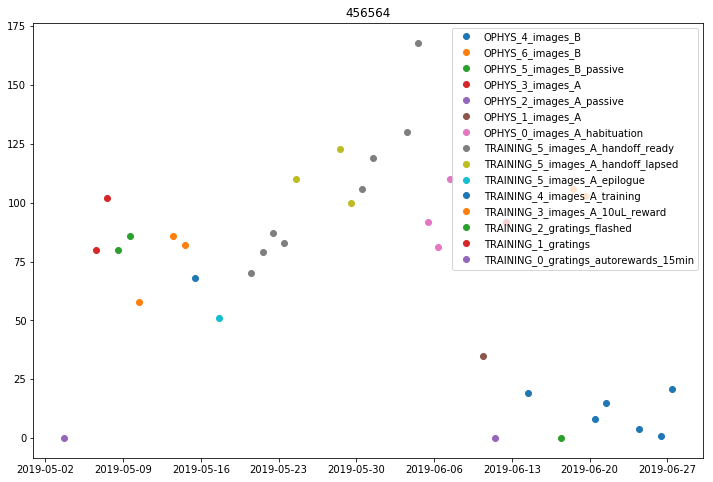

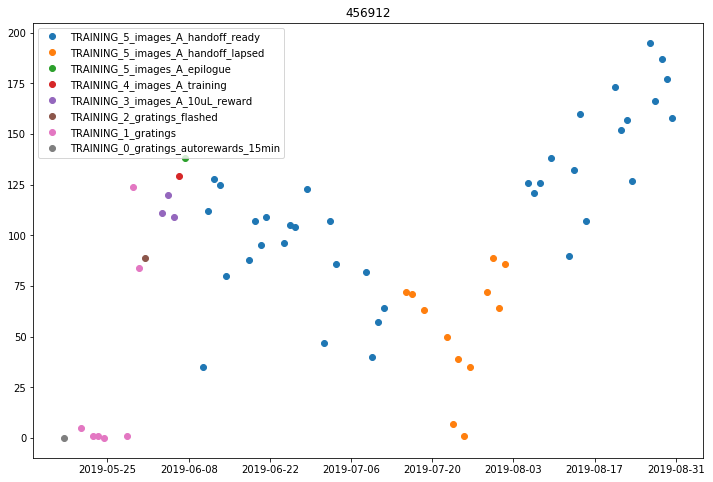

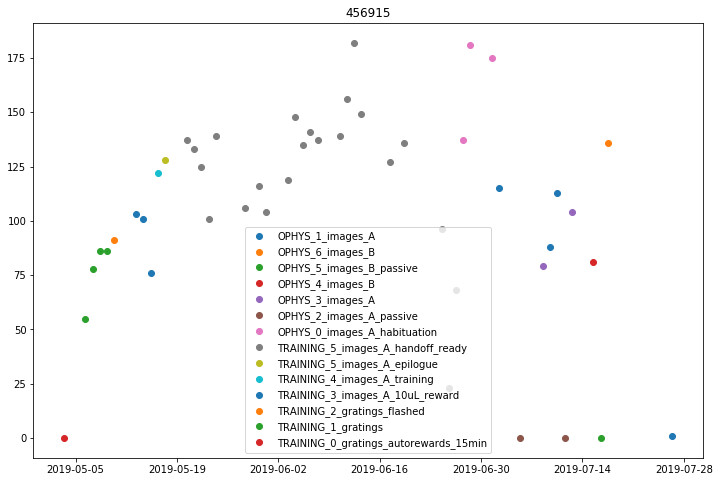

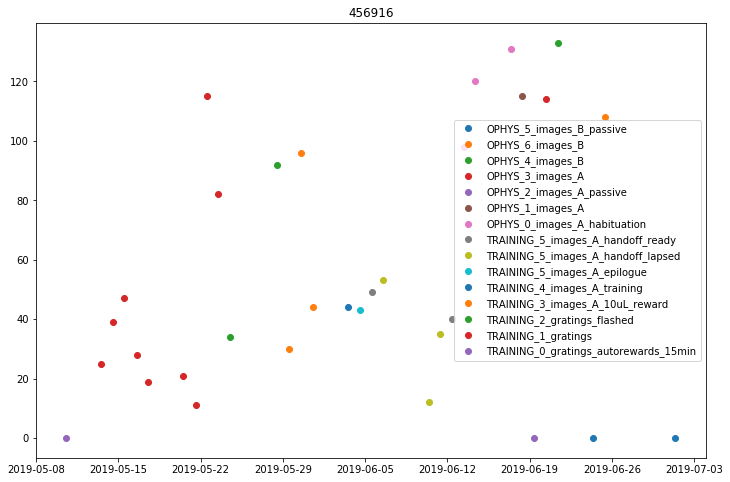

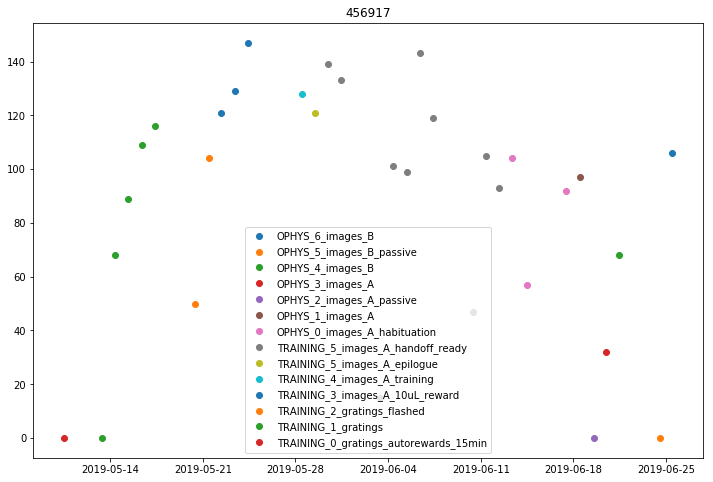

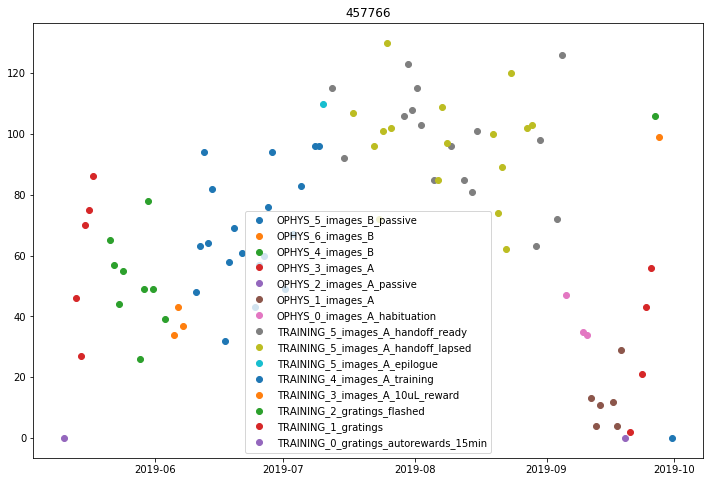

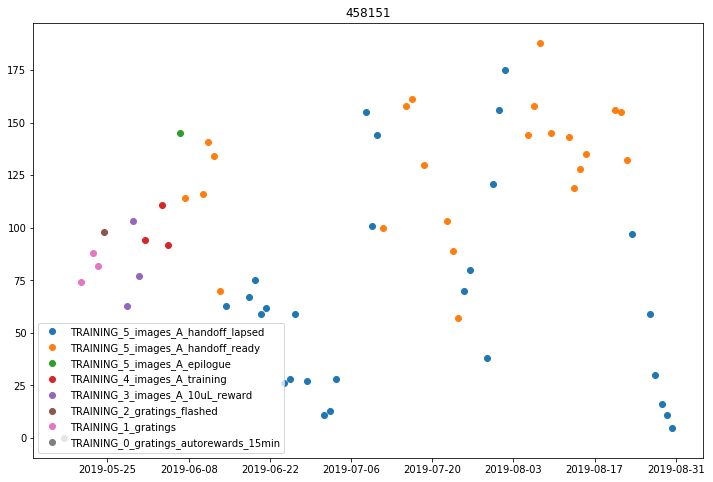

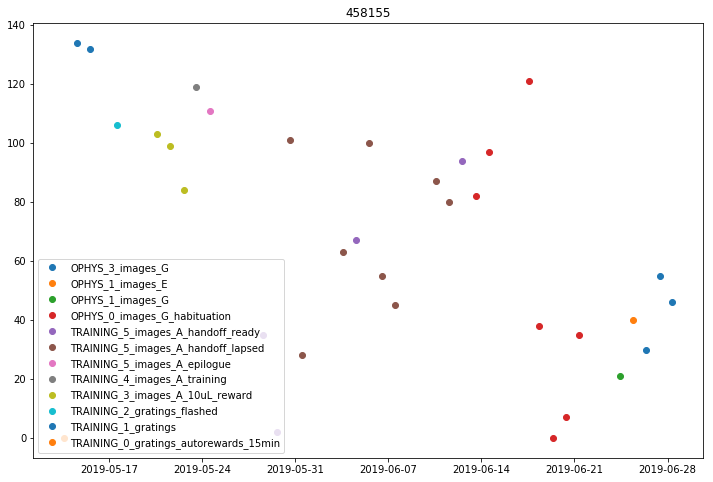

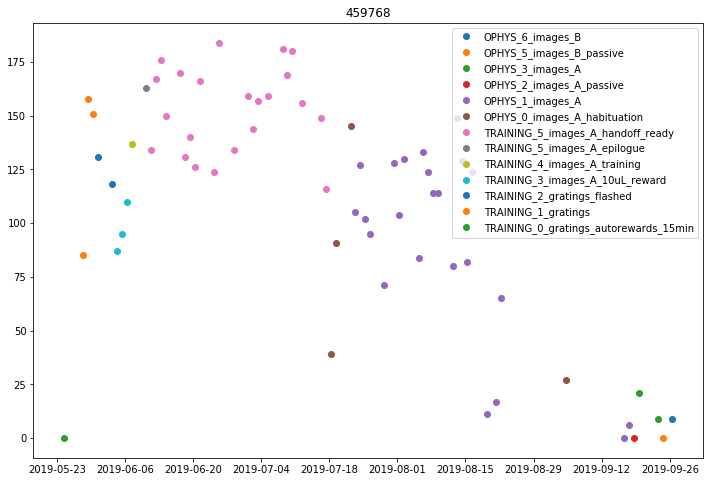

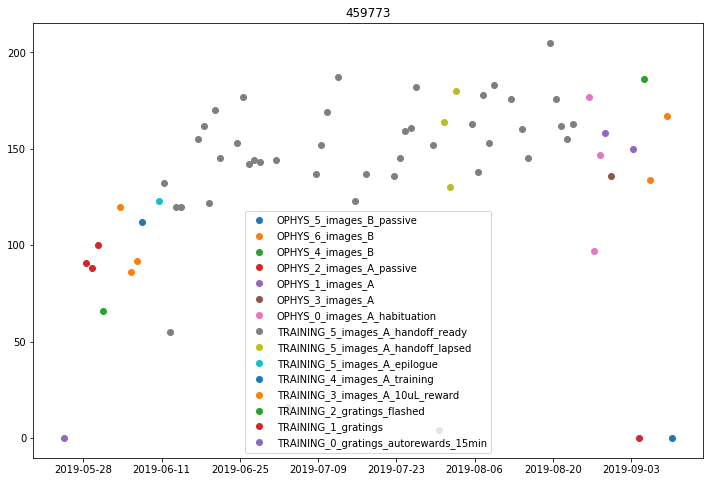

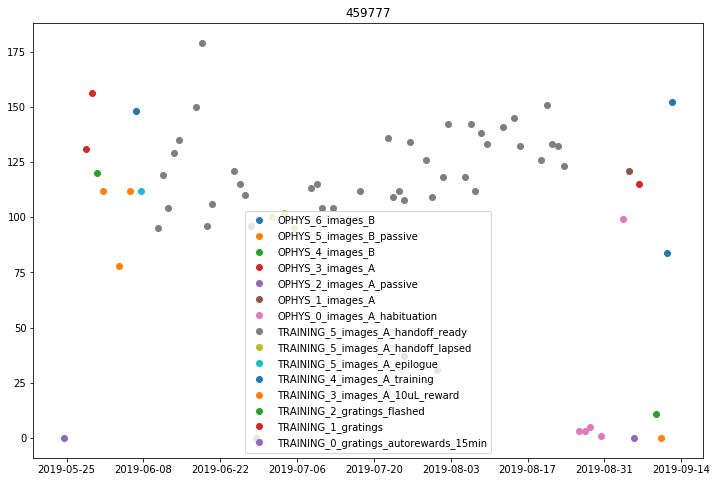

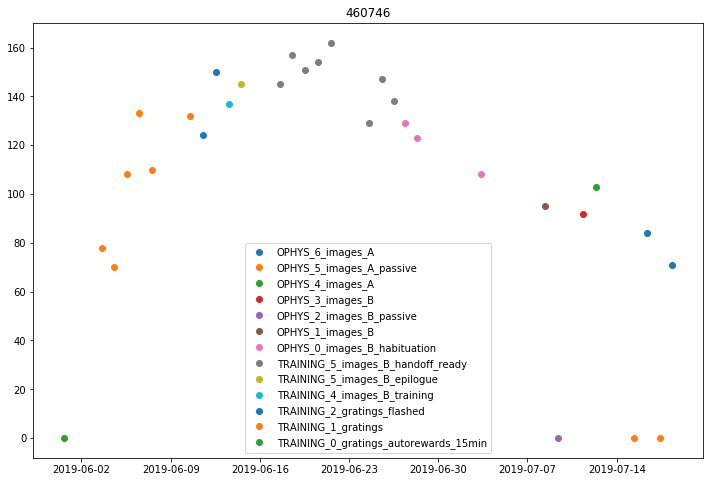

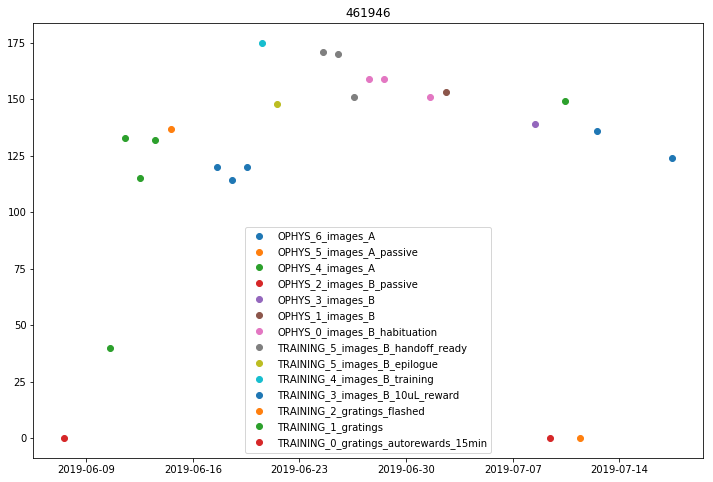

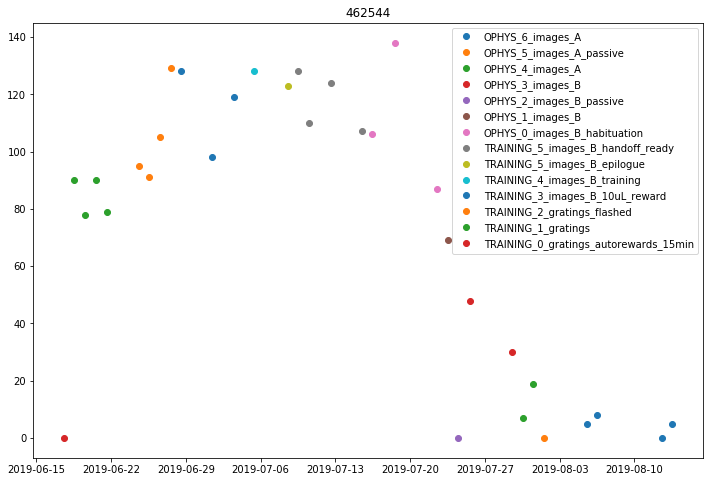

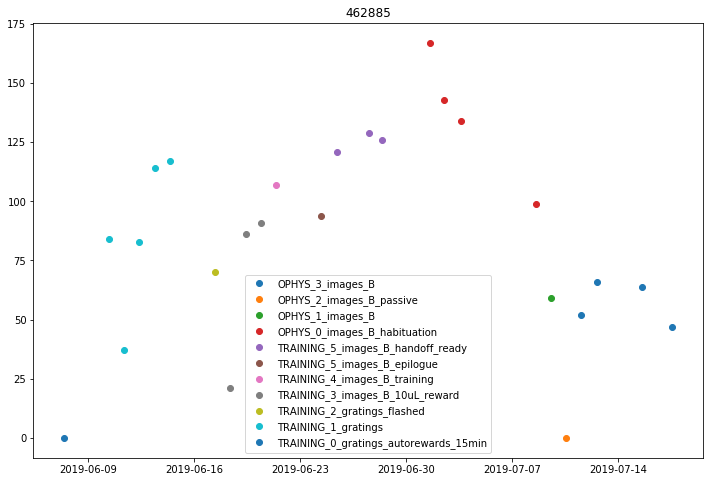

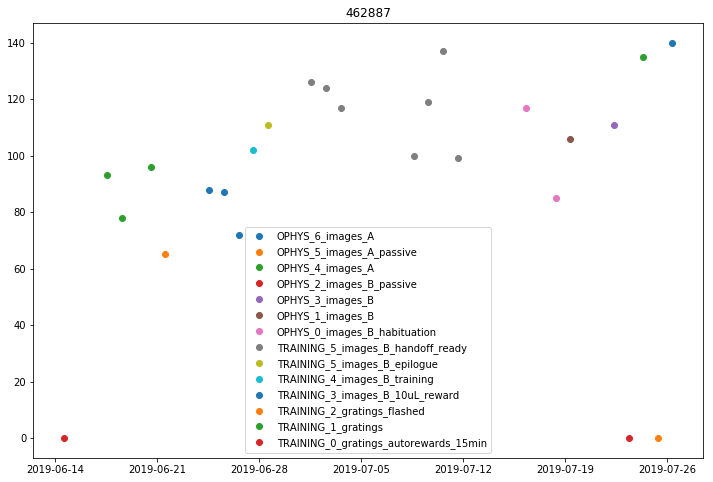

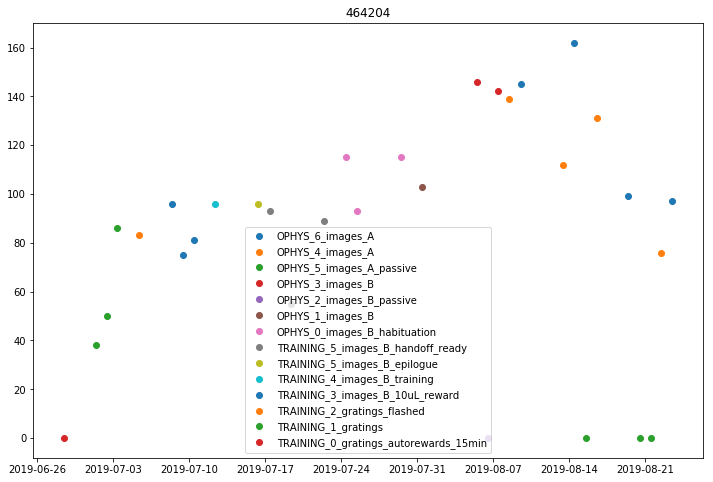

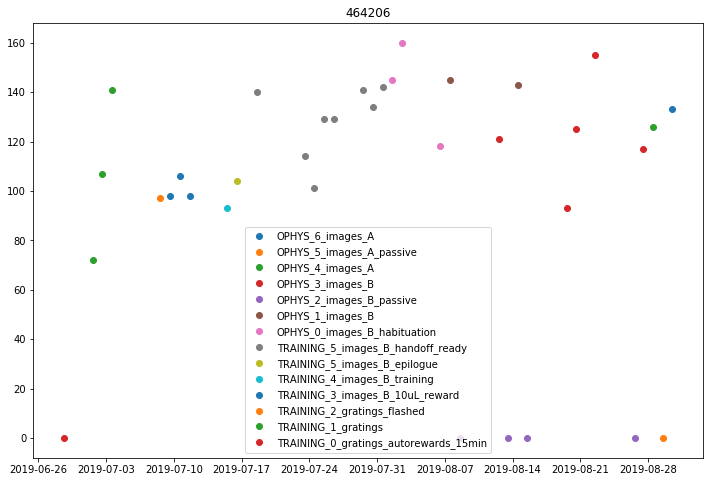

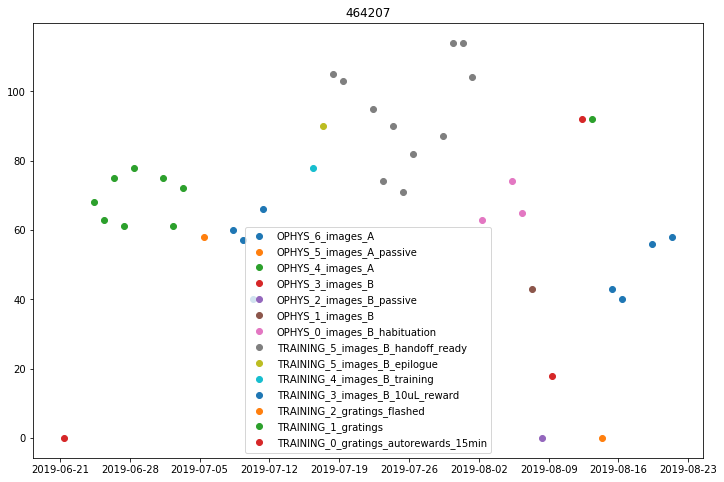

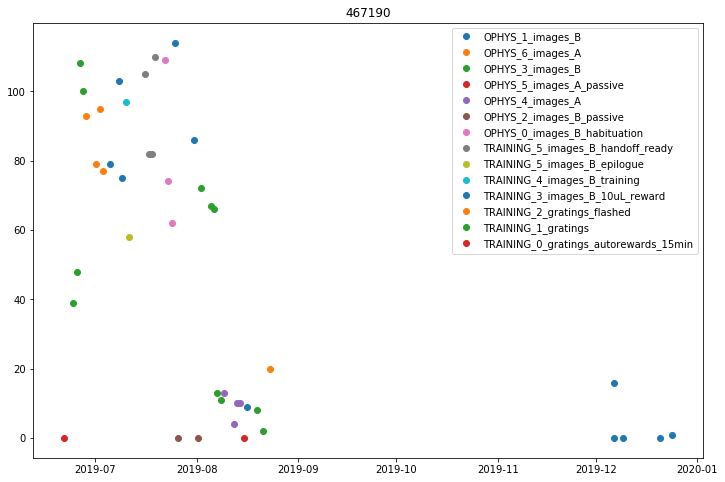

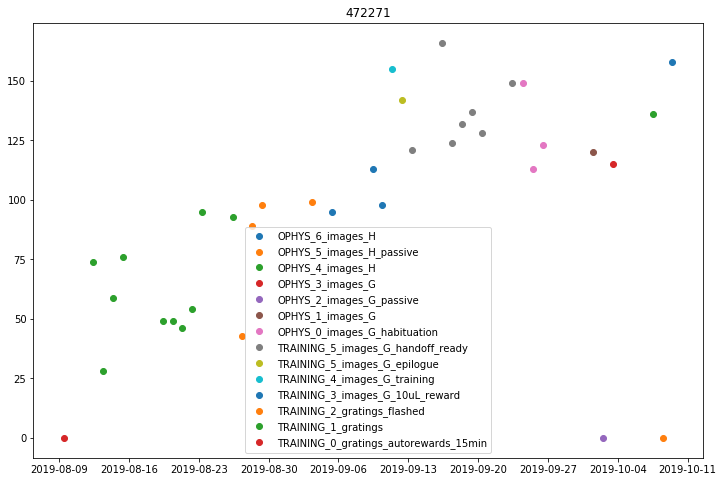

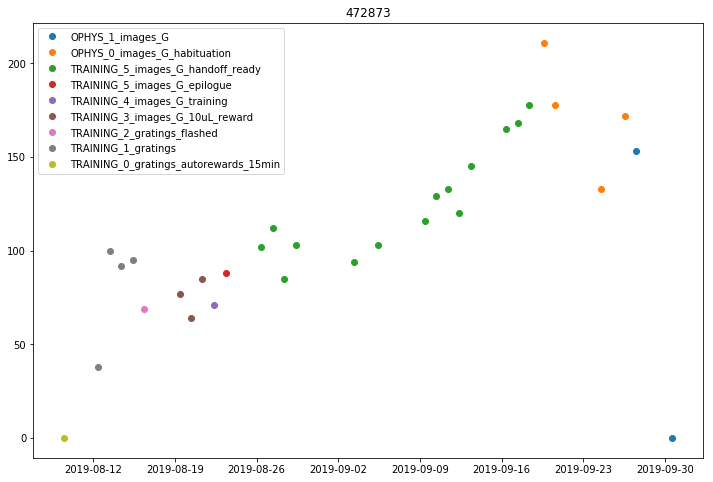

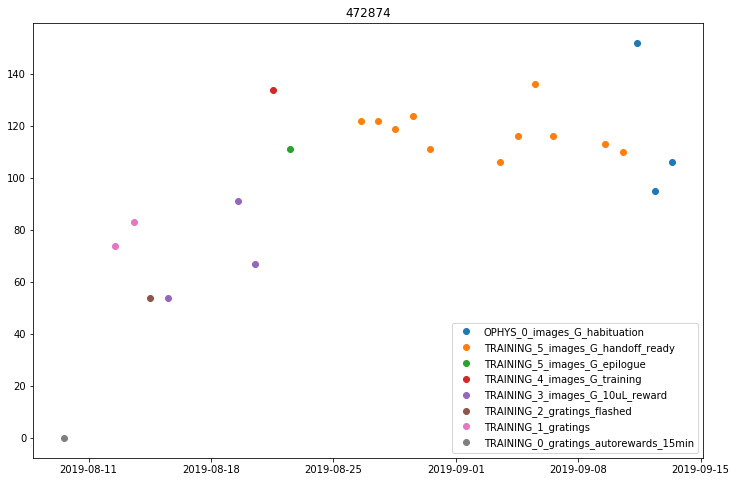

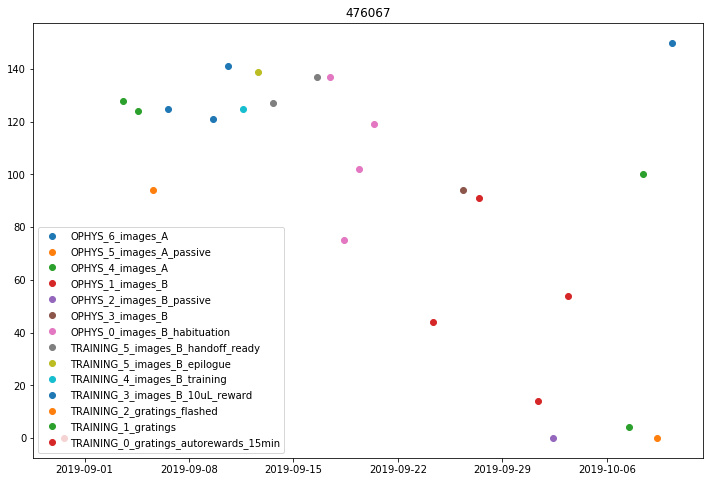

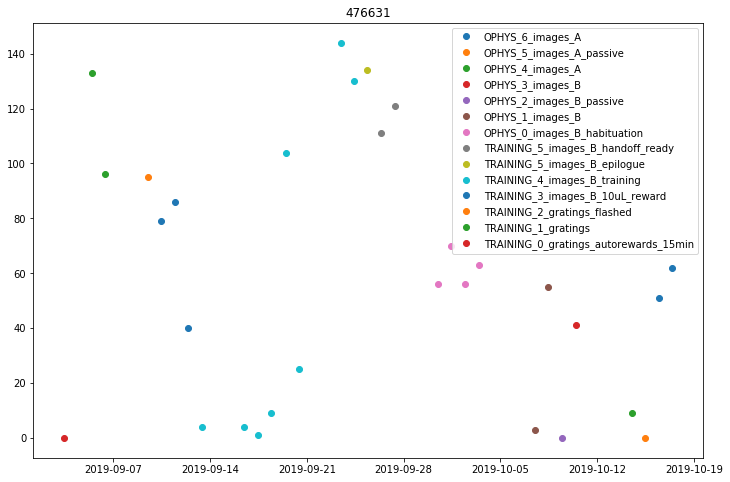

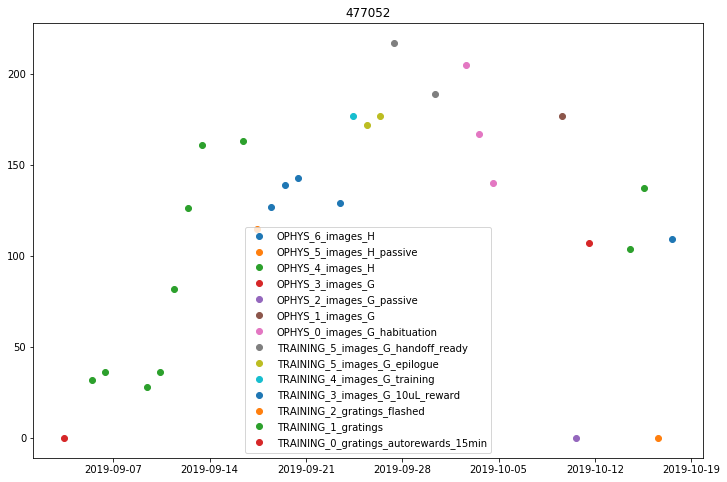

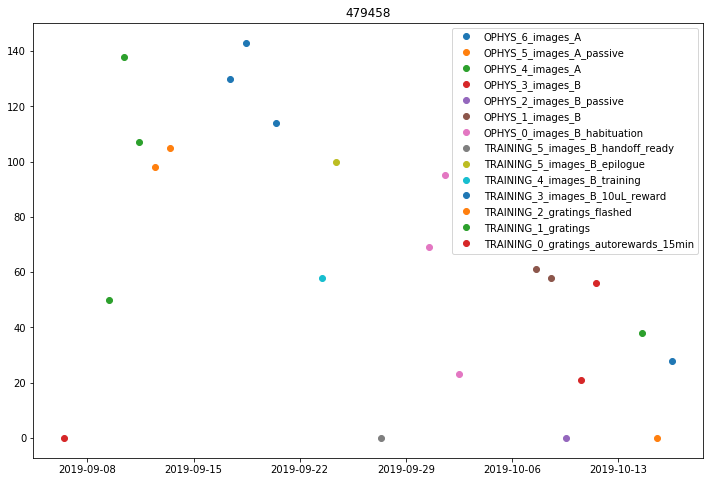

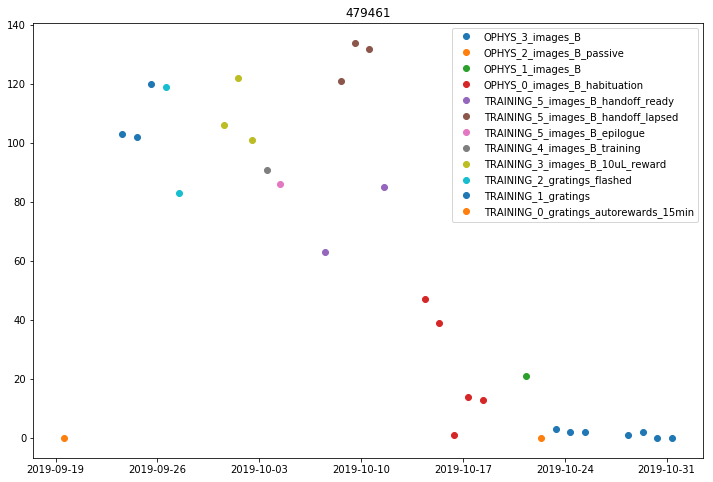

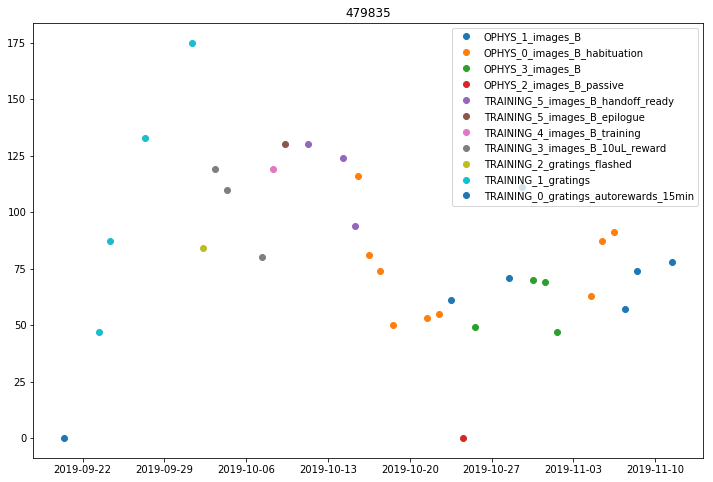

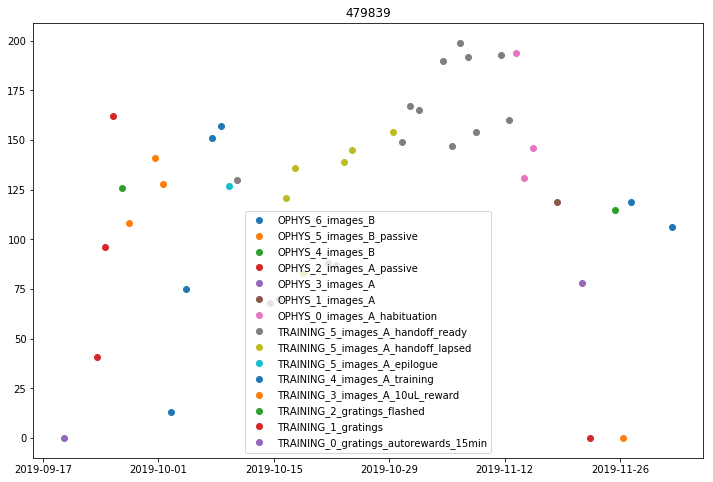

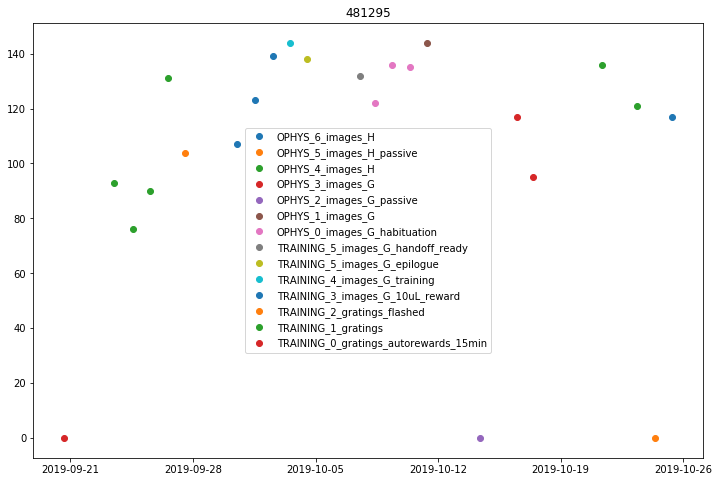

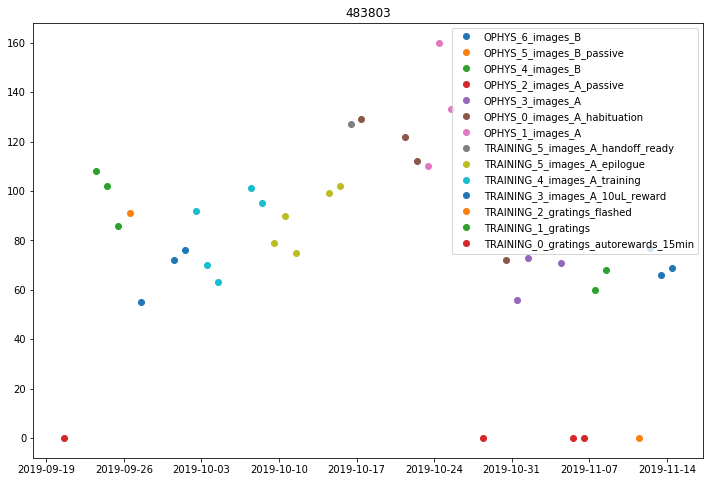

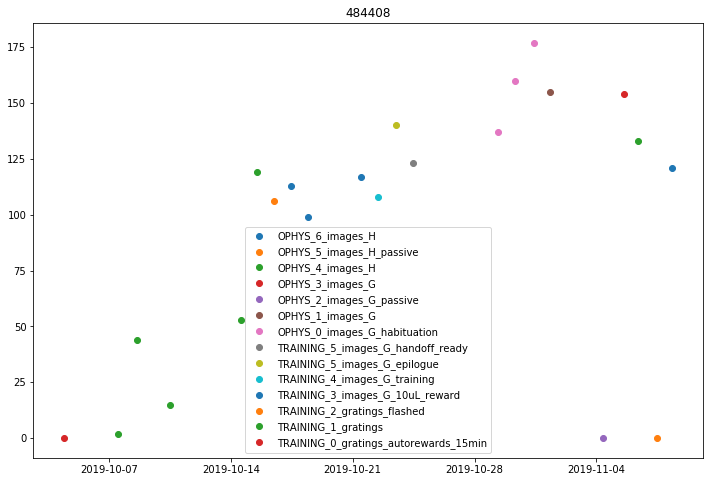

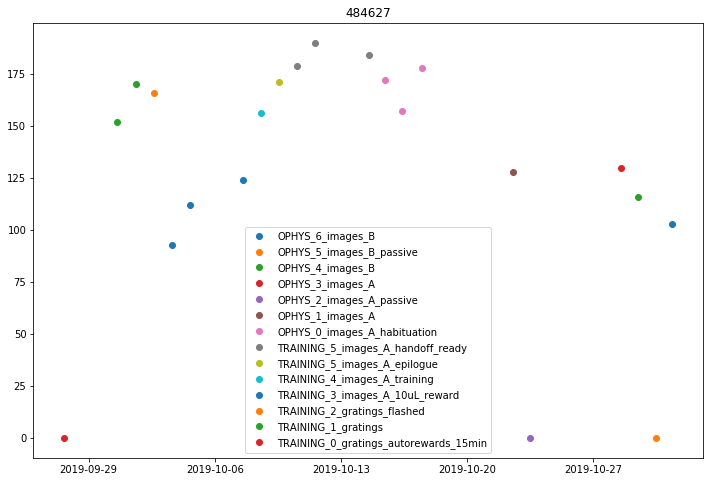

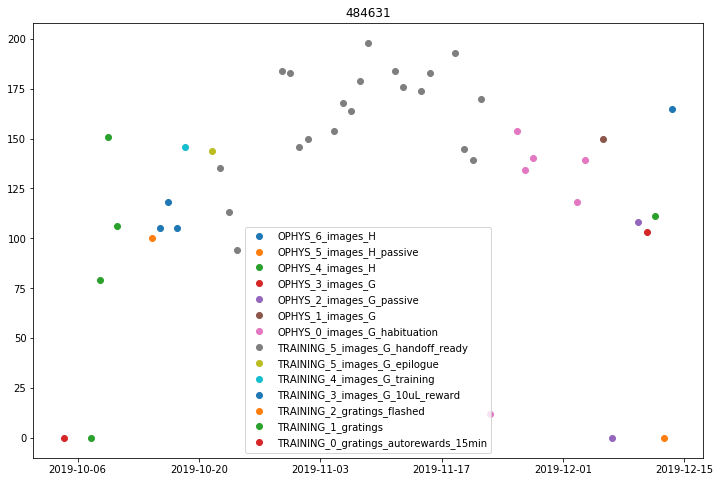

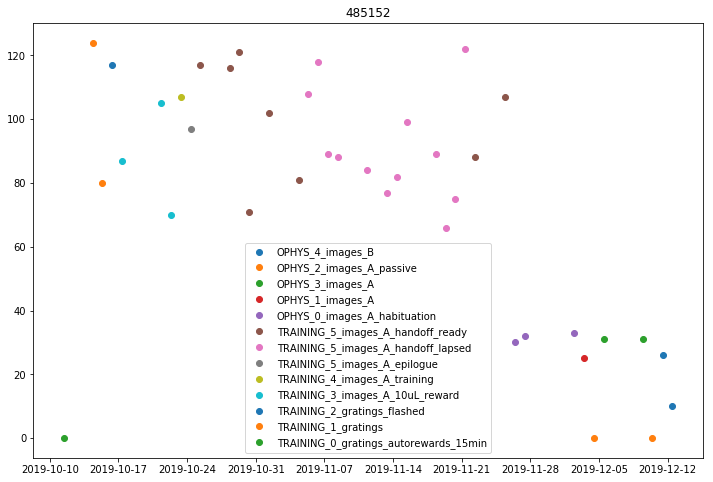

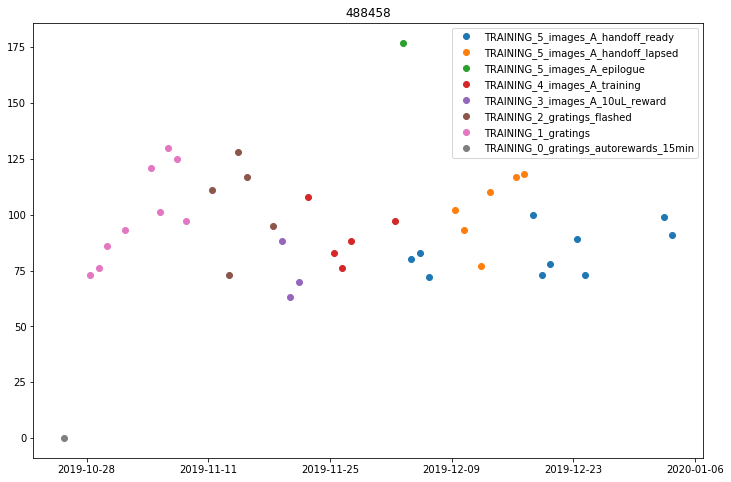

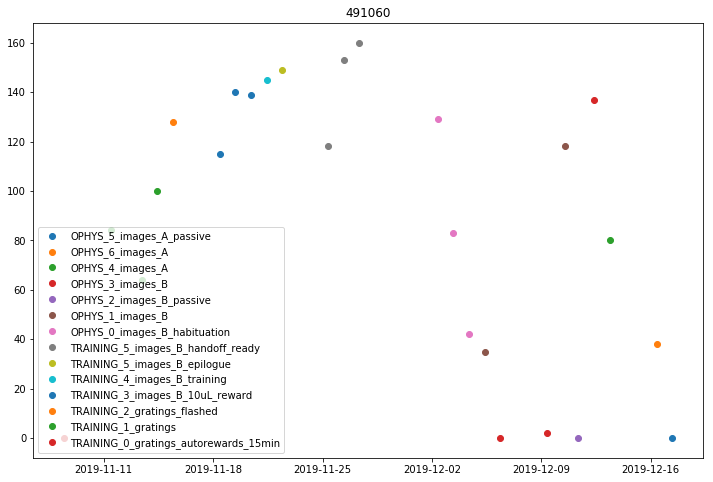

In [85]:
for mid, md in popdf.groupby(level=0):
    stages = md['stage'].unique()
    fig, ax = plt.subplots()
    fig.set_size_inches([12,8])
    for stage in stages:
        d = md.loc[md['stage']== stage]
        ax.plot(d['session_datetime_local'], d['earned_rewards'], 'o')
    ax.legend(stages)
    ax.set_title(mid)

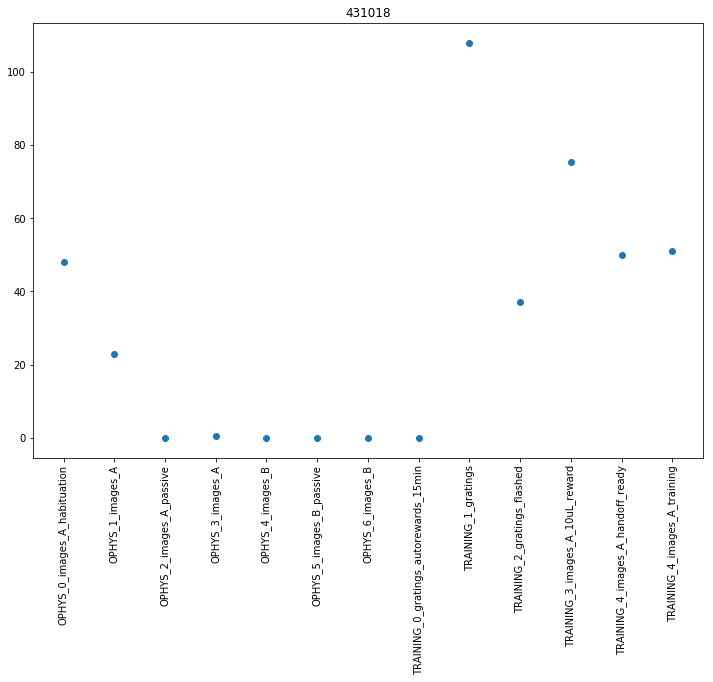

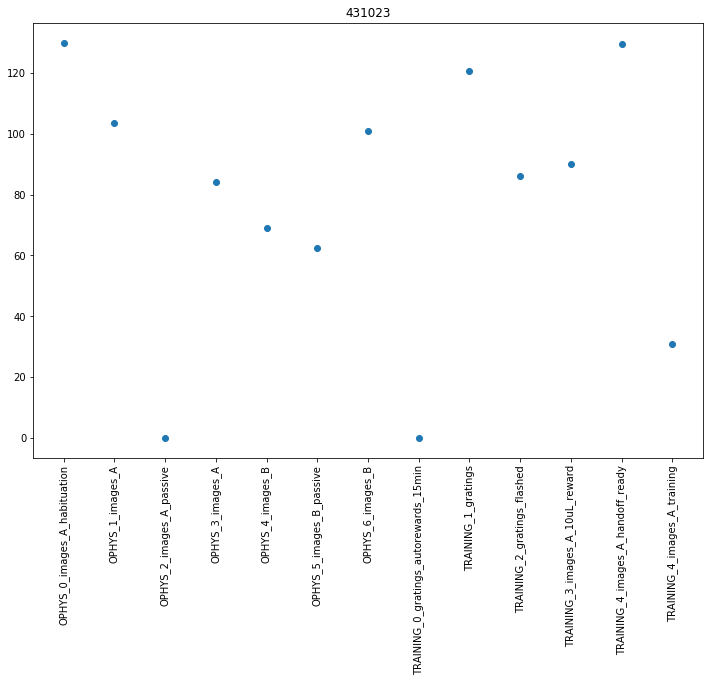

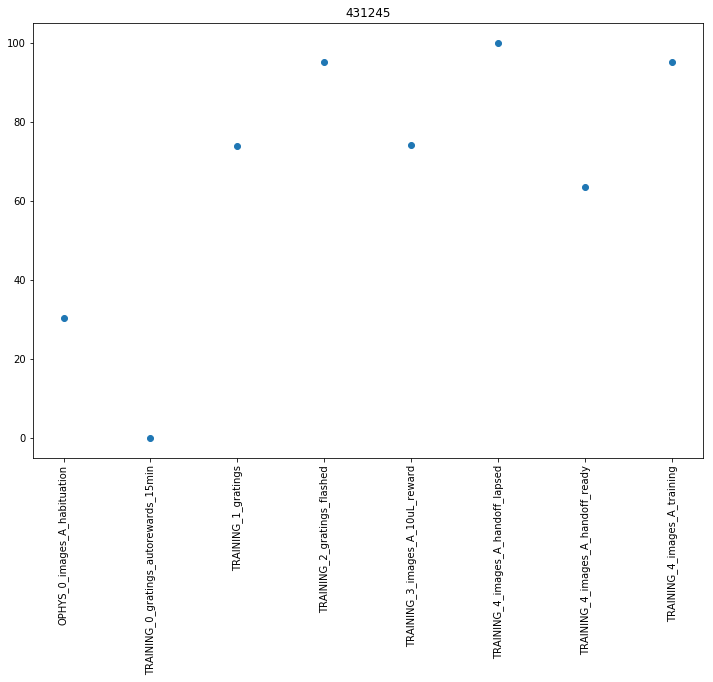

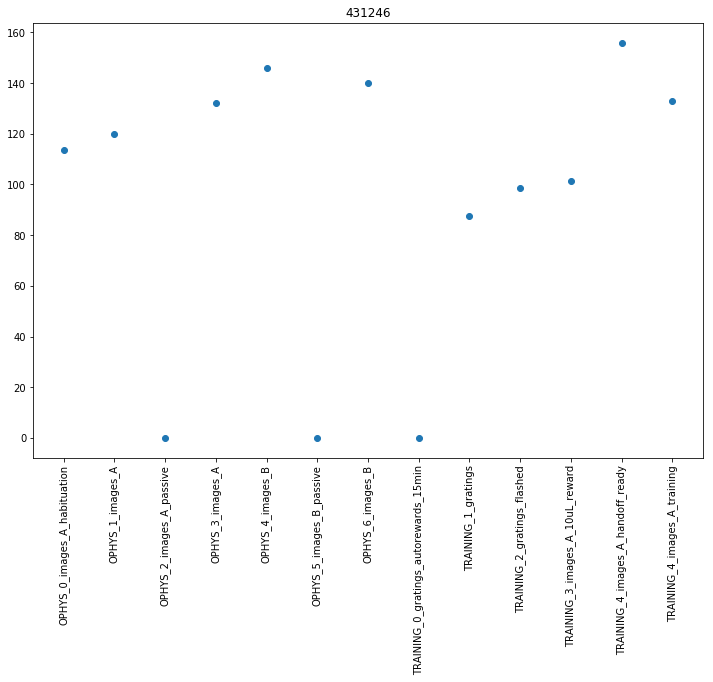

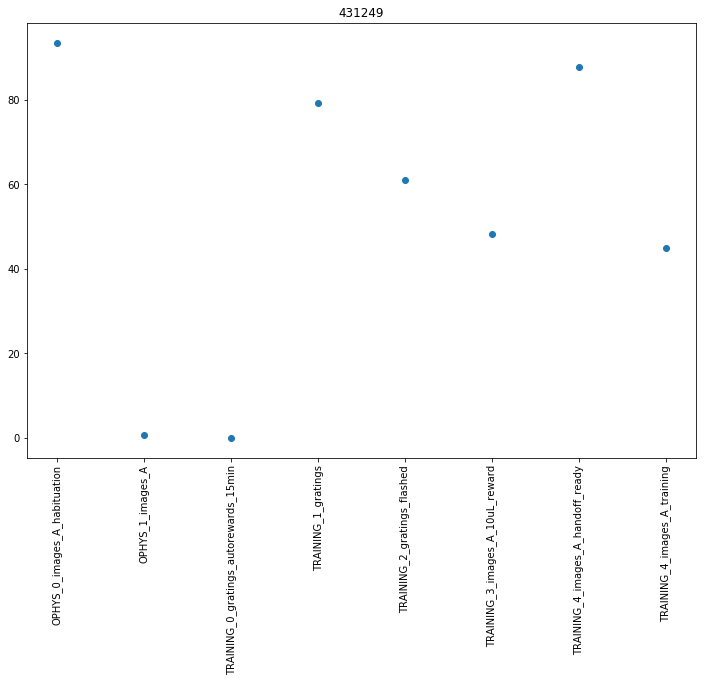

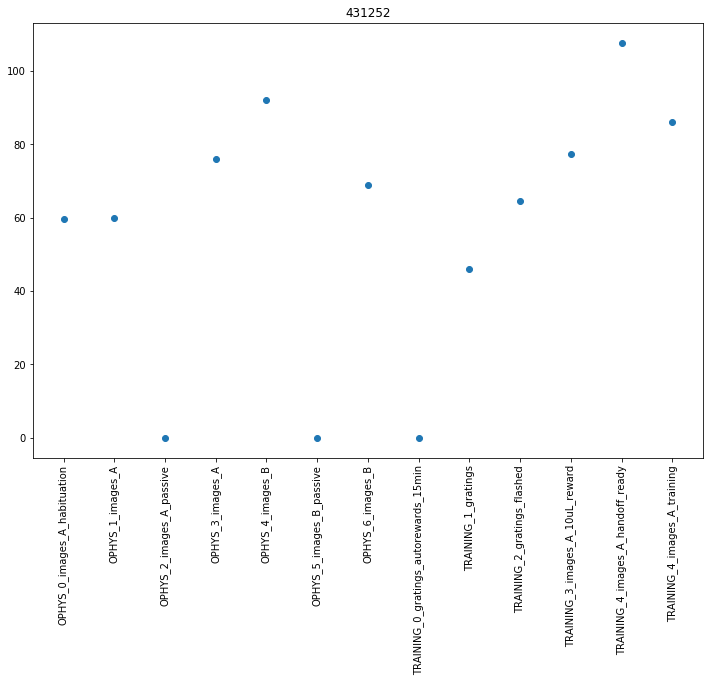

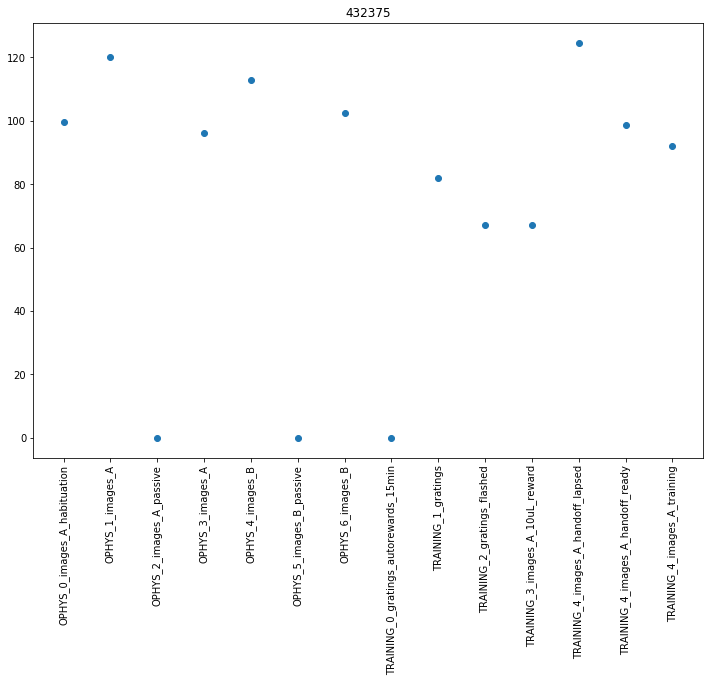

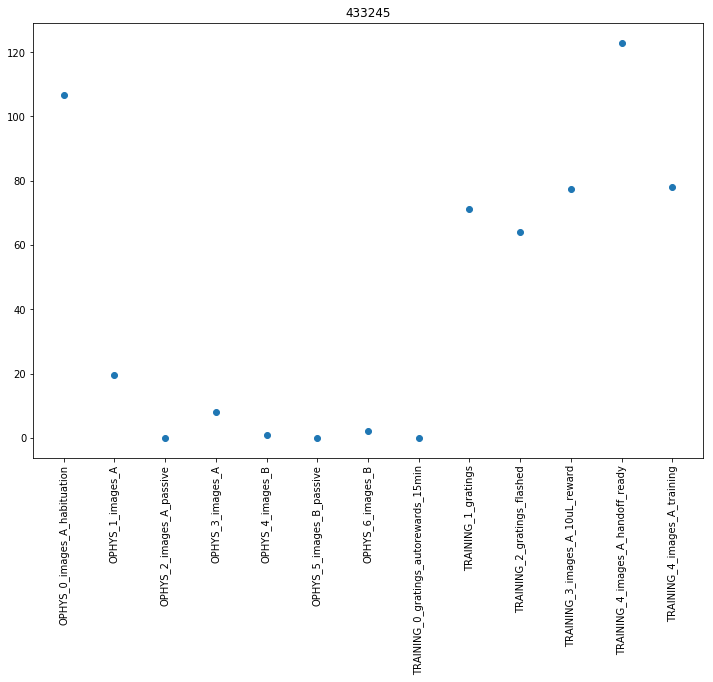

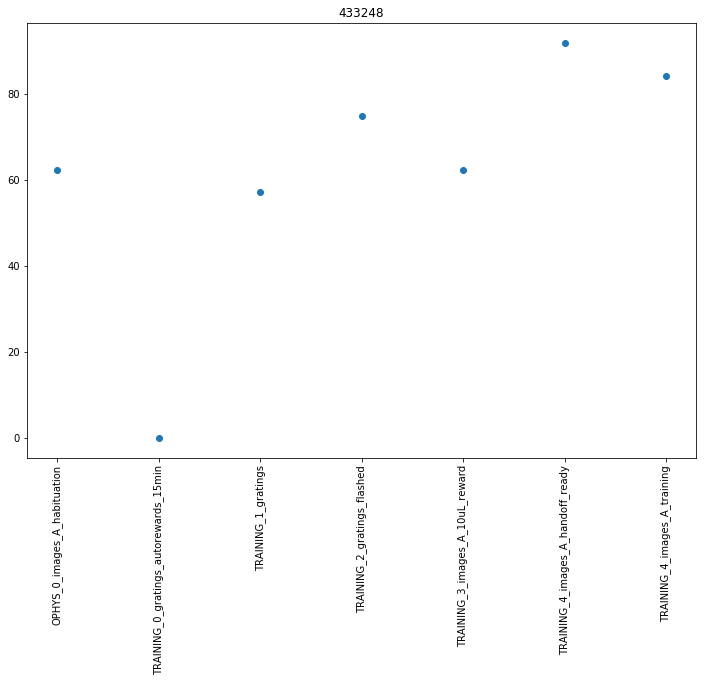

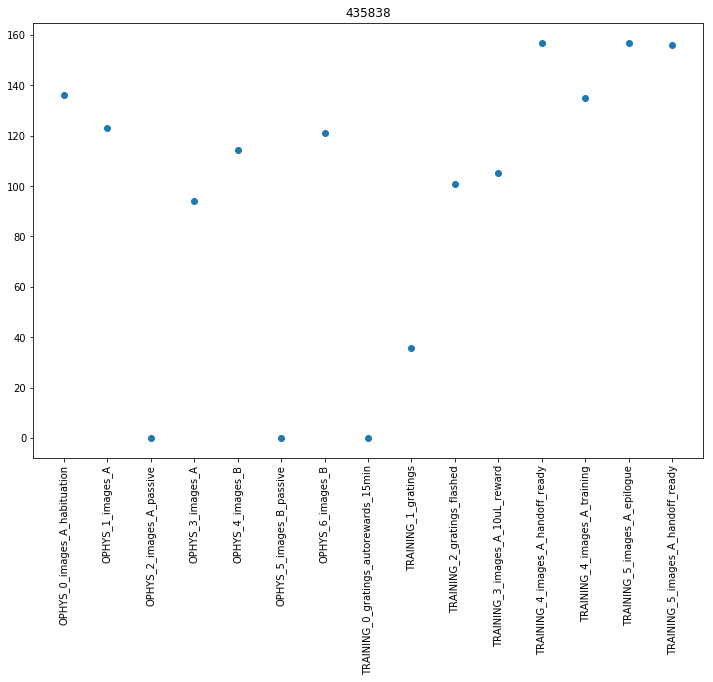

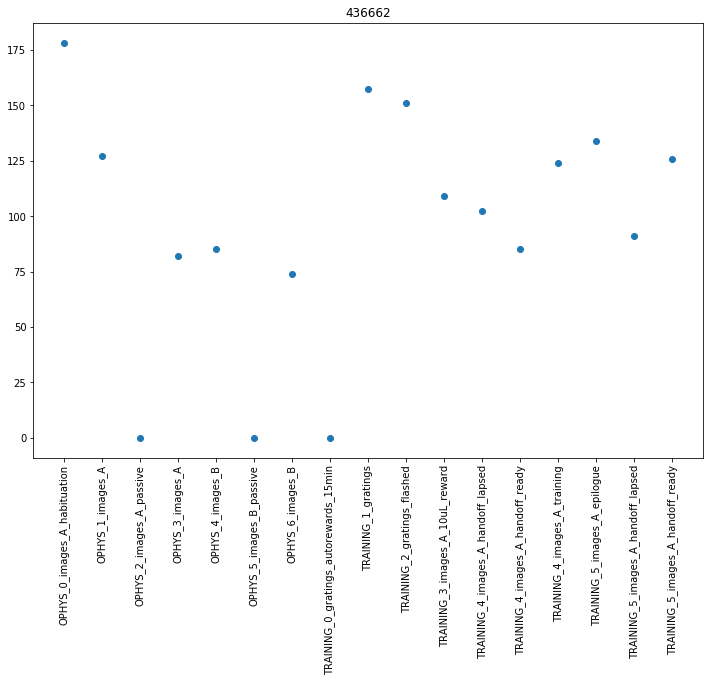

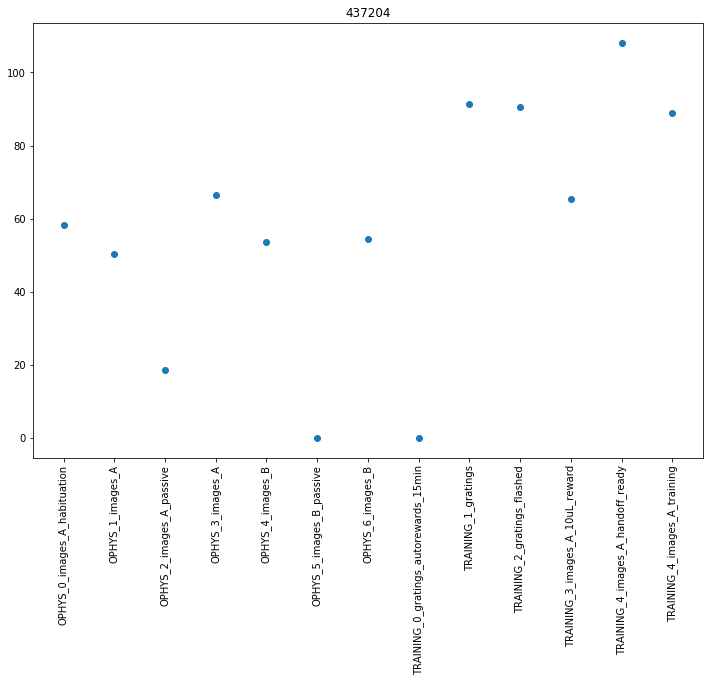

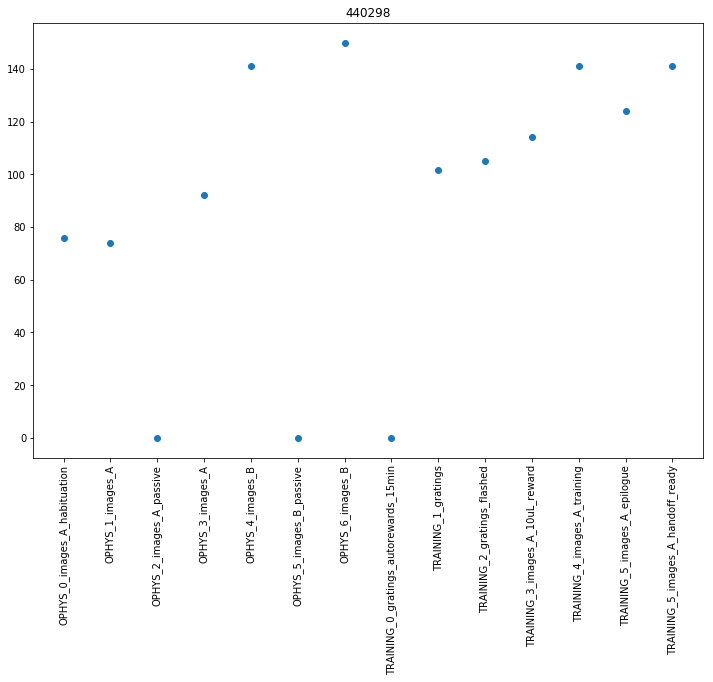

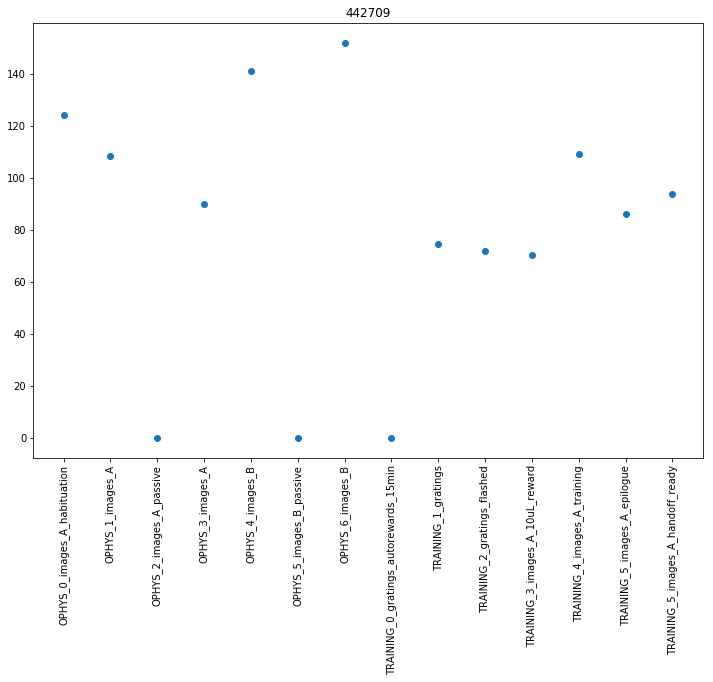

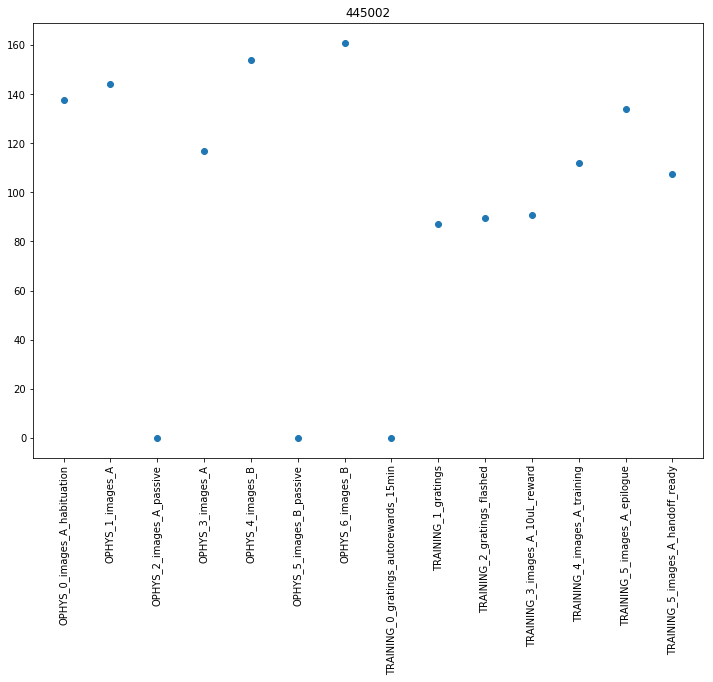

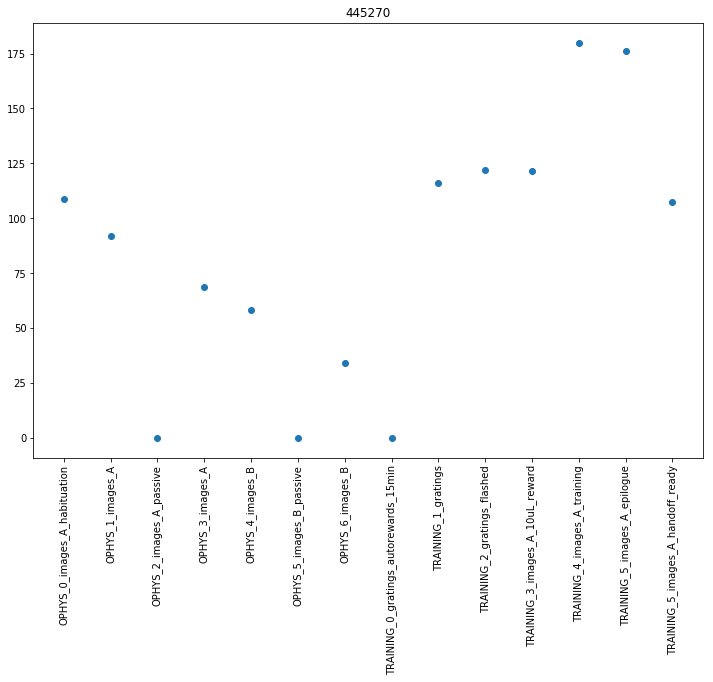

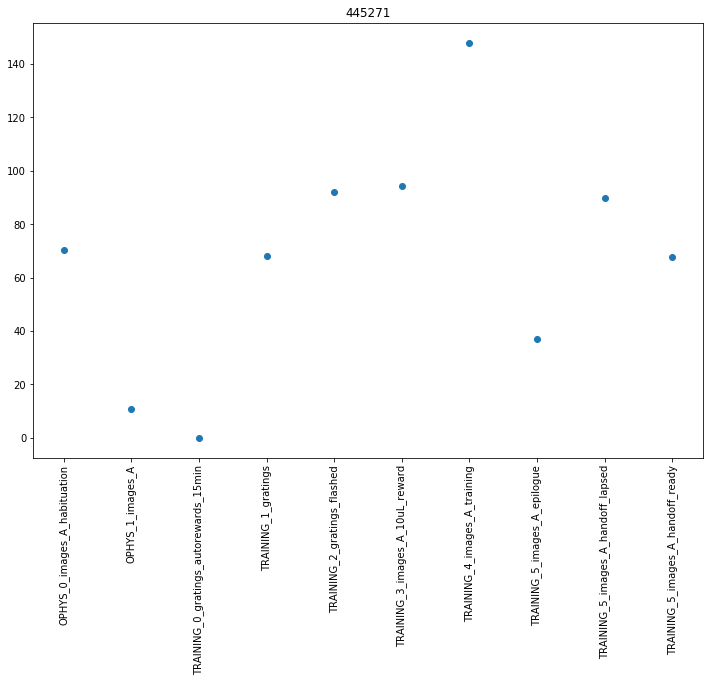

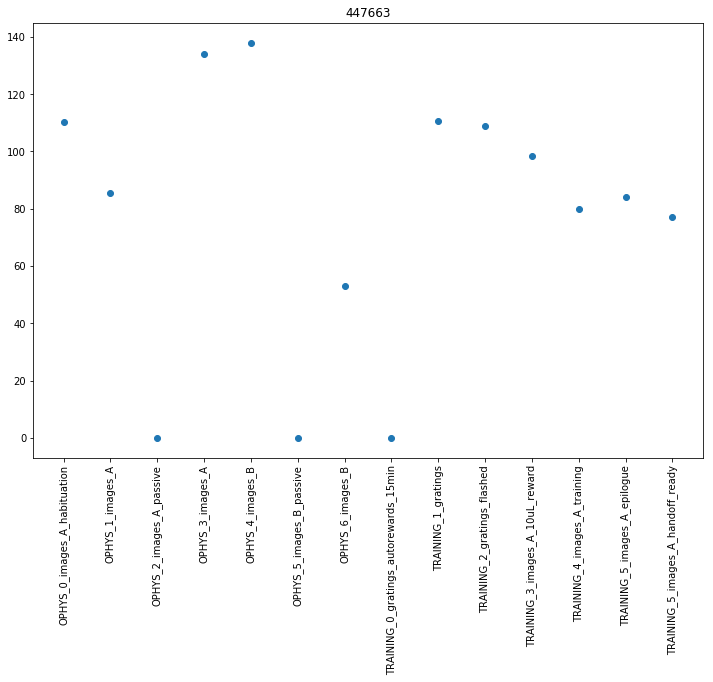

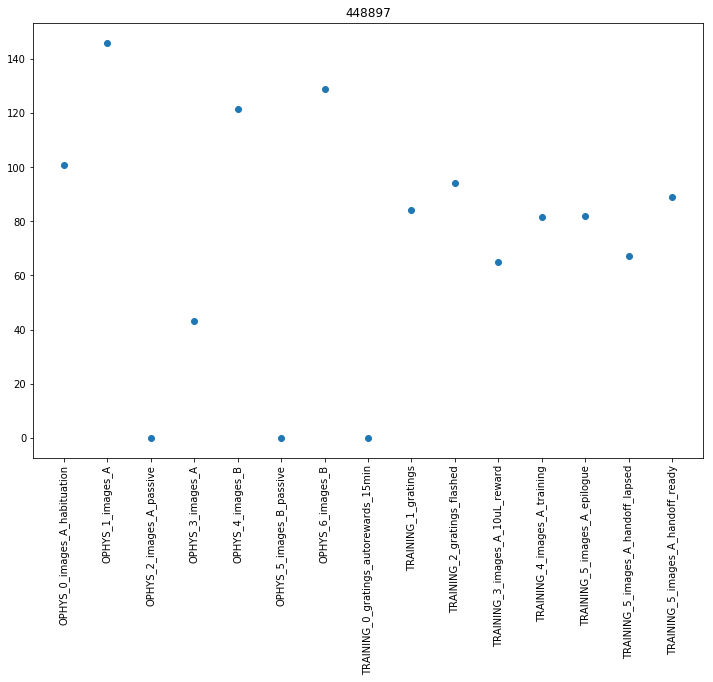

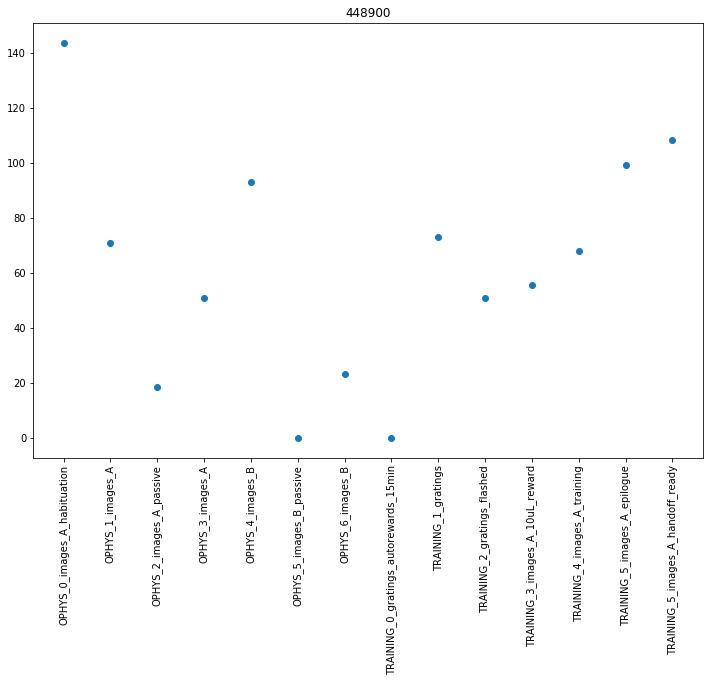

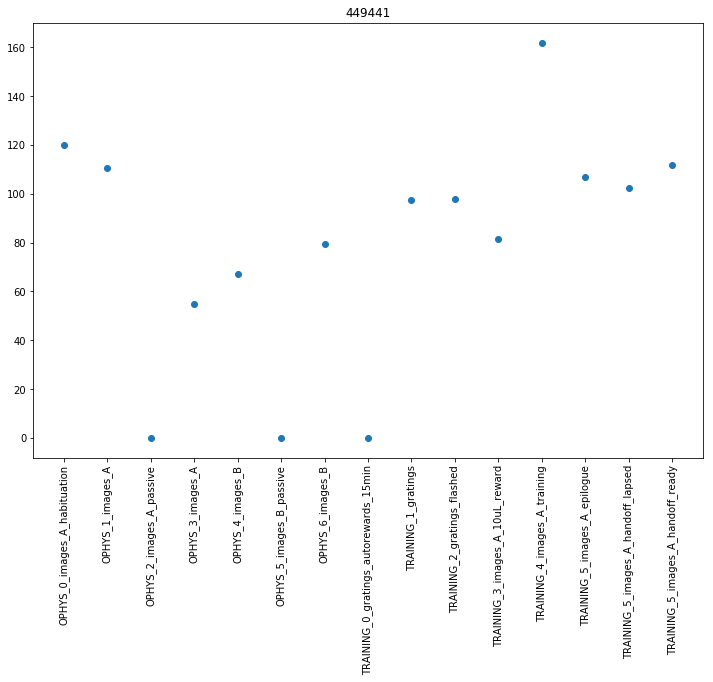

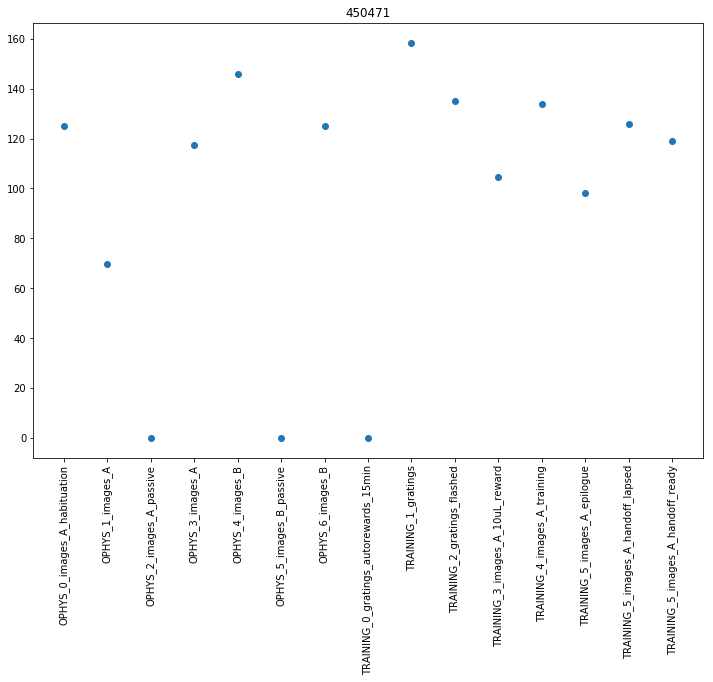

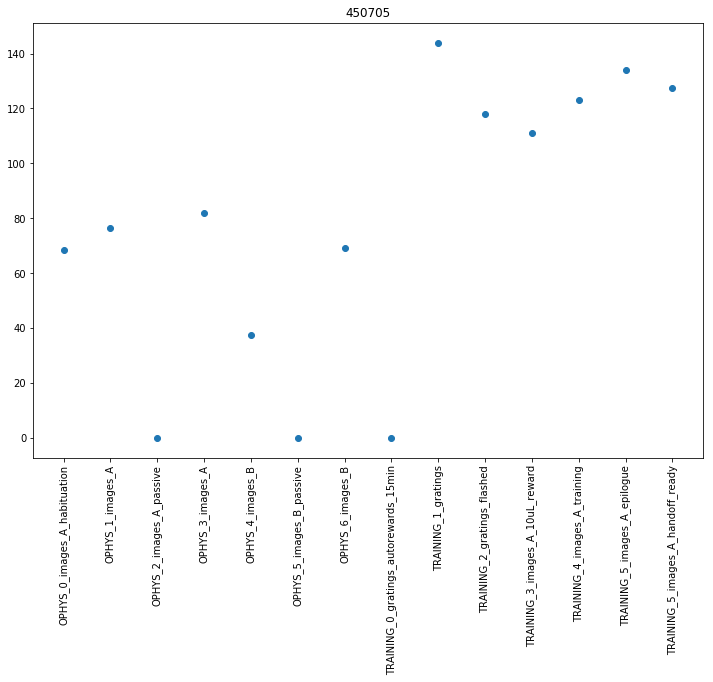

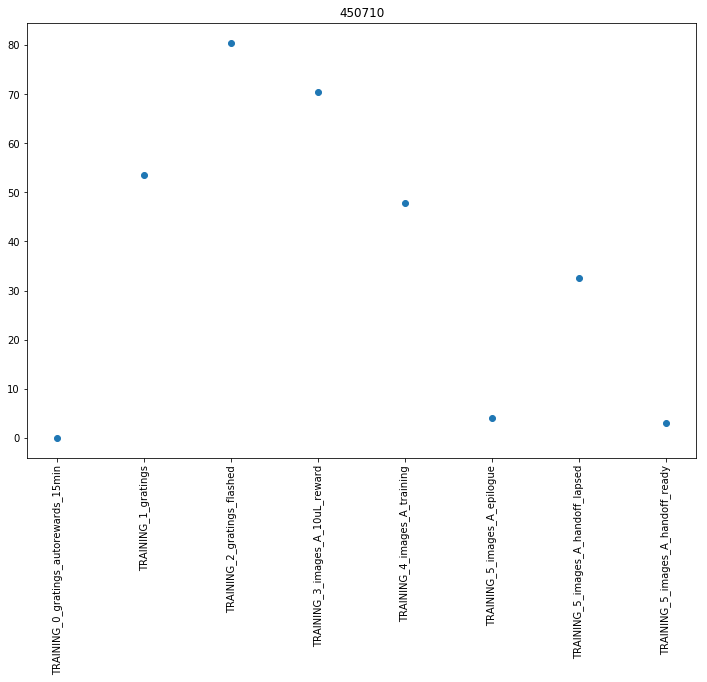

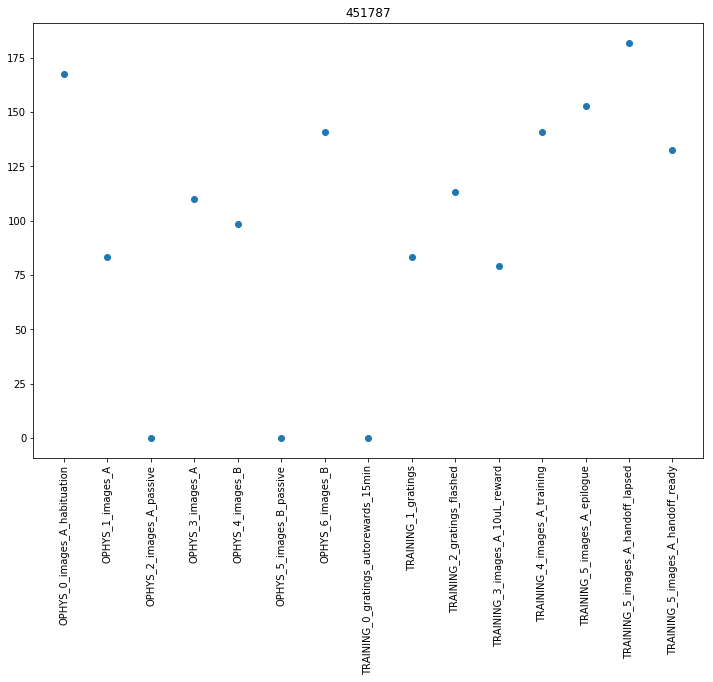

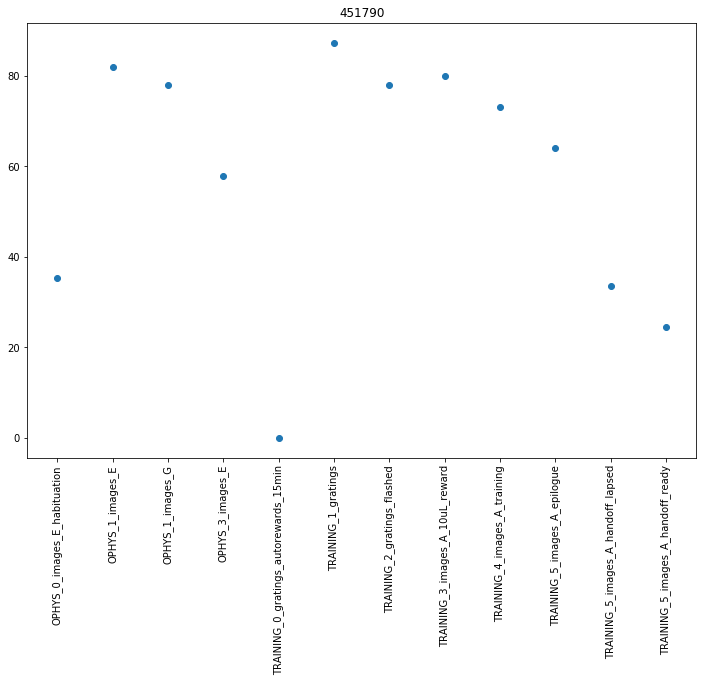

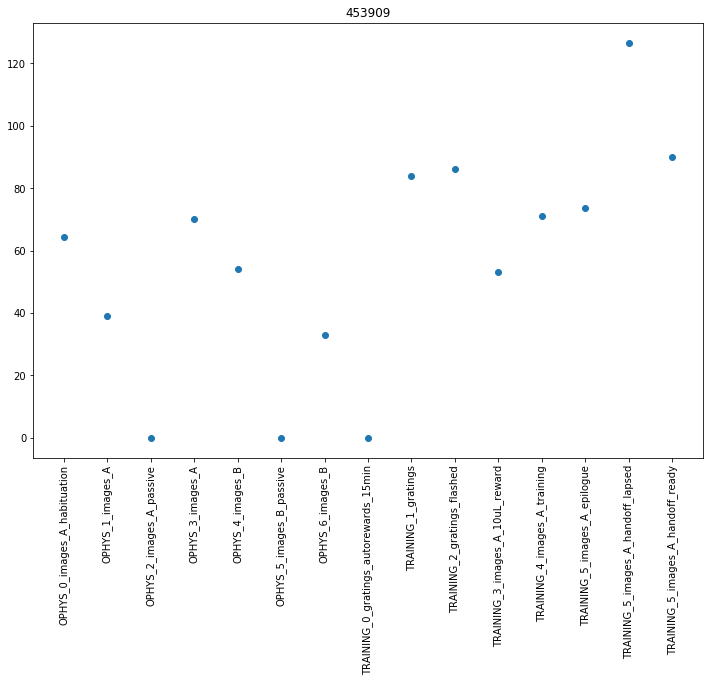

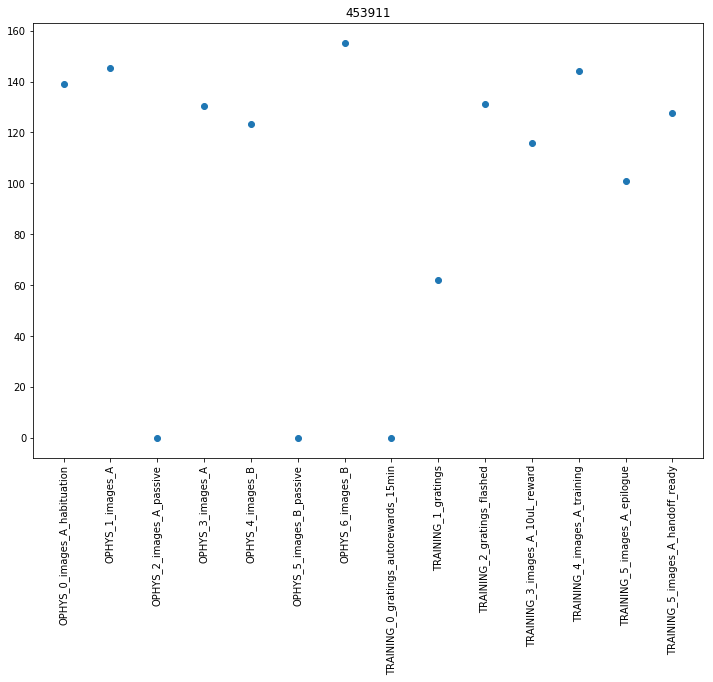

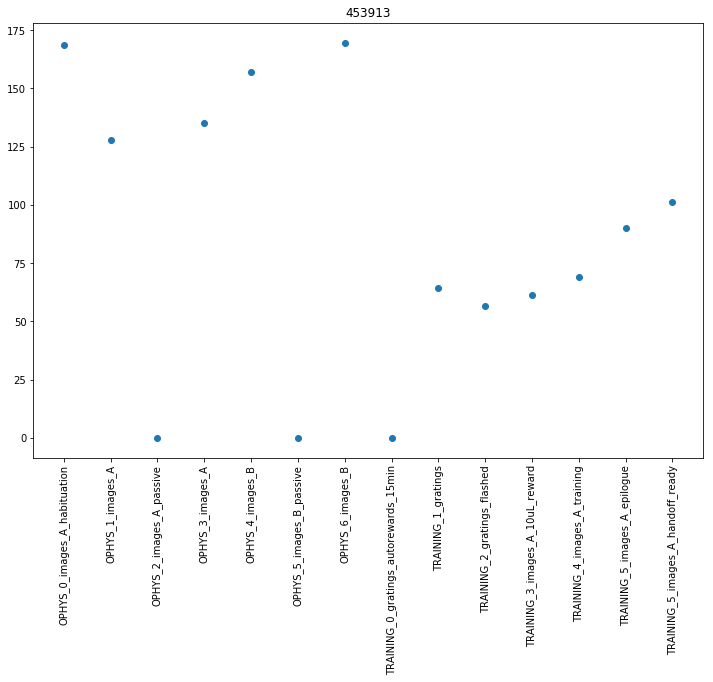

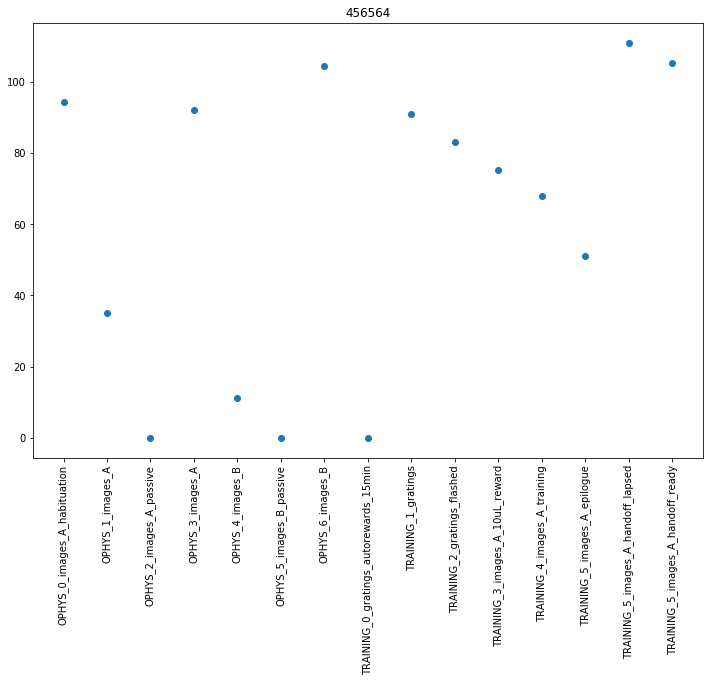

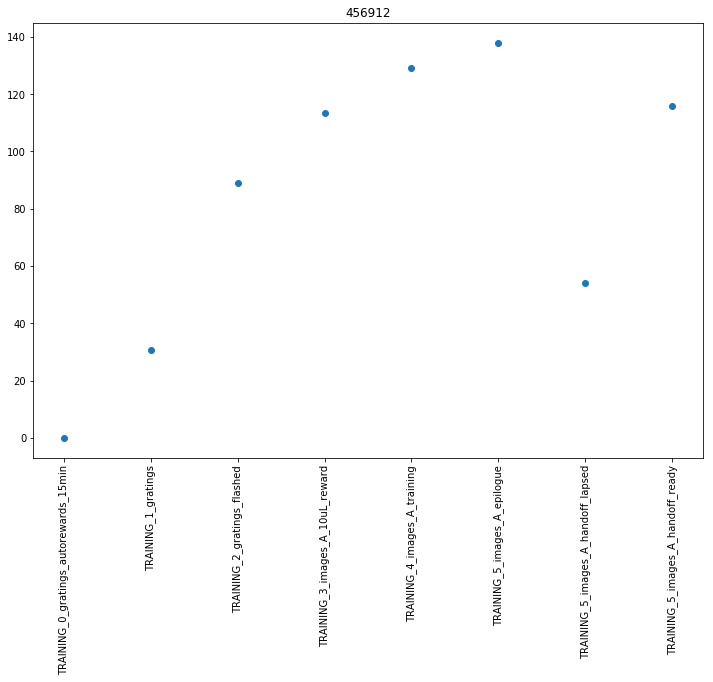

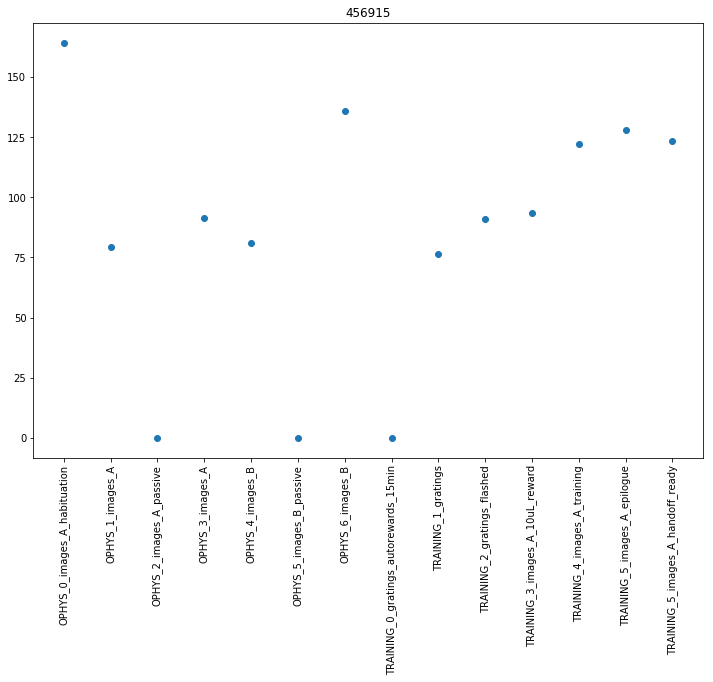

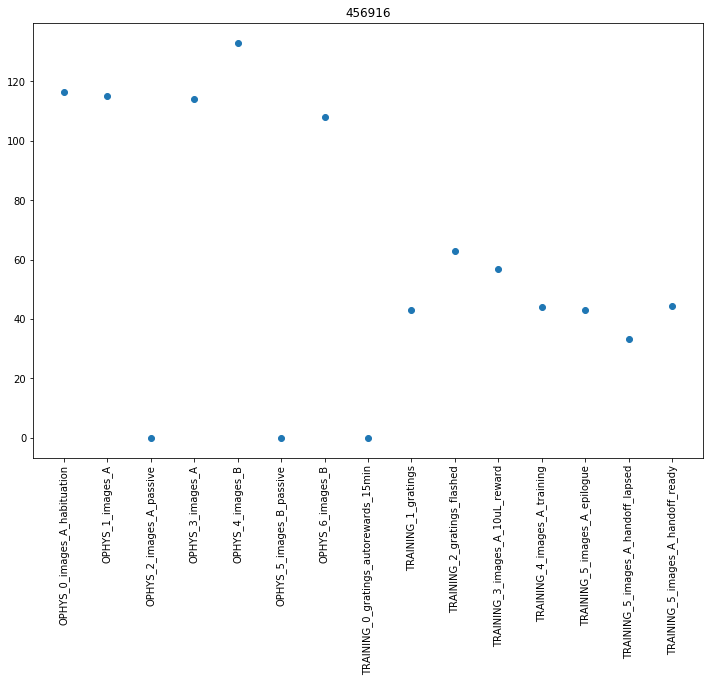

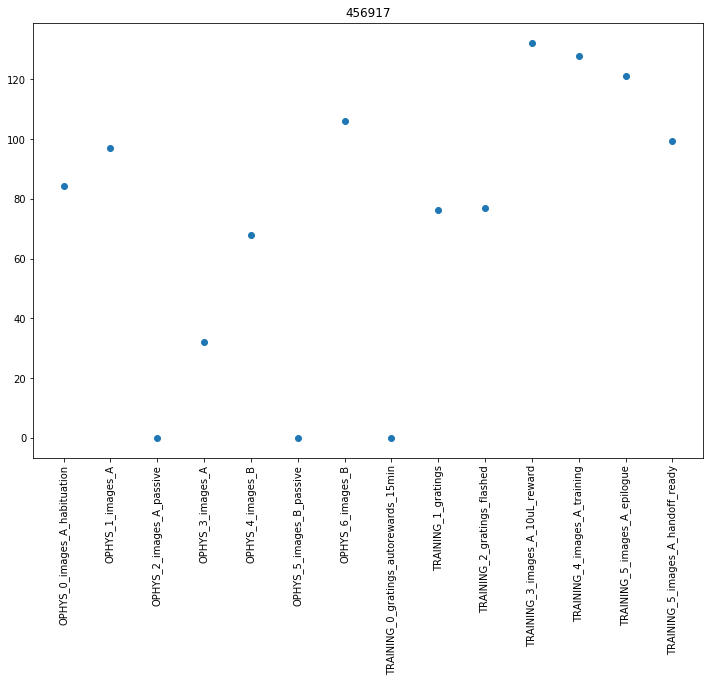

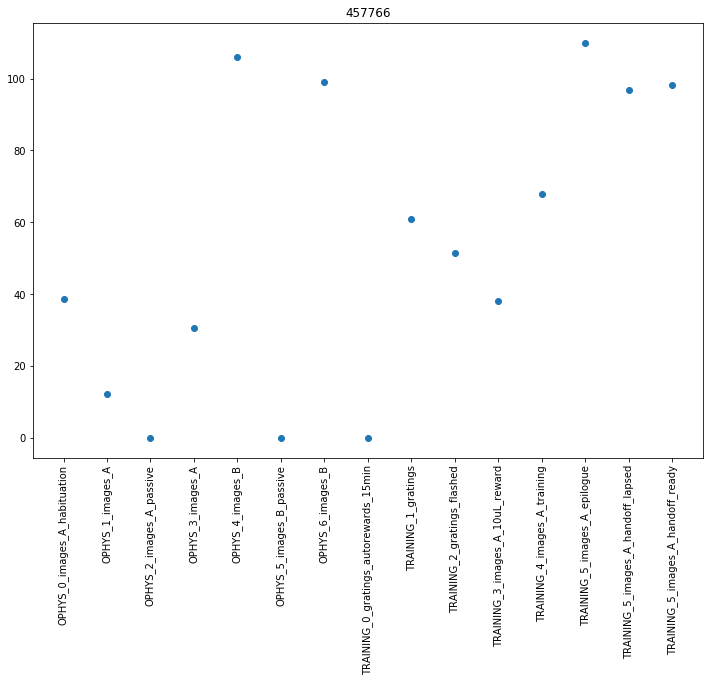

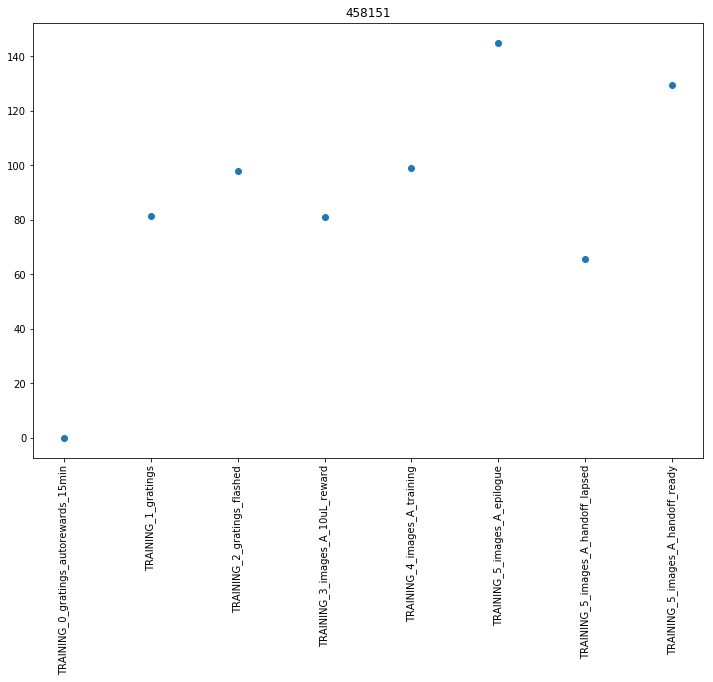

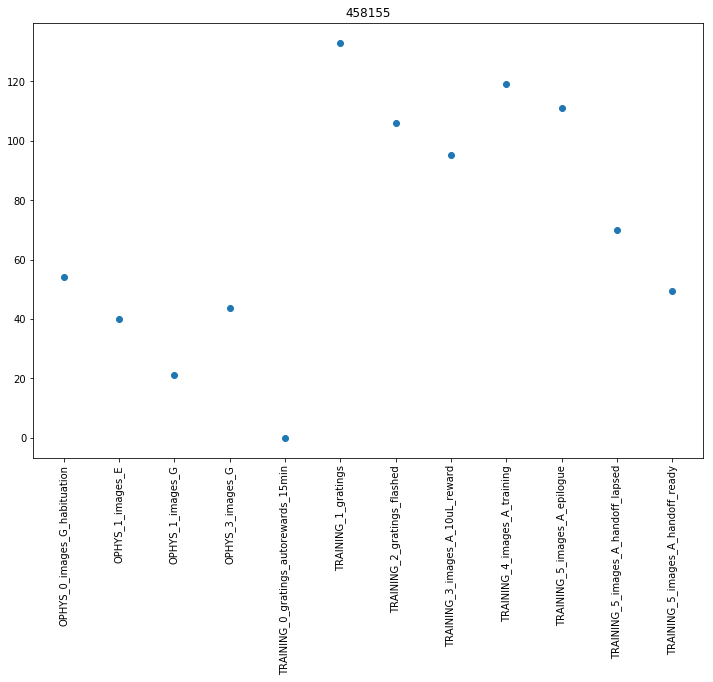

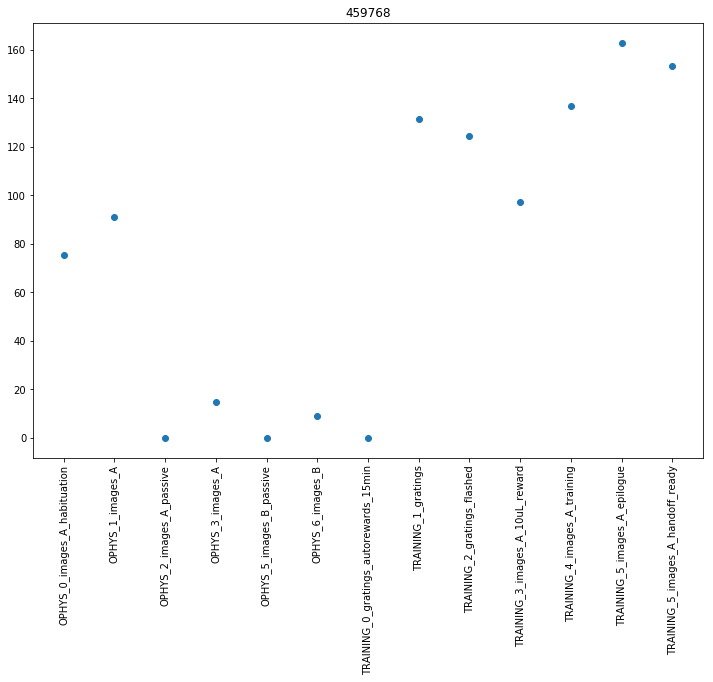

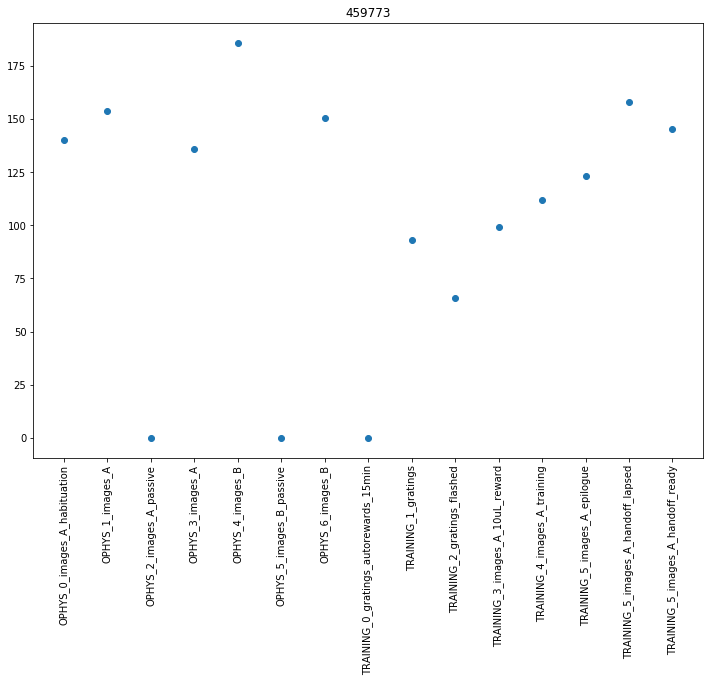

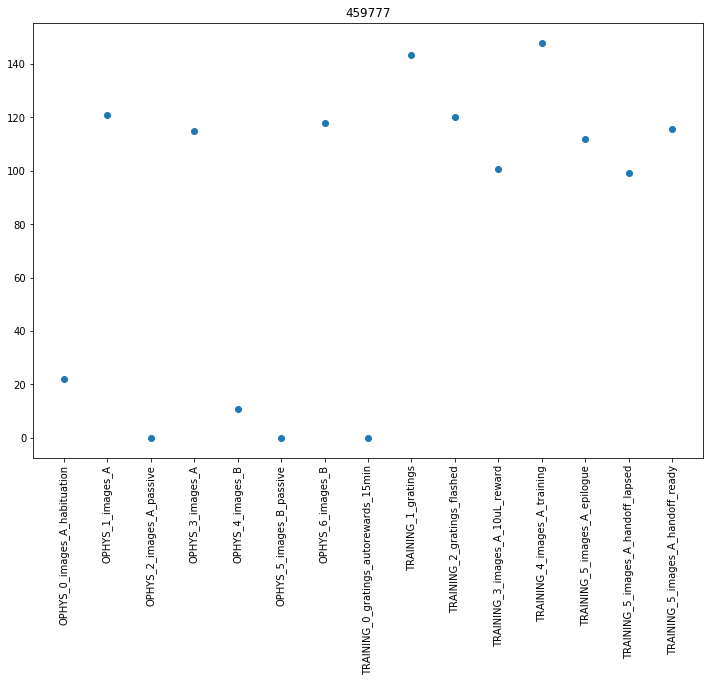

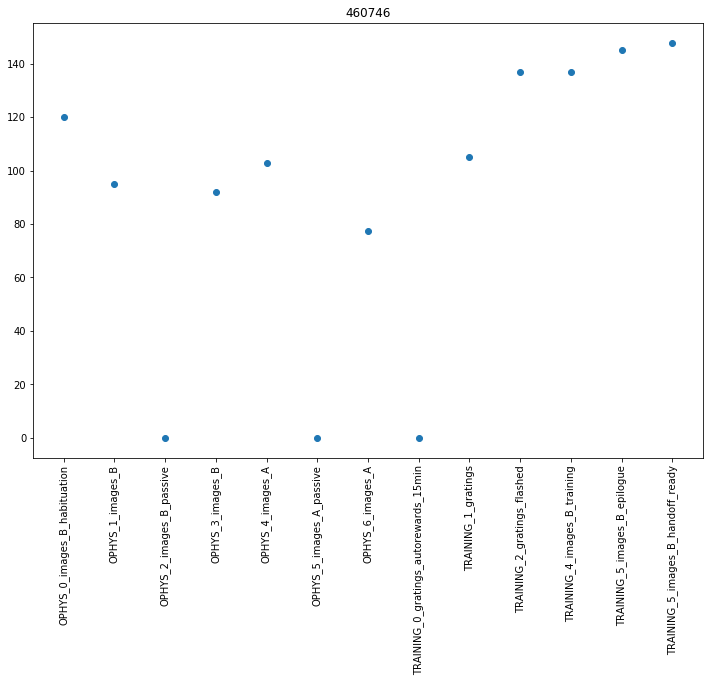

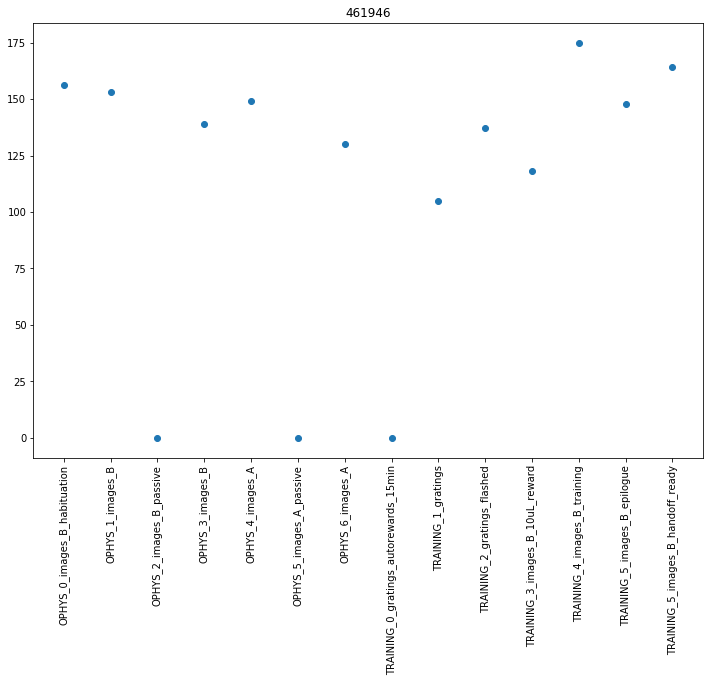

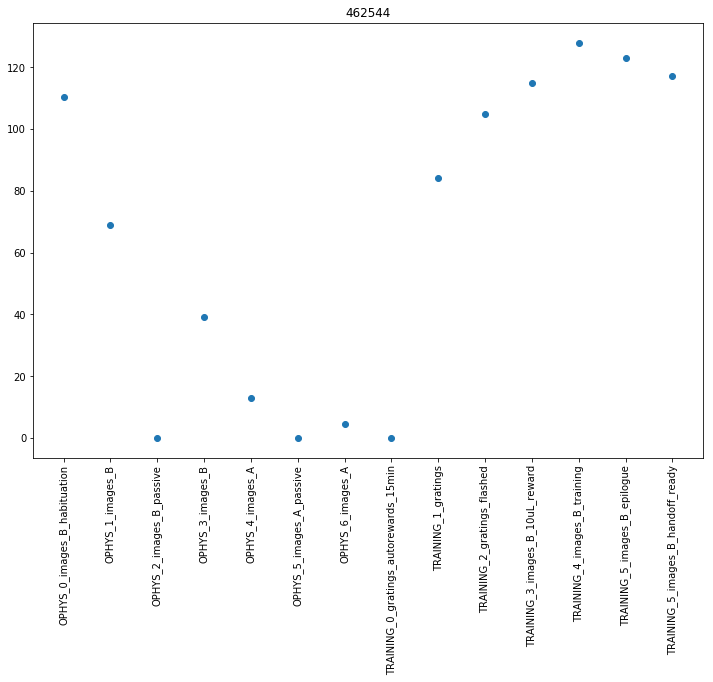

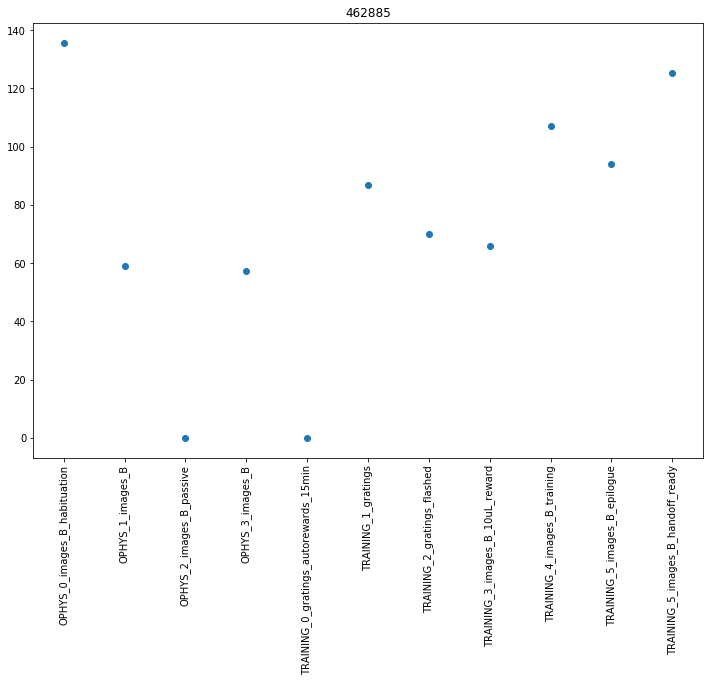

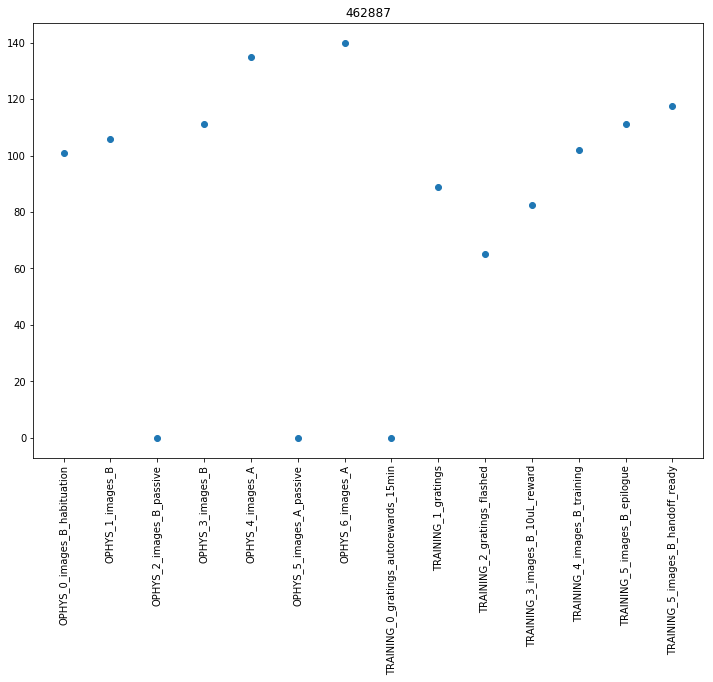

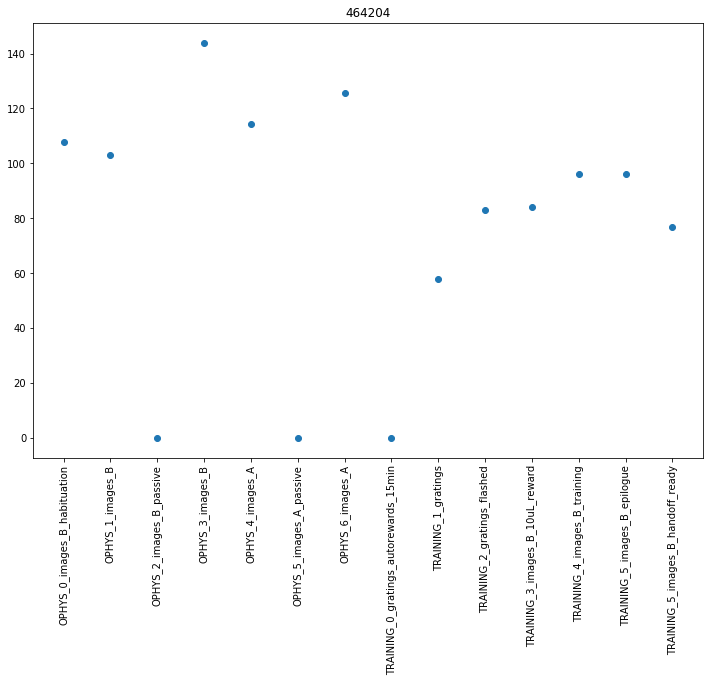

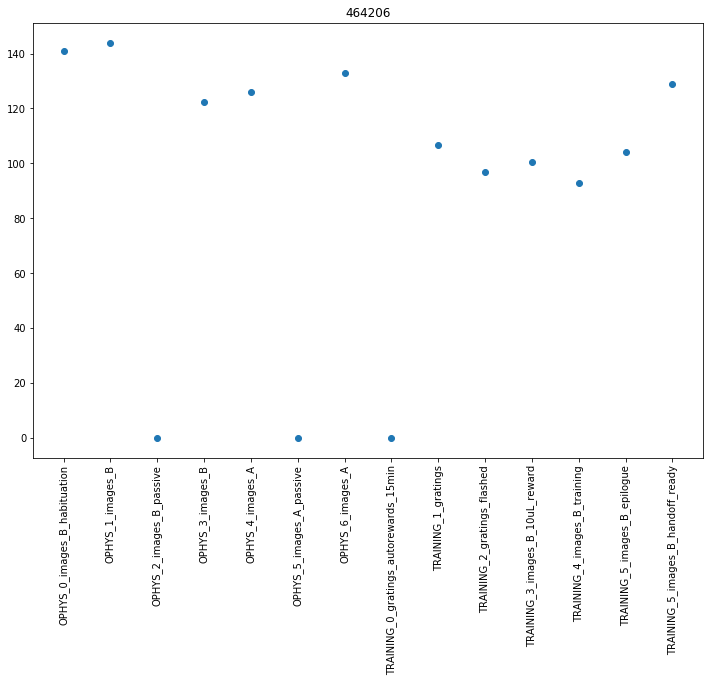

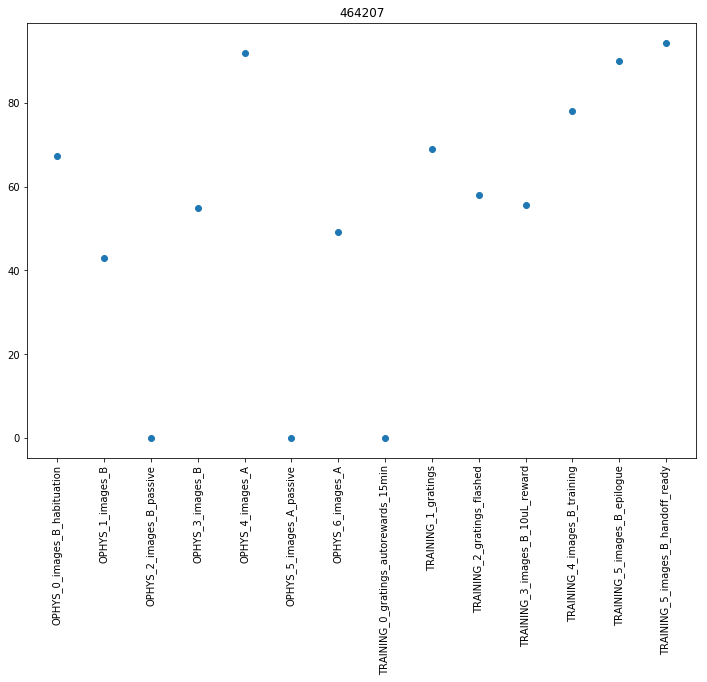

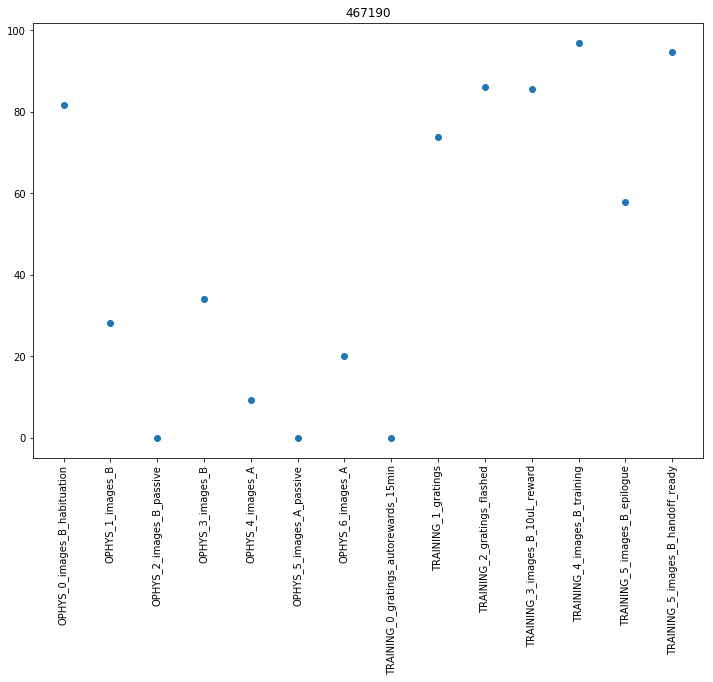

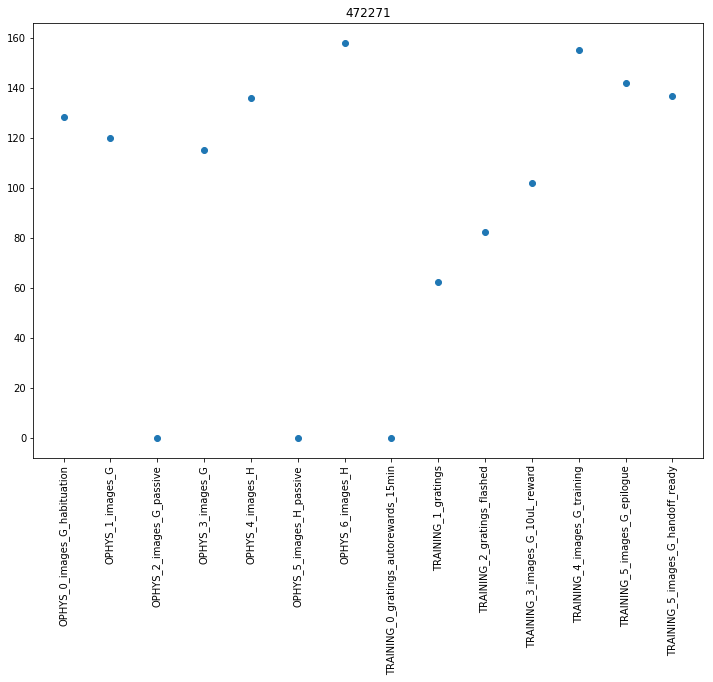

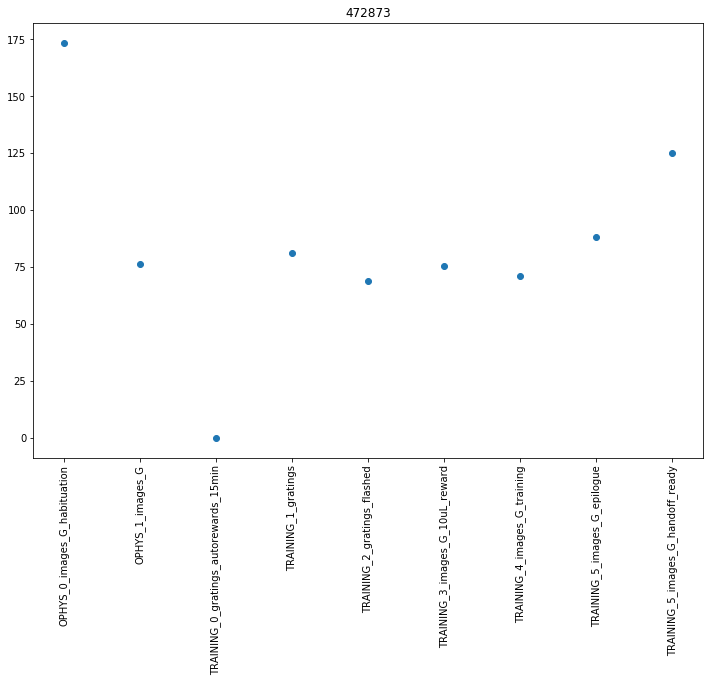

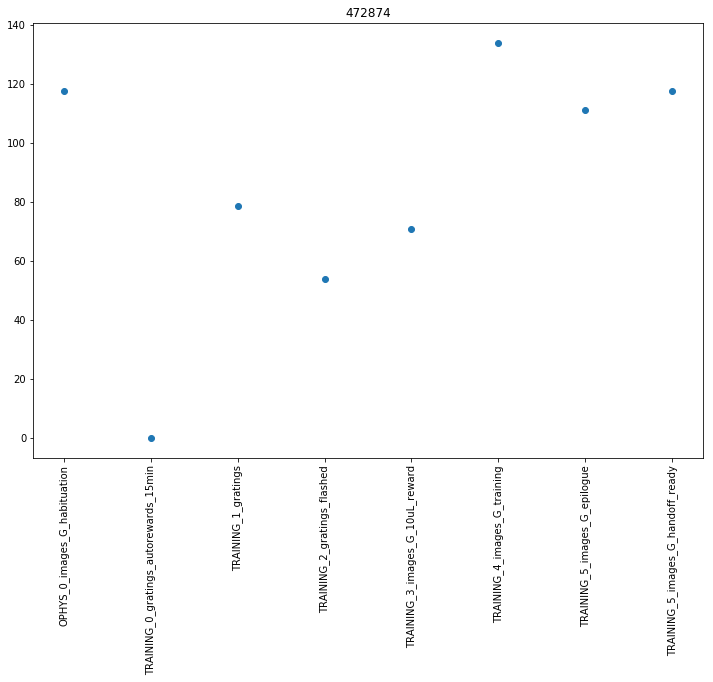

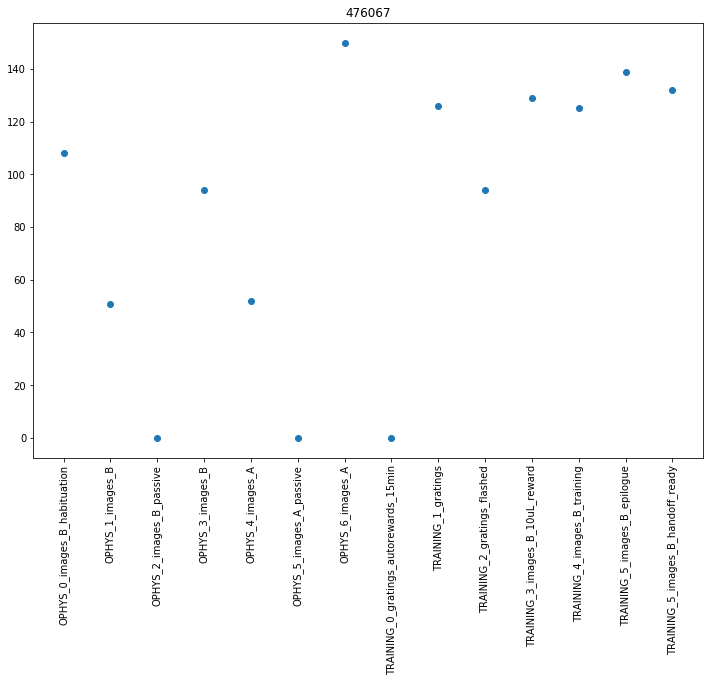

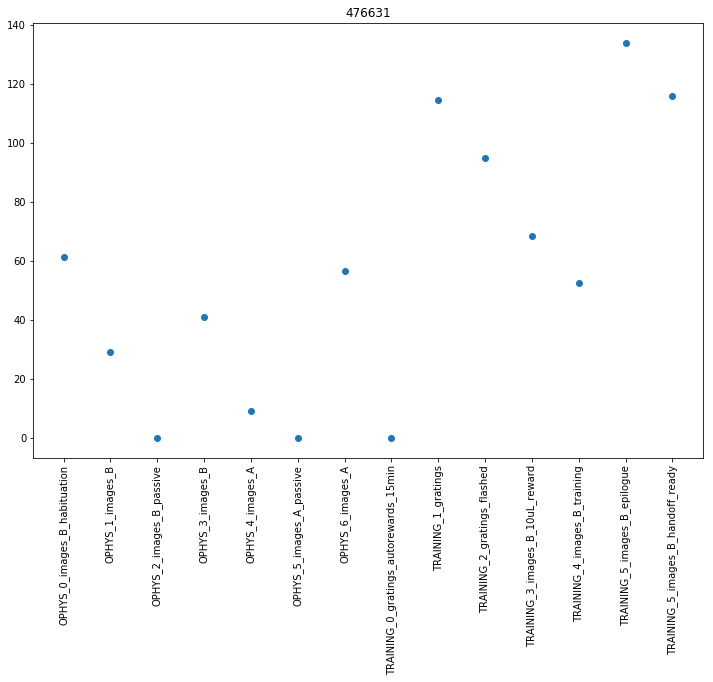

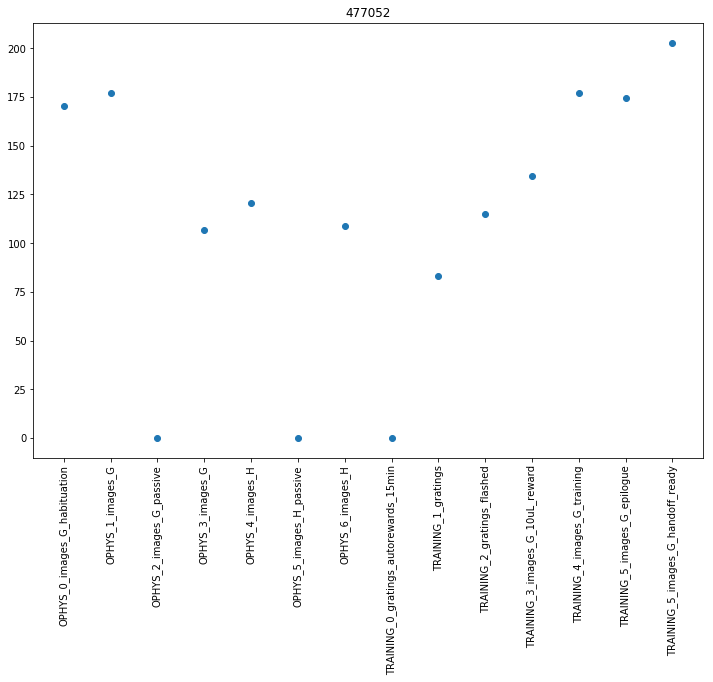

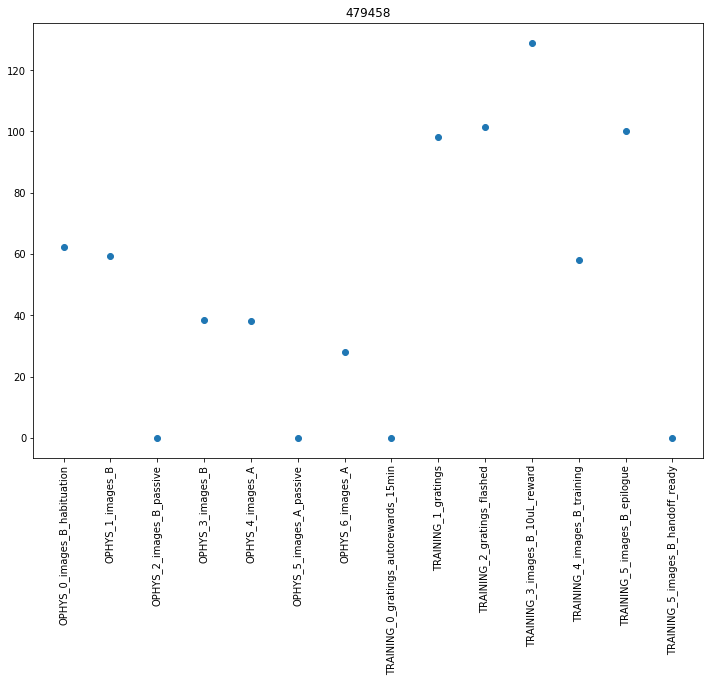

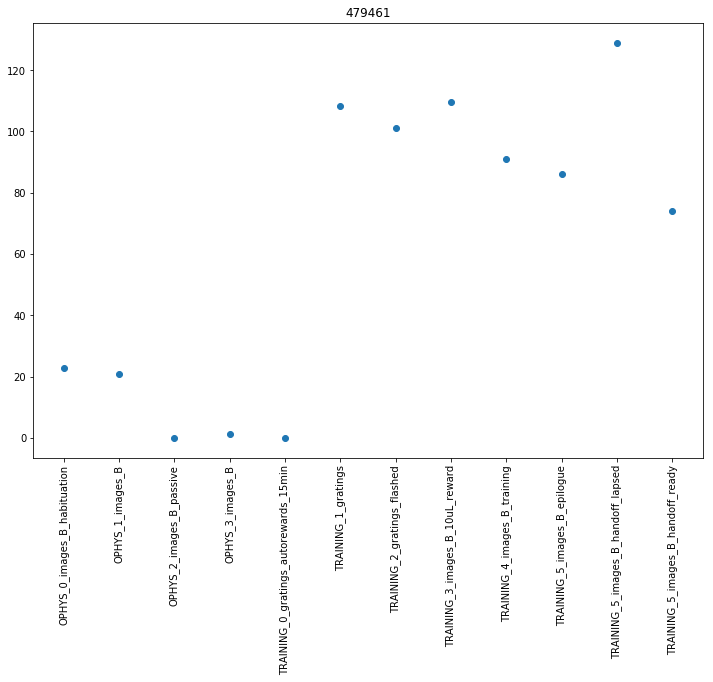

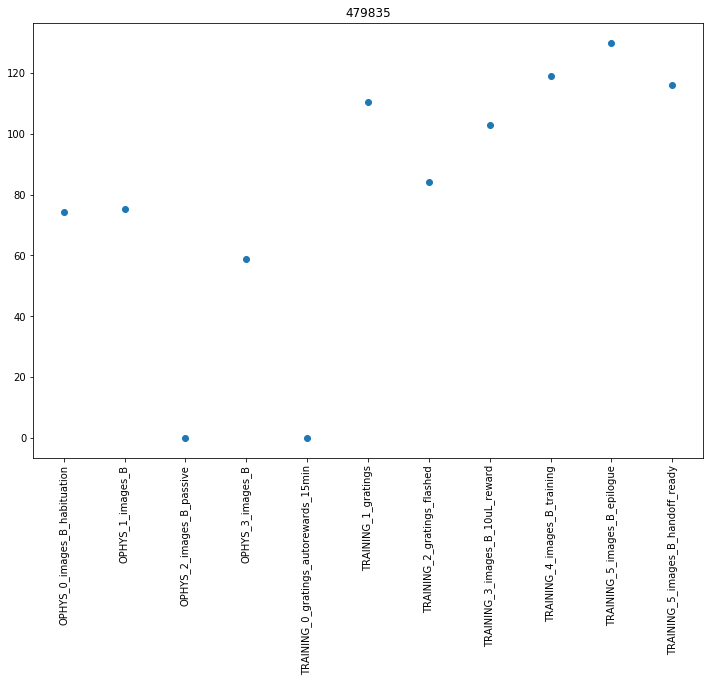

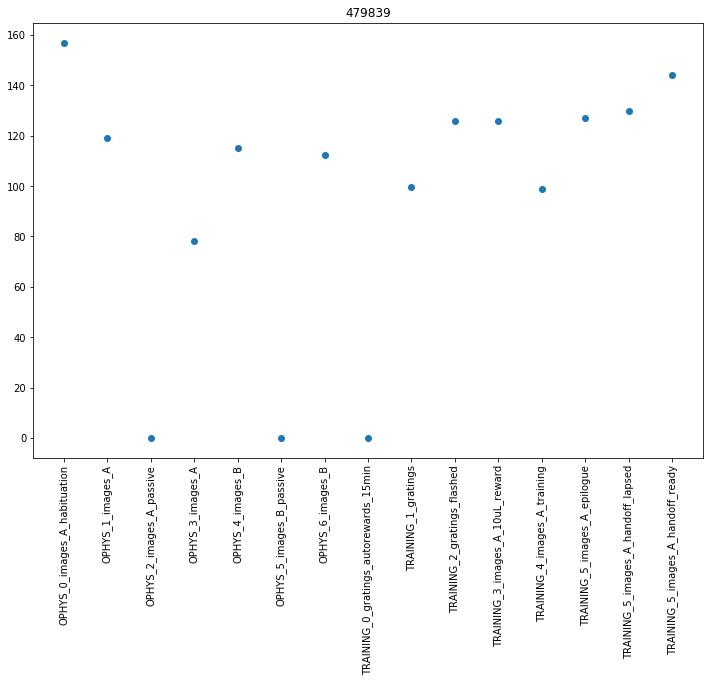

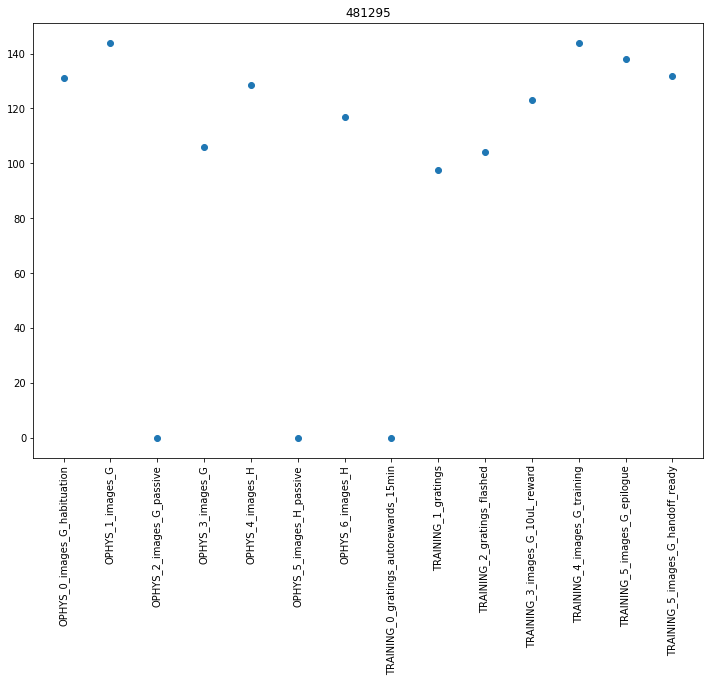

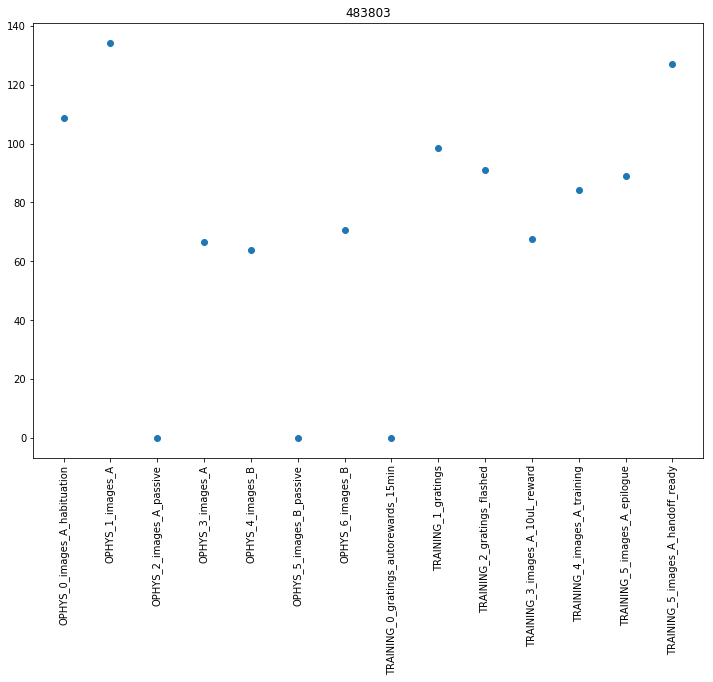

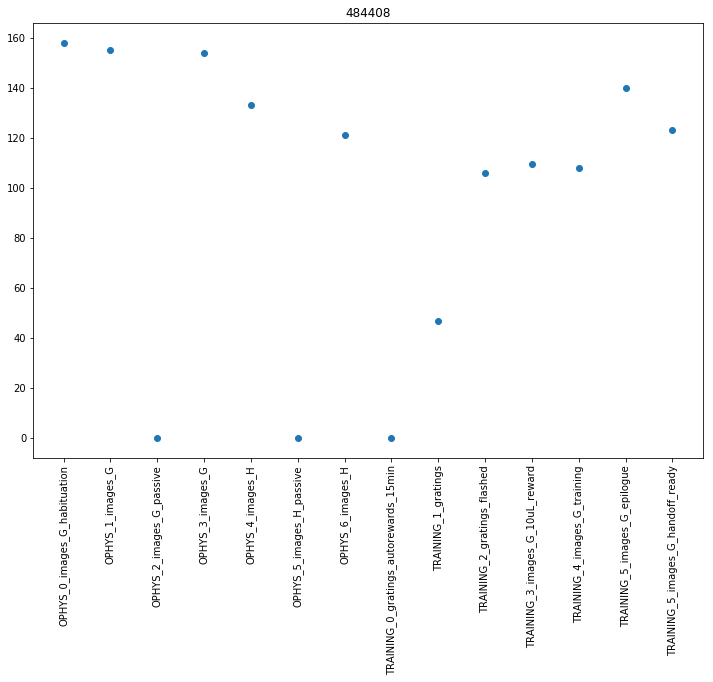

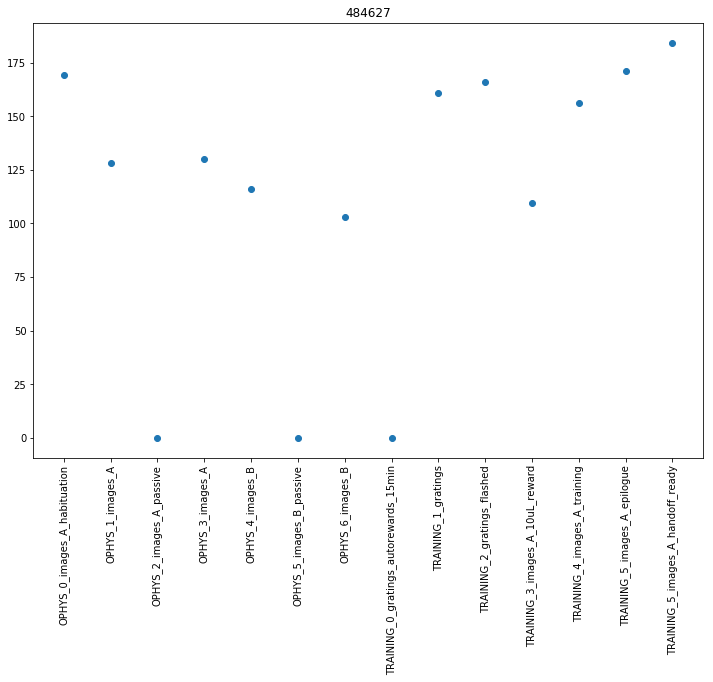

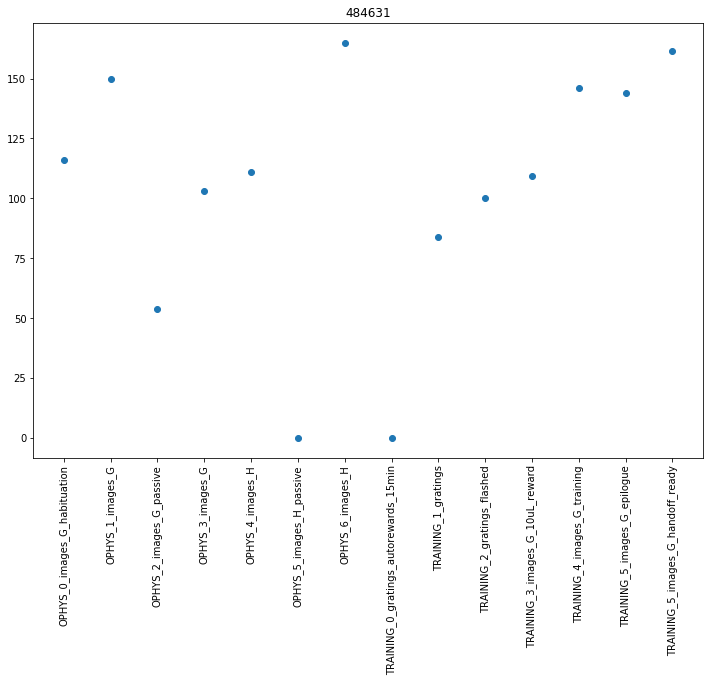

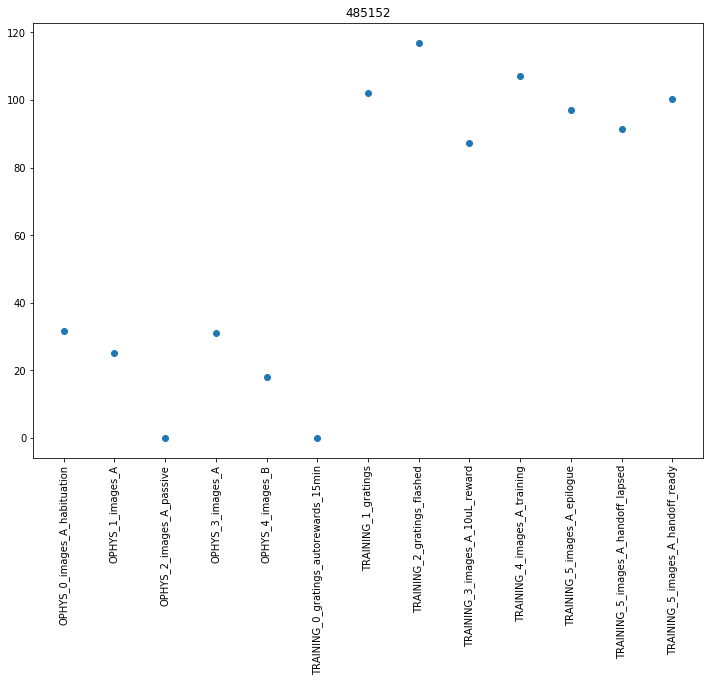

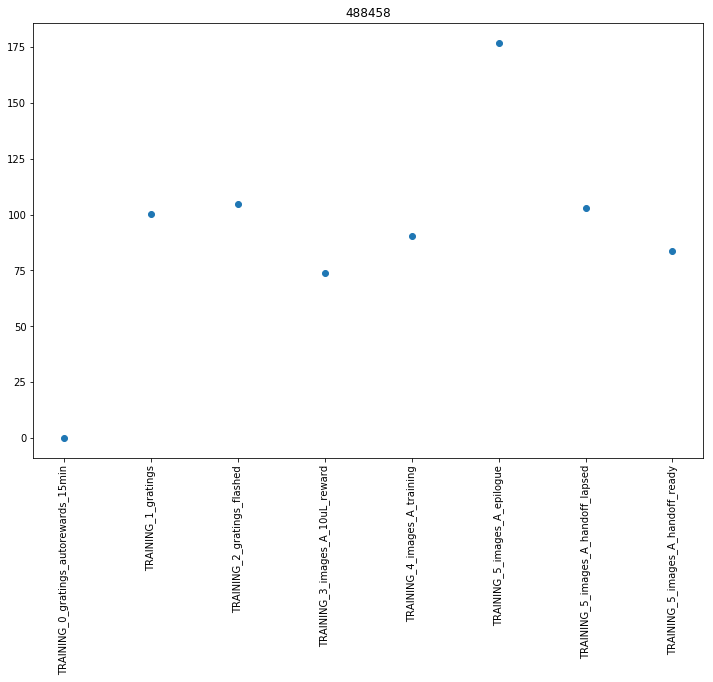

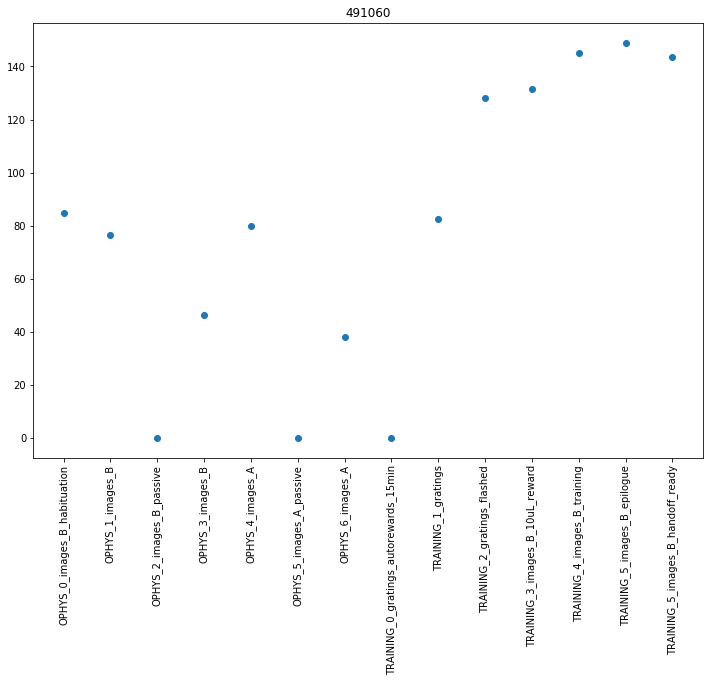

In [94]:
for mid, md in popdf.groupby(level=0):
    ers = md.groupby('stage').mean()['earned_rewards']
    fig, ax = plt.subplots()
    fig.set_size_inches([12,8])
    
    ax.plot(ers, 'o')

    #ax.legend(stages)
    ax.set_title(mid)
    plt.setp(ax.get_xticklabels(), rotation=90)

r value: 0.3415553244953603
p value: 0.009315139165145305


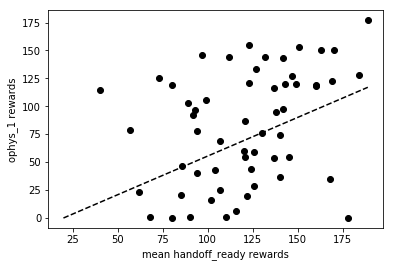

In [145]:
hr = popdf['stage'].str.contains('handoff_ready')
#hr_rewards = popdf.loc[hr]['earned_rewards'].groupby(level=0).mean()
hr_rewards = popdf.loc[hr]['earned_rewards'].groupby(level=0).first()
ophys1 = popdf['stage'].str.contains('OPHYS_1')
ophys_1_rewards = popdf.loc[ophys1]['earned_rewards'].groupby(level=0).first()

ophysmice = popdf['stage'].str.contains('OPHYS_1').groupby(level=0).sum()>0

#clean up by throwing out a couple of outliers
hr_rewards_o = hr_rewards[ophysmice]
hr_rewards_good = hr_rewards_o[hr_rewards_o>30]
ophys_1_rewards_good = ophys_1_rewards[hr_rewards_o>30]

fig,ax = plt.subplots()
ax.plot(hr_rewards_good, ophys_1_rewards_good, 'ko')
ax.set_xlabel('mean handoff_ready rewards')
ax.set_ylabel('ophys_1 rewards')

import scipy.stats
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(hr_rewards_good, ophys_1_rewards_good)
ax.plot([intercept, hr_rewards_good.max()], [0, hr_rewards_good.max()*slope + intercept], 'k--')
print('r value: ' + str(r_value))
print('p value: ' + str(p_value))

r value: -0.08867967529216547
p value: 0.5004452783737914


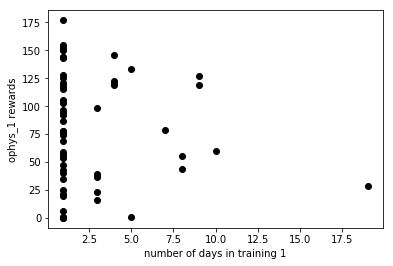

In [194]:
training1 = popdf['stage'].str.contains('TRAINING_4').groupby(level=0).sum()

ophys1 = popdf['stage'].str.contains('OPHYS_1')
ophys_1_rewards = popdf.loc[ophys1]['earned_rewards'].groupby(level=0).first()

ophysmice = popdf['stage'].str.contains('OPHYS_1').groupby(level=0).sum()>0

#clean up by throwing out a couple of outliers
training1_o = training1[ophysmice]

fig,ax = plt.subplots()
ax.plot(training1_o, ophys_1_rewards, 'ko')
ax.set_xlabel('number of days in training 1')
ax.set_ylabel('ophys_1 rewards')

import scipy.stats
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(training1_o, ophys_1_rewards)
#ax.plot([intercept, training1_o.max()], [0, training1_o.max()*slope + intercept], 'k--')
print('r value: ' + str(r_value))
print('p value: ' + str(p_value))

Text(0,0.5,u'ophys_1 rewards')

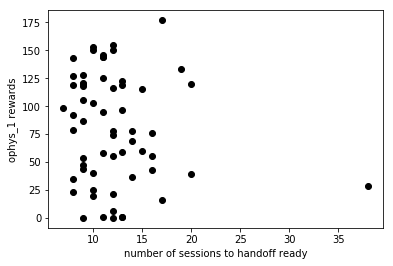

In [246]:
sessionsToHandoffReady = []
ophys_1_rewards = []
mids = []
for mid, md in popdf.groupby(level=0):
    if md['stage'].str.contains('OPHYS_1').sum()>0:
        mids.append(mid)
        sth = len(md) - md.index[md['stage'].str.contains('handoff_ready')].tolist()[-1][1]
        ophysr = md['earned_rewards'].loc[md['stage'].str.contains('OPHYS_1')].iloc[0]
        sessionsToHandoffReady.append(sth)
        ophys_1_rewards.append(ophysr)

fig, ax = plt.subplots()
ax.plot(sessionsToHandoffReady, ophys_1_rewards, 'ko')
ax.set_xlabel('number of sessions to handoff ready')
ax.set_ylabel('ophys_1 rewards')

In [ ]:
num_handoff_sessions = []
handoff_ready_rewards = []
handoff_dprime = []
habituation_rewards = []
ophys_1_rewards = []
ophys_dprime = []
hab_dprime = []
new_criterion = []
mids = []
for mid, md in popdf.groupby(level=0):
    if md['stage'].str.contains('OPHYS_1').sum()>0 and md['stage'].str.contains('TRAINING_5_images_A_handoff_ready').sum()>0:
        mids.append(mid)
        n_hos = md['stage'].str.contains('TRAINING_5').sum()
        ophysr = md['earned_rewards'].loc[md['stage'].str.contains('OPHYS_1')].iloc[-1]
        o_dprime = md['engaged_dprime'].loc[md['stage'].str.contains('OPHYS_1')].iloc[-1]
        hab_r = md.loc[md['stage'].str.contains('habituation')].mean()['earned_rewards']
        hab_dp = md.loc[md['stage'].str.contains('habituation')].mean()['engaged_dprime']
        hdr_r = md['earned_rewards'].loc[md['stage'].str.contains('handoff')].iloc[:3].min()
        hdr_mean = md['earned_rewards'].loc[md['stage'].str.contains('handoff')].iloc[:3].mean()
        hdr_dprime = md['engaged_dprime'].loc[md['stage'].str.contains('handoff')].iloc[:3].mean()
        if hdr_r>120:# and hdr_dprime>1.4:
#         if hdr_dprime>1.4:
            new_criterion.append(True)
        else:
            new_criterion.append(False)
        ophys_1_rewards.append(ophysr)
        habituation_rewards.append(hab_r)
        handoff_ready_rewards.append(hdr_mean)
        handoff_dprime.append(hdr_dprime)
        ophys_dprime.append(o_dprime)
        hab_dprime.append(hab_dp)
        num_handoff_sessions.append(n_hos)
        
handoff_ready_rewards = np.array(handoff_ready_rewards)
handoff_dprime = np.array(handoff_dprime)
handoff_dprime[np.isinf(handoff_dprime)] = 2
habituation_rewards = np.array(habituation_rewards)
ophys_1_rewards = np.array(ophys_1_rewards)
ophys_dprime = np.array(ophys_dprime)
new_criterion = np.array(new_criterion)
hab_dprime = np.array(hab_dprime)
hab_dprime[np.isinf(hab_dprime)] = 2
num_handoff_sessions = np.array(num_handoff_sessions)

fig, ax = plt.subplots(1,2)
fig.set_size_inches([16, 8])
ax[0].plot(handoff_ready_rewards, habituation_rewards, 'ko')
ax[0].plot(handoff_ready_rewards[new_criterion], habituation_rewards[new_criterion], 'ro')
ax[0].set_xlabel('handoff rewards')
ax[0].set_ylabel('habituation rewards')

ax[1].plot(np.log(num_handoff_sessions), habituation_rewards, 'ko')
ax[1].plot(np.log(num_handoff_sessions[new_criterion]), habituation_rewards[new_criterion], 'ro')
ax[1].set_xlabel('handoff dprime')
ax[1].set_ylabel('habituation rewards')

print(np.sum(new_criterion))
print(len(new_criterion))
print(np.mean(habituation_rewards[new_criterion]))
print(np.mean(habituation_rewards[~new_criterion]))
print(np.mean(hab_dprime[new_criterion & ~(np.isinf(hab_dprime))]))
print(np.mean(hab_dprime[~new_criterion & ~(np.isinf(hab_dprime))]))

r value: 0.6294866122903763
p value: 7.14053693216354e-08


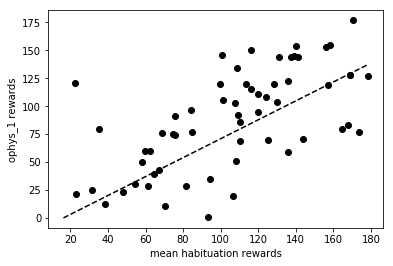

In [208]:
training1_days = popdf['stage'].str.contains('habituation')
t1_rewards = popdf.loc[training1_days]['earned_rewards'].groupby(level=0).mean()
#hr_rewards = popdf.loc[hr]['earned_rewards'].groupby(level=0).first()
ophys1 = popdf['stage'].str.contains('OPHYS_1')
ophys_1_rewards = popdf.loc[ophys1]['earned_rewards'].groupby(level=0).mean()

ophysmice = popdf['stage'].str.contains('OPHYS_1').groupby(level=0).sum()>0

t1_rewards = t1_rewards[ophysmice]

fig,ax = plt.subplots()
ax.plot(t1_rewards, ophys_1_rewards, 'ko')
ax.set_xlabel('mean habituation rewards')
ax.set_ylabel('ophys_1 rewards')

import scipy.stats
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(t1_rewards, ophys_1_rewards)
ax.plot([intercept, t1_rewards.max()], [0, t1_rewards.max()*slope + intercept], 'k--')
print('r value: ' + str(r_value))
print('p value: ' + str(p_value))

In [197]:
sum(ophysmice)

60

r value: 0.2257834374846298
p value: 0.08281219020039643


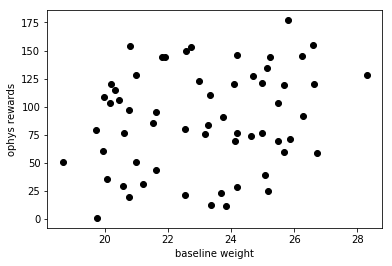

In [238]:
fig, ax = plt.subplots()
baseline_weights = popdf['baseline_weight'].groupby(level=0).mean()

ophys1 = popdf['stage'].str.contains('OPHYS_1')
ophys_1_rewards = popdf.loc[ophys1]['earned_rewards'].groupby(level=0).mean()
ophysmice = popdf['stage'].str.contains('OPHYS_1').groupby(level=0).sum()>0

ax.plot(baseline_weights[ophysmice], ophys_1_rewards, 'ko')
ax.set_xlabel('baseline weight')
ax.set_ylabel('ophys rewards')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(baseline_weights[ophysmice], ophys_1_rewards)
#ax.plot([intercept, baseline_weights[ophysmice].max()], [0, baseline_weights[ophysmice].max()*slope + intercept], 'k--')
print('r value: ' + str(r_value))
print('p value: ' + str(p_value))

r value: 0.3116663295310597
p value: 0.06836765540365744


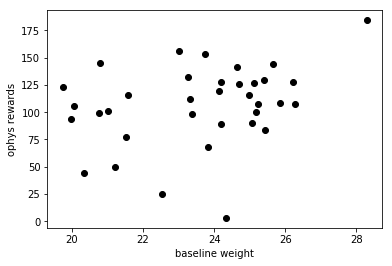

In [390]:
fig, ax = plt.subplots()
handoffready = popdf['stage'].str.contains('TRAINING_5_images_A_handoff_ready')
hdr = popdf.loc[handoffready]

baseline_weights = hdr['baseline_weight'].groupby(level=0).mean()
rewards = hdr['earned_rewards'].groupby(level=0).mean()


ax.plot(baseline_weights, rewards, 'ko')
ax.set_xlabel('baseline weight')
ax.set_ylabel('ophys rewards')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(baseline_weights, rewards)
#ax.plot([intercept, baseline_weights[ophysmice].max()], [0, baseline_weights[ophysmice].max()*slope + intercept], 'k--')
print('r value: ' + str(r_value))
print('p value: ' + str(p_value))

r value: -0.07539583604214246
p value: 0.6668594960526966


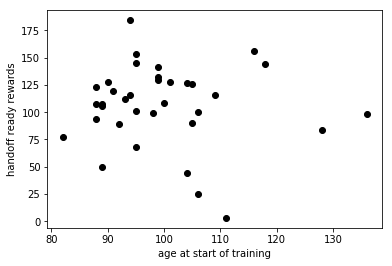

In [389]:
fig, ax = plt.subplots()
handoffready = popdf['stage'].str.contains('TRAINING_5_images_A_handoff_ready')
hdr = popdf.loc[handoffready]

age = hdr['age'].groupby(level=0).min()
rewards = hdr['earned_rewards'].groupby(level=0).mean()

ax.plot(age, rewards, 'ko')
ax.set_xlabel('age at start of training')
ax.set_ylabel('handoff ready rewards')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(age, rewards)
#ax.plot([intercept, baseline_weights[ophysmice].max()], [0, baseline_weights[ophysmice].max()*slope + intercept], 'k--')
print('r value: ' + str(r_value))
print('p value: ' + str(p_value))

r value: 0.5588855612075619
p value: 1.6109033885980162e-32
slope: 0.5538513969594727
intercept: 53.001581906834545


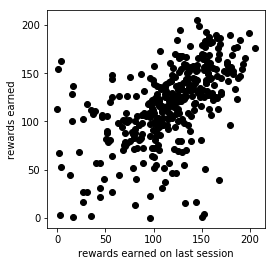

In [387]:
session_rewards = []
last_rewards = []
mids = []
for mid, md in popdf.groupby(level=0):
    active_images = md['stage'].str.contains('TRAINING_5_images_A_handoff_ready') & ~md['stage'].str.contains('OPHYS')
    aid = md.loc[active_images]
    r = aid['earned_rewards']
    lr = aid['earned_rewards'][1:]
    
    session_rewards.extend(r[:-1])
    last_rewards.extend(lr)

fig, ax = plt.subplots()
ax.plot(last_rewards, session_rewards, 'ko')
ax.set_xlabel('rewards earned on last session')
ax.set_ylabel('rewards earned')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(last_rewards, session_rewards)
#ax.plot([intercept, baseline_weights[ophysmice].max()], [0, baseline_weights[ophysmice].max()*slope + intercept], 'k--')
ax.set_aspect('equal')
print('r value: ' + str(r_value))
print('p value: ' + str(p_value))
print('slope: ' + str(slope))
print('intercept: ' + str(intercept))

In [240]:
aid[['earned_rewards', 'stage', 'age']]

earned_rewards                              stage  age
491060 14             160  TRAINING_5_images_B_handoff_ready  104
       15             153  TRAINING_5_images_B_handoff_ready  103
       16             118  TRAINING_5_images_B_handoff_ready  102
       17             149       TRAINING_5_images_B_epilogue   99
       18             145       TRAINING_4_images_B_training   98
       19             139    TRAINING_3_images_B_10uL_reward   97
       20             140    TRAINING_3_images_B_10uL_reward   96
       21             115    TRAINING_3_images_B_10uL_reward   95

[Text(0,0,u'Mon'),
 Text(0,0,u'Tues'),
 Text(0,0,u'Wed'),
 Text(0,0,u'Thurs'),
 Text(0,0,u'Fri')]

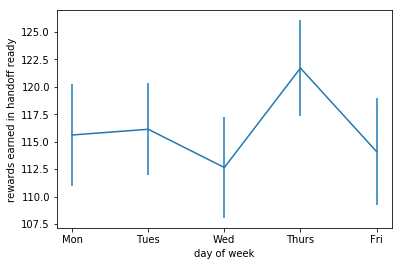

In [386]:
handoffready = popdf['stage'].str.contains('TRAINING_5_images_A_handoff_ready')
hrdf = popdf.loc[handoffready]
fig, ax = plt.subplots()
#ax.plot(hrdf.groupby(by='session_day_of_week').mean()['earned_rewards'])
ax.errorbar(np.arange(5), hrdf.groupby(by='session_day_of_week').mean()['earned_rewards'], yerr=hrdf.groupby(by='session_day_of_week').sem()['earned_rewards'])
ax.set_xlabel('day of week')
ax.set_ylabel('rewards earned in handoff ready')

ax.set_xticks(np.arange(5))
ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri'])

rig
B1    33
B2    19
B3    15
B4    24
B5    23
B6     3
D1    30
D2    19
D4     8
D5    36
D6    13
F1    10
F2     9
F3     5
F4    27
F5     7
F6    35
G1    29
G2    13
G3     8
G4    20
G5     4
G6    24
Name: id, dtype: int64

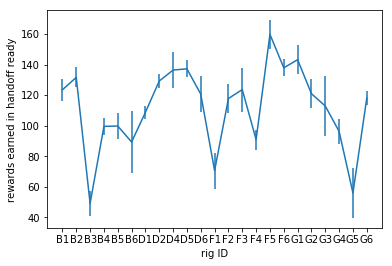

In [369]:
handoffready = popdf['stage'].str.contains('TRAINING_5_images_A_handoff_ready')
hrdf = popdf.loc[handoffready]

rig_rewards = hrdf.groupby(by='rig').mean()['earned_rewards']
rig_dprime = hrdf.groupby(by='rig').mean()['engaged_dprime']

rigs = hrdf.groupby(by='rig').mean().index.to_list()
fig, ax = plt.subplots()
#ax.plot(hrdf.groupby(by='session_day_of_week').mean()['earned_rewards'])
ax.errorbar(np.arange(len(rig_rewards)), rig_rewards, yerr=hrdf.groupby(by='rig').sem()['earned_rewards'])
ax.set_xlabel('rig ID')
ax.set_ylabel('rewards earned in handoff ready')

ax.set_xticks(np.arange(len(rigs)))
ax.set_xticklabels(rigs)

hrdf.groupby('rig')['id'].count()

c:\users\svc_ccg\appdata\local\continuum\anaconda3\envs\lims\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


rewards
trainer               
andyc               71
chelsean            65
jackies             24
katn                39
nicoleha           117
ruweida.ahmed       47
sophiel             51

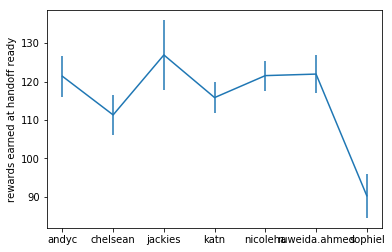

In [383]:
hr = popdf['stage'].str.contains('TRAINING_5_images_A_handoff_ready')
# hr = popdf['stage'].str.contains('handoff_ready')
hrd = popdf.loc[hr]

rs = hrd['earned_rewards']
t = hrd.apply(lambda row: row['trials']['user_id'].iloc[0], axis=1)
hrd['trainer'] = t

tdf = pd.DataFrame({'trainer': t, 'rewards': rs})
tdf.groupby(by='trainer').mean()['rewards']

fig, ax = plt.subplots()
ax.errorbar(tdf.groupby(by='trainer').mean().index.to_list(),tdf.groupby(by='trainer').mean()['rewards'], tdf.groupby(by='trainer').sem()['rewards'])
ax.set_ylabel('rewards earned at handoff ready')
tdf.groupby('trainer').count()

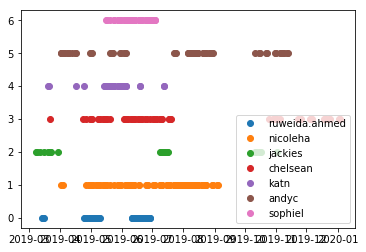

In [366]:
for it, trainer in enumerate(t.unique()):
    plt.plot(hrd[hrd['trainer']==trainer]['session_datetime_local'], it*np.ones(np.sum(hrd['trainer']==trainer)),'o')

plt.legend(t.unique())

In [391]:
hr = popdf['stage'].str.contains('handoff_ready')
hrd = popdf.loc[hr]
hrd.groupby(['rig','stage']).count()

id  behavior_training_id  created_at  \
rig stage                                                                     
2P5 TRAINING_4_images_A_handoff_ready   3                     0           3   
B1  TRAINING_4_images_A_handoff_ready   9                     0           9   
    TRAINING_5_images_A_handoff_ready  33                     0          33   
    TRAINING_5_images_B_handoff_ready   1                     0           1   
B2  TRAINING_5_images_A_handoff_ready  19                     0          19   
    TRAINING_5_images_B_handoff_ready   1                     0           1   
B3  TRAINING_5_images_A_handoff_ready  15                     0          15   
    TRAINING_5_images_B_handoff_ready   3                     0           3   
B4  TRAINING_5_images_A_handoff_ready  24                     0          24   
B5  TRAINING_5_images_A_handoff_ready  23                     0          23   
B6  TRAINING_5_images_A_handoff_ready   3                     0           3   
D1  TRAINING_4_images_A_handoff_ready   6                     0           6   
    TRAINING_5_images_A_handoff_ready  30                     0          30   
    TRAINING_5_images_G_handoff_ready  16                     0          16   
D2  TRAINING_4_images_A_handoff_ready   8                     0           8   
    TRAINING_5_images_A_handoff_ready  19                     0          19   
    TRAINING_5_images_B_handoff_ready   3                     0           3   
D3  TRAINING_4_images_A_handoff_ready   9                     0           9   
D4  TRAINING_5_images_A_handoff_ready   8                     0           8   
    TRAINING_5_images_G_handoff_ready   5                     0           5   
D5  TRAINING_5_images_A_handoff_ready  36                     0          36   
D6  TRAINING_5_images_A_handoff_ready  13                     0          13   
    TRAINING_5_images_B_handoff_ready   1                     0           1   
F1  TRAINING_5_images_A_handoff_ready  10                     0          10   
    TRAINING_5_images_B_handoff_ready  14                     0          14   
    TRAINING_5_images_G_handoff_ready  11                     0          11   
F2  TRAINING_5_images_A_handoff_ready   9                     0           9   
    TRAINING_5_images_B_handoff_ready  11                     0          11   
F3  TRAINING_4_images_A_handoff_ready   1                     0           1   
    TRAINING_5_images_A_handoff_ready   5                     0           5   
F4  TRAINING_5_images_A_handoff_ready  27                     0          27   
    TRAINING_5_images_B_handoff_ready  10                     0          10   
    TRAINING_5_images_G_handoff_ready   2                     0           2   
F5  TRAINING_5_images_A_handoff_ready   7                     0           7   
    TRAINING_5_images_G_handoff_ready  14                     0          14   
F6  TRAINING_5_images_A_handoff_ready  35                     0          35   
    TRAINING_5_images_B_handoff_ready   2                     0           2   
    TRAINING_5_images_G_handoff_ready   8                     0           8   
G1  TRAINING_4_images_A_handoff_ready   5                     0           5   
    TRAINING_5_images_A_handoff_ready  29                     0          29   
G2  TRAINING_4_images_A_handoff_ready   5                     0           5   
    TRAINING_5_images_A_handoff_ready  13                     0          13   
    TRAINING_5_images_B_handoff_ready   8                     0           8   
G3  TRAINING_4_images_A_handoff_ready   2                     0           2   
    TRAINING_5_images_A_handoff_ready   8                     0           8   
    TRAINING_5_images_B_handoff_ready   5                     0           5   
G4  TRAINING_4_images_A_handoff_ready   5                     0           5   
    TRAINING_5_images_A_handoff_ready  20                     0          20   
G5  TRAINING_5_images_A_handoff_ready   4                     0           4   
    TRAINI

stage
TRAINING_4_images_A_handoff_ready     53
TRAINING_5_images_A_handoff_ready    414
TRAINING_5_images_B_handoff_ready     65
TRAINING_5_images_G_handoff_ready     56
Name: earned_rewards, dtype: int64


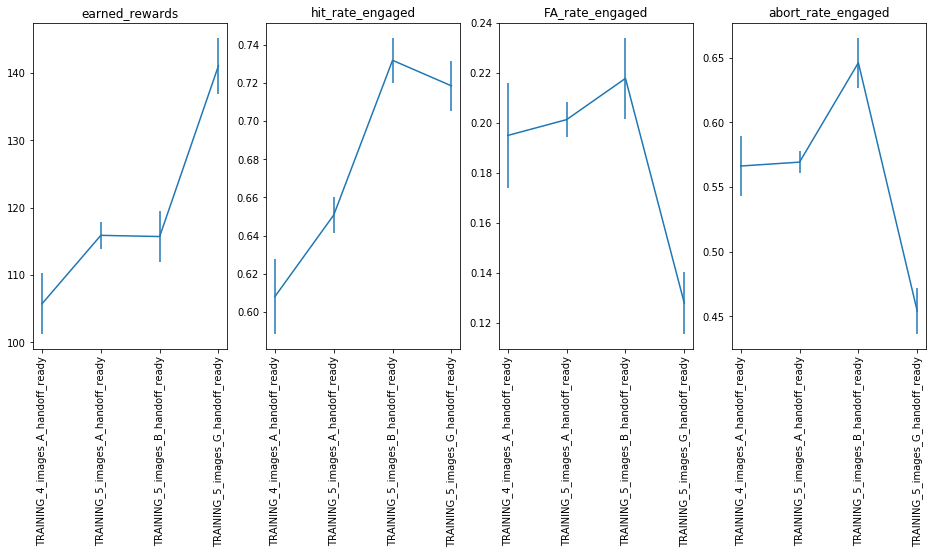

In [192]:
hr = popdf['stage'].str.contains('handoff_ready')
hrd = popdf.loc[hr]

fig, ax = plt.subplots(1,4)
fig.set_size_inches([16,6])

for i, metric in enumerate(['earned_rewards', 'hit_rate_engaged', 'FA_rate_engaged', 'abort_rate_engaged']):
    ax[i].errorbar(np.arange(4), hrd.groupby(['stage']).mean()[metric], hrd.groupby(['stage']).sem()[metric])
    ax[i].set_title(metric)
    ax[i].set_xticks(np.arange(4))
    ax[i].set_xticklabels(popdf['stage'].loc[popdf['stage'].str.contains('handoff_ready')].unique())

    plt.setp(ax[i].get_xticklabels(), rotation=90)
    

print(hrd.groupby(['stage']).count()['earned_rewards'])


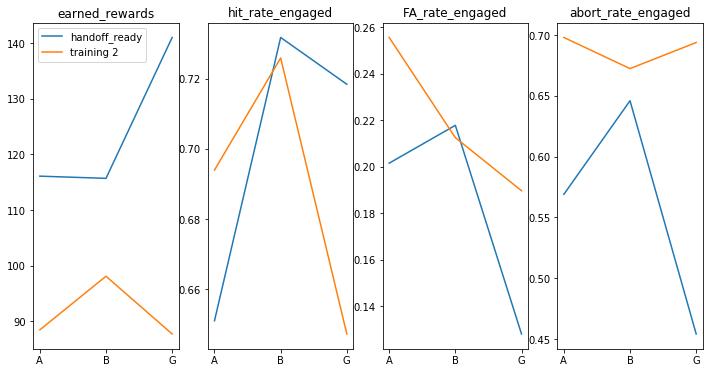

In [60]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches([12, 6])
for im, metric in enumerate(['earned_rewards', 'hit_rate_engaged', 'FA_rate_engaged', 'abort_rate_engaged']):
    t2vals = []
    hrvals = []
    for image_set in ['A', 'B', 'G']:
        mice = popdf['stage'].str.contains('TRAINING_5_images_'+image_set+'_handoff_ready').any(level=0)
        df = popdf[mice[popdf.index.get_level_values(0)].values]
        hrvals.append(df[df['stage'].str.contains('handoff_ready')].mean()[metric])
        t2vals.append(df[df['stage'].str.contains('TRAINING_2')].mean()[metric])
    
    ax[im].plot(hrvals)
    ax[im].plot(t2vals)
    ax[im].set_title(metric)
    ax[im].set_xticklabels(['', 'A', 'B', 'G'])
    
ax[0].legend(['handoff_ready', 'training 2'])


# for i, image_set in enumerate(['A', 'B', 'G']):
#     mice = popdf['stage'].str.contains('TRAINING_5_images_'+image_set+'_handoff_ready').any(level=0)
#     df = popdf[mice[popdf.index.get_level_values(0)].values]
    
#     hr = df['stage'].str.contains('handoff_ready')
#     df_hr = df.loc[hr]
    
#     t2 = df['stage'].str.contains('TRAINING_2')
#     df_t2 = df.loc[t2]
    
#     for i, metric in enumerate(['earned_rewards', 'hit_rate_engaged', 'FA_rate_engaged', 'abort_rate_engaged']):
#         ax[i].errorbar(df_hr.mean()[metric], df_hr.sem()[metric])
#         ax[i].set_title(metric)
#         plt.setp(ax[i].get_xticklabels(), rotation=90)
    


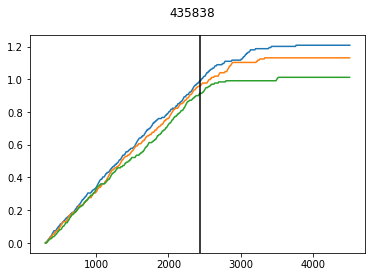

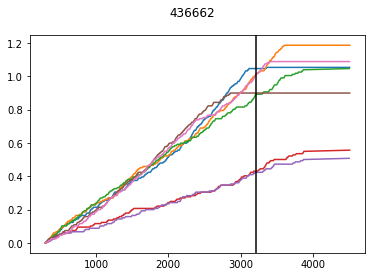

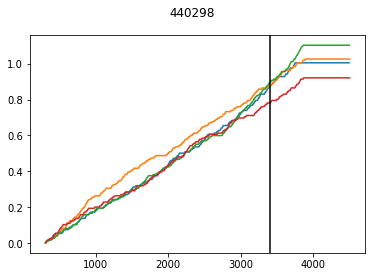

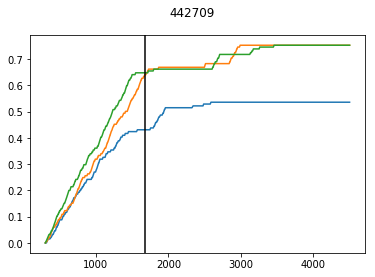

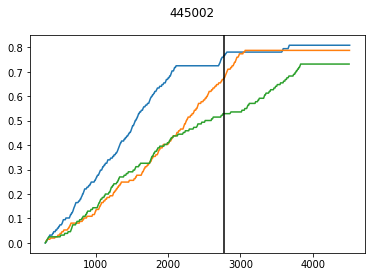

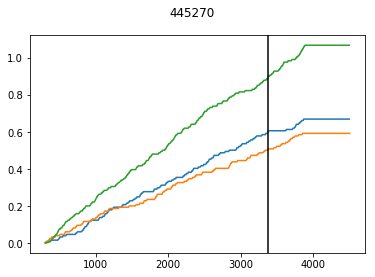

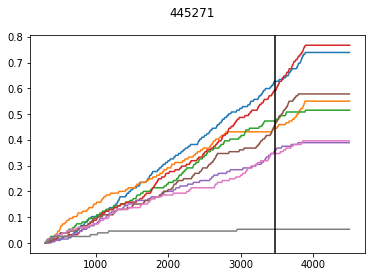

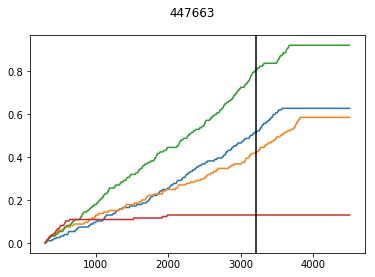

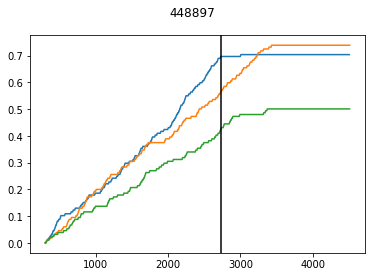

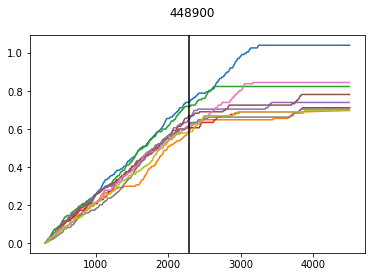

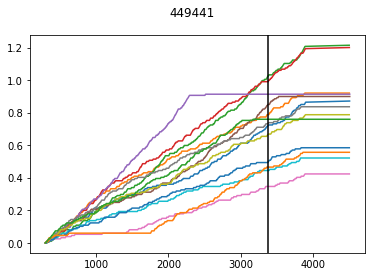

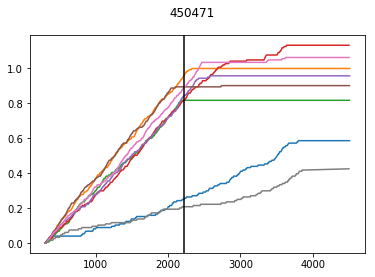

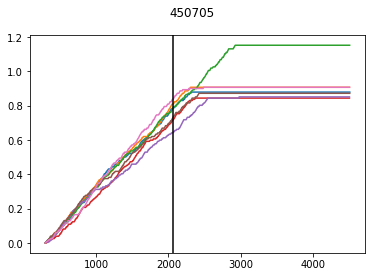

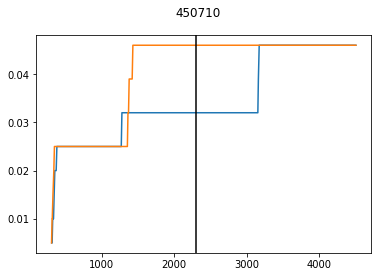

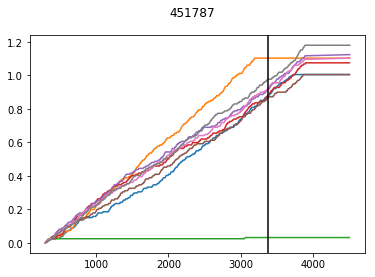

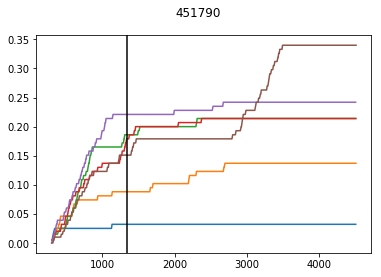

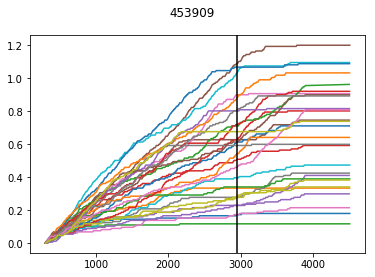

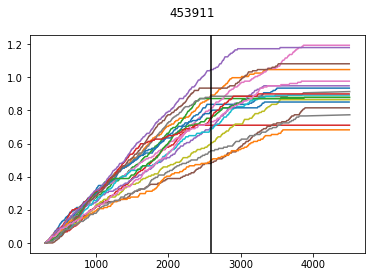

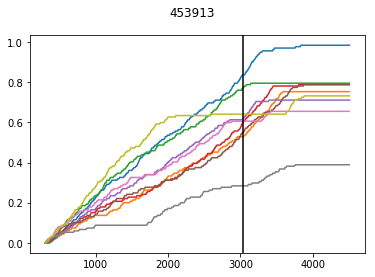

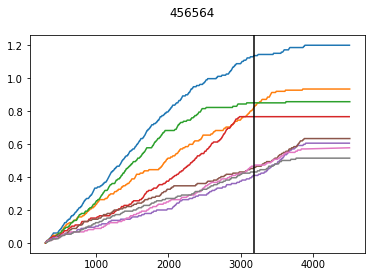

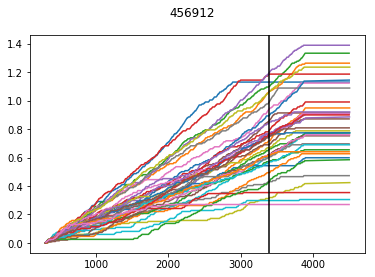

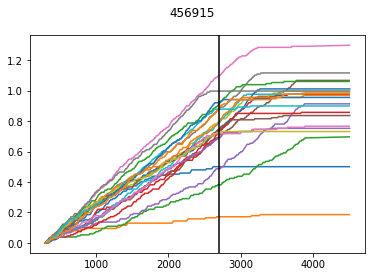

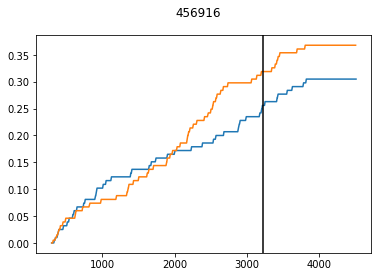

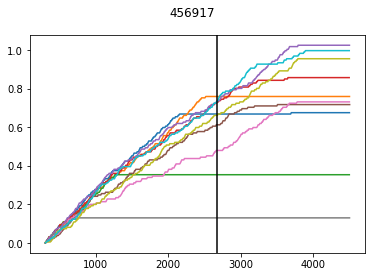

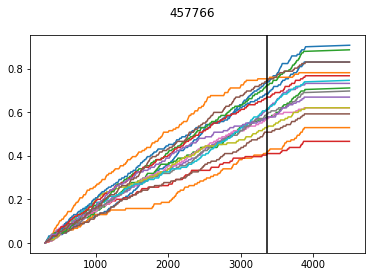

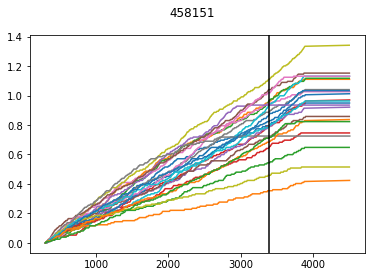

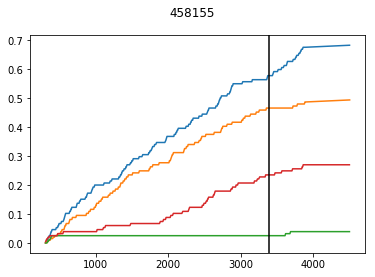

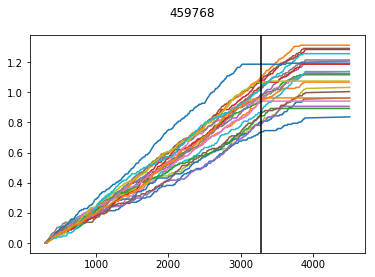

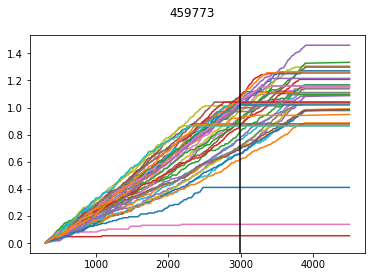

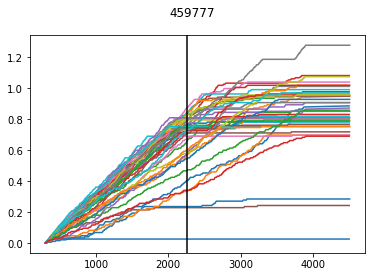

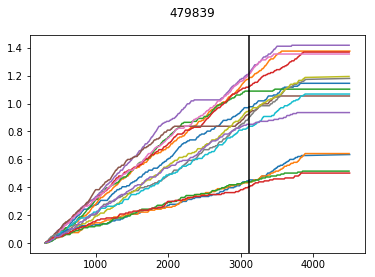

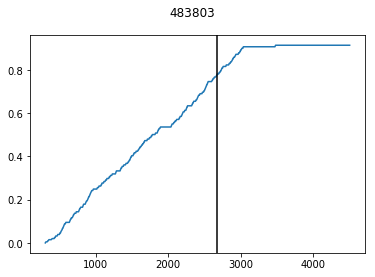

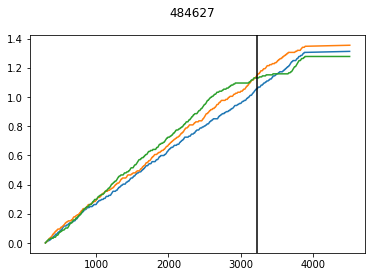

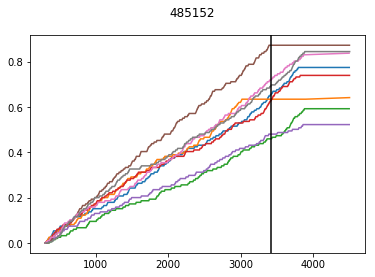

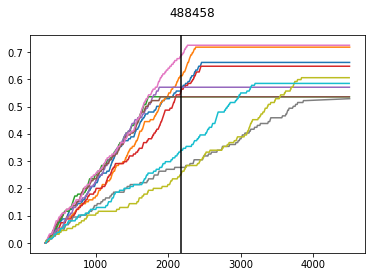

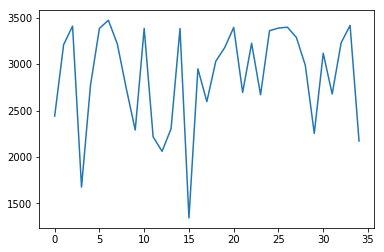

In [187]:
def findSaturationTime(trialdf):
    saturationTrial = np.where(trialdf['cumulative_volume'] > 0.85*trialdf['cumulative_volume'].max())[0][0]
    return np.array(trialdf['endtime'])[saturationTrial]


hr = popdf['stage'].str.contains('TRAINING_5_images_A_handoff_ready')
hrd = popdf.loc[hr]

mean_saturation_time = []
for mid, md in hrd.groupby(level=0):
    fig, ax = plt.subplots()
    fig.suptitle(mid)
    saturationPoints = np.array(md.apply(lambda row: findSaturationTime(row['trials']), axis=1))

    for it, r in md.iterrows():
        ax.plot(r['trials']['endtime'], r['trials']['cumulative_volume'])
    
    mean_saturation_time.append(np.median(saturationPoints))
    ax.axvline(x=np.median(saturationPoints), c='k')

plt.figure()
plt.plot(mean_saturation_time)

    

Text(0,0.5,u'number of mice')

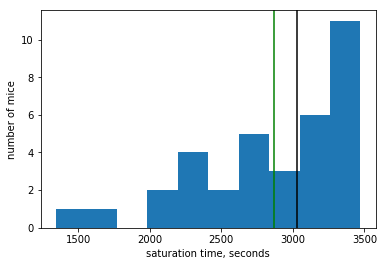

In [193]:
fig, ax = plt.subplots()
ax.hist(mean_saturation_time)
ax.axvline(np.median(mean_saturation_time), c='k')
ax.axvline(np.mean(mean_saturation_time), c='g')
ax.set_xlabel('saturation time, seconds')
ax.set_ylabel('number of mice')

Text(0,0.5,u'rewards')

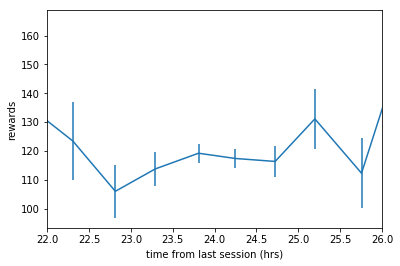

In [204]:
rewards = np.array(hrd['earned_rewards'])
time_from_last = np.array(hrd['timeFromLastSession'])

time_from_last_binned = np.digitize(time_from_last, np.arange(15, 30, 0.5))
rewards_binned = [np.mean(rewards[time_from_last_binned==tb]) for tb in np.unique(time_from_last_binned)]
rewards_binned_sem = [np.std(rewards[time_from_last_binned==tb])/(np.sum(time_from_last_binned==tb))**0.5 for tb in np.unique(time_from_last_binned)]
time_binned = [np.mean(time_from_last[time_from_last_binned==tb]) for tb in np.unique(time_from_last_binned)]
fig, ax = plt.subplots()
ax.errorbar(time_binned, rewards_binned, yerr=rewards_binned_sem)
ax.set_xlim([22, 26])
ax.set_xlabel('time from last session (hrs)')
ax.set_ylabel('rewards')

(20, 30)

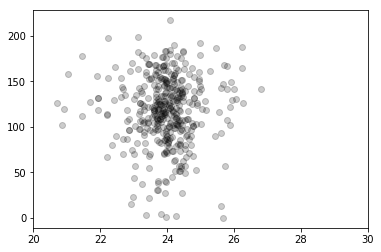

In [201]:
earlybins = np.arange(15, 30, 0.5)
latebins = np.arange(30, 80, 5)
bins = np.hstack([earlybins, latebins])

fig, ax = plt.subplots()
ax.plot(time_from_last, rewards, 'ko', alpha=0.2)
ax.set_xlim([20, 30])

In [205]:
popdf.columns

Index([u'id', u'behavior_training_id', u'created_at', u'updated_at',
       u'storage_directory', u'temp_output_file_location', u'foraging_id',
       u'donor_id', u'ophys_session_id', u'equipment_id', u'user_id', u'rig',
       u'pklfile', u'trials', u'stage', u'running', u'session_datetime',
       u'session_datetime_local', u'session_datetime_utc',
       u'timeFromLastSession', u'engaged_dprime', u'session_day_of_week',
       u'WE_ml', u'WS_ml', u'weight_datetime', u'Wt_g', u'hit_rate_engaged',
       u'FA_rate_engaged', u'abort_rate_engaged', u'earned_rewards',
       u'total_rewards', u'Maternal_Index', u'Paternal_Index', u'age',
       u'baseline_weight'],
      dtype='object')

In [70]:
momids = []
popids = []
mpids = []
for mid, md in popdf.groupby(level=0):
    momids.append(md.iloc[0]['Maternal_Index'])
    popids.append(md.iloc[0]['Paternal_Index'])
    mpids.append(int(str(momids[-1]) + str(popids[-1])))
    
momids = np.array(momids)
popids = np.array(popids)
mpids = np.array(mpids)

mcounts = [np.sum(momids==m) for m in np.unique(momids)]
pcounts = [np.sum(popids==p) for p in np.unique(popids)]
mpcounts = [np.sum(mpids==mp) for mp in np.unique(mpids)]

print(mcounts)
print(pcounts)
print(mpcounts)

int(str(momids[0]) + str(popids[0]))

[2, 2, 3, 5, 2, 1, 8, 1, 2, 4, 1, 3, 1, 2, 7, 1, 6, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1]
[5, 2, 2, 3, 3, 10, 1, 5, 4, 7, 2, 6, 1, 1, 2, 1, 1, 3, 1, 1, 1, 3, 1, 1]
[2, 2, 3, 5, 2, 1, 8, 1, 2, 4, 1, 3, 1, 2, 7, 1, 6, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1]


410306397393L

In [66]:
np.sum(pcounts)

67